In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

from scipy.stats import wasserstein_distance

plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [13]:
model_name = 'nominal'
#modelDir = '/net/scratch_cms3a/hschoenen/deepjet/results/{}'.format(model_name)
modelDir = '/net/data_cms/institut_3a/hschoenen/models/{}'.format(model_name)
#saveDir = '/net/scratch_cms3a/hschoenen/deepjet/plots'
saveDir = '/home/home1/institut_3a/hschoenen/plots'

def get_array(quantity,attack='nominal'):
    array = np.load('{}/variables/{}/{}.npy'.format(modelDir,attack,quantity))
    return array

# epsilons for adversarial attacks
global_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/global_standardized_epsilons.npy')
cpf_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/cpf_standardized_epsilons.npy')
npf_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/npf_standardized_epsilons.npy')
vtx_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/vtx_standardized_epsilons.npy')
input_deltas = {
    'glob': global_deltas,
    'cpf': cpf_deltas,
    'npf': npf_deltas,
    'vtx': vtx_deltas,
}

# get truth flavor information
isB = get_array('isB')
isBB = get_array('isBB')
isLeptonicB = get_array('isLeptonicB')
isC = get_array('isC')
isUDS = get_array('isUDS')
isG = get_array('isG')
# print number of jets in each category
flavours = [isB,isBB,isLeptonicB,isC,isUDS,isG]
flavour_names = ['isB','isBB','isLeptonicB','isC','isUDS','isG']
sum = 0
for i in range(len(flavours)):
    print('{}: {:n}'.format(flavour_names[i], np.sum(flavours[i])))
    sum += np.sum(flavours[i])
print('total: {:n}'.format(sum))
# summarize jet flavors
B = isB + isBB + isLeptonicB
C = isC
L = isUDS + isG

isB: 28340
isBB: 211
isLeptonicB: 4418
isC: 19899
isUDS: 47762
isG: 28369
total: 128999


In [14]:
# calculate Kullack-Leibler divergence
def kldiv(A, B):
        return np.sum([v for v in A * np.log(A/B) if not np.isnan(v)])

# calculate Jensen-Shannon divergence
def jsdiv(P, Q, normalize_first=False):
    P = np.array(P)
    Q = np.array(Q)
    if normalize_first:
        P = P/P.sum()
        Q = Q/Q.sum()
    M = 0.5 * (P + Q)
    return 0.5 * (kldiv(P, M) +kldiv(Q, M))

attack_labels = {
    'nominal': 'nominal',
    'fgsm-0_01': r'fgsm $\epsilon=0.01$',
    'fgsm-0_05': r'fgsm $\epsilon=0.05$',
    'fgsm-0_1': r'fgsm $\epsilon=0.1$',
    'gaussian-0_1': r'gaussian $\epsilon=0.1$',
    'gaussian-5': r'gaussian $\epsilon=5$',
}
attack_colors = {
    'nominal': 'tab:blue',
    'fgsm-0_01': 'tab:orange',
    'fgsm-0_05': 'tab:orange',
    'fgsm-0_1': 'tab:orange',
    'gaussian-0_1': 'tab:green',
    'gaussian-5': 'tab:green',
}
    
quantity_labels = {
    # global
    'jet_pt': '$p_{T}[GeV]$', 
    'jet_eta': '$\eta$',
    'nCpfcand': '$N_{CPF}$',
    'nNpfcand': '$N_{NPF}$',
    'nsv': '$N_{SV}$',
    'npv': '$N_{PV}$',
    'TagVarCSV_trackSumJetEtRatio': 'TagVarCSV_trackSumJetEtRatio',
    'TagVarCSV_trackSumJetDeltaR': 'TagVarCSV_trackSumJetDeltaR',
    'TagVarCSV_vertexCategory': 'TagVarCSV_vertexCategory',
    'TagVarCSV_trackSip2dValAboveCharm': 'TagVarCSV_trackSip2dValAboveCharm',
    'TagVarCSV_trackSip2dSigAboveCharm': 'TagVarCSV_trackSip2dSigAboveCharm',
    'TagVarCSV_trackSip3dValAboveCharm': 'TagVarCSV_trackSip3dValAboveCharm',
    'TagVarCSV_trackSip3dSigAboveCharm': 'TagVarCSV_trackSip3dSigAboveCharm',
    'TagVarCSV_jetNSelectedTracks': 'TagVarCSV_jetNSelectedTracks',
    'TagVarCSV_jetNTracksEtaRel': 'TagVarCSV_jetNTracksEtaRel',
    # cpf
    'Cpfcan_BtagPf_trackEtaRel': 'Cpfcan_BtagPf_trackEtaRel',
    'Cpfcan_BtagPf_trackPtRel': 'Cpfcan_BtagPf_trackPtRel',
    'Cpfcan_BtagPf_trackPPar': 'Cpfcan_BtagPf_trackPPar',
    'Cpfcan_BtagPf_trackDeltaR': 'Cpfcan_BtagPf_trackDeltaR',
    'Cpfcan_BtagPf_trackPParRatio': 'Cpfcan_BtagPf_trackPParRatio',
    'Cpfcan_BtagPf_trackSip2dVal': 'Cpfcan_BtagPf_trackSip2dVal',
    'Cpfcan_BtagPf_trackSip2dSig': 'Cpfcan_BtagPf_trackSip2dSig',
    'Cpfcan_BtagPf_trackSip3dVal': 'Cpfcan_BtagPf_trackSip3dVal',
    'Cpfcan_BtagPf_trackSip3dSig': 'Cpfcan_BtagPf_trackSip3dSig',
    'Cpfcan_BtagPf_trackJetDistVal': 'Cpfcan_BtagPf_trackJetDistVal',
    'Cpfcan_ptrel': 'Cpfcan_ptrel',
    'Cpfcan_drminsv': 'Cpfcan_drminsv',
    'Cpfcan_VTX_ass': 'Cpfcan_VTX_ass',
    'Cpfcan_puppiw': 'Cpfcan_puppiw',
    'Cpfcan_chi2': 'Cpfcan_chi2',
    'Cpfcan_quality': 'Cpfcan_quality',
    # npf
    'Npfcan_ptrel': 'Npfcan_ptrel', 
    'Npfcan_deltaR': 'Npfcan_deltaR',
    'Npfcan_isGamma': 'Npfcan_isGamma', 
    'Npfcan_HadFrac': 'Npfcan_HadFrac', 
    'Npfcan_drminsv': 'Npfcan_drminsv', 
    'Npfcan_puppiw': 'Npfcan_puppiw',
    # vtx
    'sv_pt': 'sv_pt',
    'sv_deltaR': 'sv_deltaR',
    'sv_mass': 'sv_mass',
    'sv_ntracks': 'sv_ntracks',
    'sv_chi2': 'sv_chi2',
    'sv_normchi2': 'sv_normchi2',
    'sv_dxy': 'sv_dxy',
    'sv_dxysig': 'sv_dxysig',
    'sv_d3d': 'sv_d3d',
    'sv_d3dsig': 'sv_d3dsig',
    'sv_costhetasvpv': 'sv_costhetasvpv',
    'sv_enratio': 'sv_enratio',
    # labels
    'isB': 0,
    'isBB': 0, 
    'isLeptonicB': 0, 
    'isC': 0, 
    'isUDS': 0, 
    'isG': 0,
    # outputs
    'prob_isB': 'P(b)',
    'prob_isBB': 'P(bb)', 
    'prob_isLeptonicB': 'P(lep b)', 
    'prob_isC': 'P(c)', 
    'prob_isUDS': 'P(uds)',
    'prob_isG': 'P(g)',
}

quantity_indices = {
    # global
    'jet_pt': ['glob',0], 
    'jet_eta': ['glob',1],
    'nCpfcand': ['glob',2],
    'nNpfcand': ['glob',3],
    'nsv': ['glob',4],
    'npv': ['glob',5],
    'TagVarCSV_trackSumJetEtRatio': ['glob',6],
    'TagVarCSV_trackSumJetDeltaR': ['glob',7],
    'TagVarCSV_vertexCategory': ['glob',8],
    'TagVarCSV_trackSip2dValAboveCharm': ['glob',9],
    'TagVarCSV_trackSip2dSigAboveCharm': ['glob',10],
    'TagVarCSV_trackSip3dValAboveCharm': ['glob',11],
    'TagVarCSV_trackSip3dSigAboveCharm': ['glob',12],
    'TagVarCSV_jetNSelectedTracks': ['glob',13],
    'TagVarCSV_jetNTracksEtaRel': ['glob',14],
    # cpf
    'Cpfcan_BtagPf_trackEtaRel': ['cpf',0,0],
    'Cpfcan_BtagPf_trackPtRel': ['cpf',0,1],
    'Cpfcan_BtagPf_trackPPar': ['cpf',0,2],
    'Cpfcan_BtagPf_trackDeltaR': ['cpf',0,3],
    'Cpfcan_BtagPf_trackPParRatio': ['cpf',0,4],
    'Cpfcan_BtagPf_trackSip2dVal': ['cpf',0,5],
    'Cpfcan_BtagPf_trackSip2dSig': ['cpf',0,6],
    'Cpfcan_BtagPf_trackSip3dVal': ['cpf',0,7],
    'Cpfcan_BtagPf_trackSip3dSig': ['cpf',0,8],
    'Cpfcan_BtagPf_trackJetDistVal': ['cpf',0,9],
    'Cpfcan_ptrel': ['cpf',0,10],
    'Cpfcan_drminsv': ['cpf',0,11],
    'Cpfcan_VTX_ass': ['cpf',0,12],
    'Cpfcan_puppiw': ['cpf',0,13],
    'Cpfcan_chi2': ['cpf',0,14],
    'Cpfcan_quality': ['cpf',0,15],
    # npf
    'Npfcan_ptrel': ['npf',0,0], 
    'Npfcan_deltaR': ['npf',0,1],
    'Npfcan_isGamma': ['npf',0,2], 
    'Npfcan_HadFrac': ['npf',0,3], 
    'Npfcan_drminsv': ['npf',0,4], 
    'Npfcan_puppiw': ['npf',0,5],
    # vtx
    'sv_pt': ['vtx',0,0],
    'sv_deltaR': ['vtx',0,1],
    'sv_mass': ['vtx',0,2],
    'sv_ntracks': ['vtx',0,3],
    'sv_chi2': ['vtx',0,4],
    'sv_normchi2': ['vtx',0,5],
    'sv_dxy': ['vtx',0,6],
    'sv_dxysig': ['vtx',0,7],
    'sv_d3d': ['vtx',0,8],
    'sv_d3dsig': ['vtx',0,9],
    'sv_costhetasvpv': ['vtx',0,10],
    'sv_enratio': ['vtx',0,11],
}

sv_pt: minimum 0.842563 , maximum 1499.22
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 33.4987
sv_deltaR: minimum -0.5 , maximum -0.100071
    -999: 0 , -1: 0 , 0:67590
    10%: -0.478512 , 90%: 0
sv_mass: minimum 0.0371314 , maximum 80.4225
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 2.12863
sv_ntracks: minimum 2 , maximum 20
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 4
sv_chi2: minimum 1.03112e-09 , maximum 39.751
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 5.24946
sv_normchi2: minimum -1000 , maximum 1000
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 1.59407
sv_dxy: minimum 7.70057e-05 , maximum 44.5366
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 1.00077
sv_dxysig: minimum 0.00255605 , maximum 800
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 29.9297
sv_d3d: minimum 0.00140246 , maximum 109.871
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 1.64885
sv_d3dsig: minimum 0.00967692 , maximum 800
    -999: 0 , -1: 0 , 0:67590
    10%: 0 , 90%: 30.0285
sv_costheta

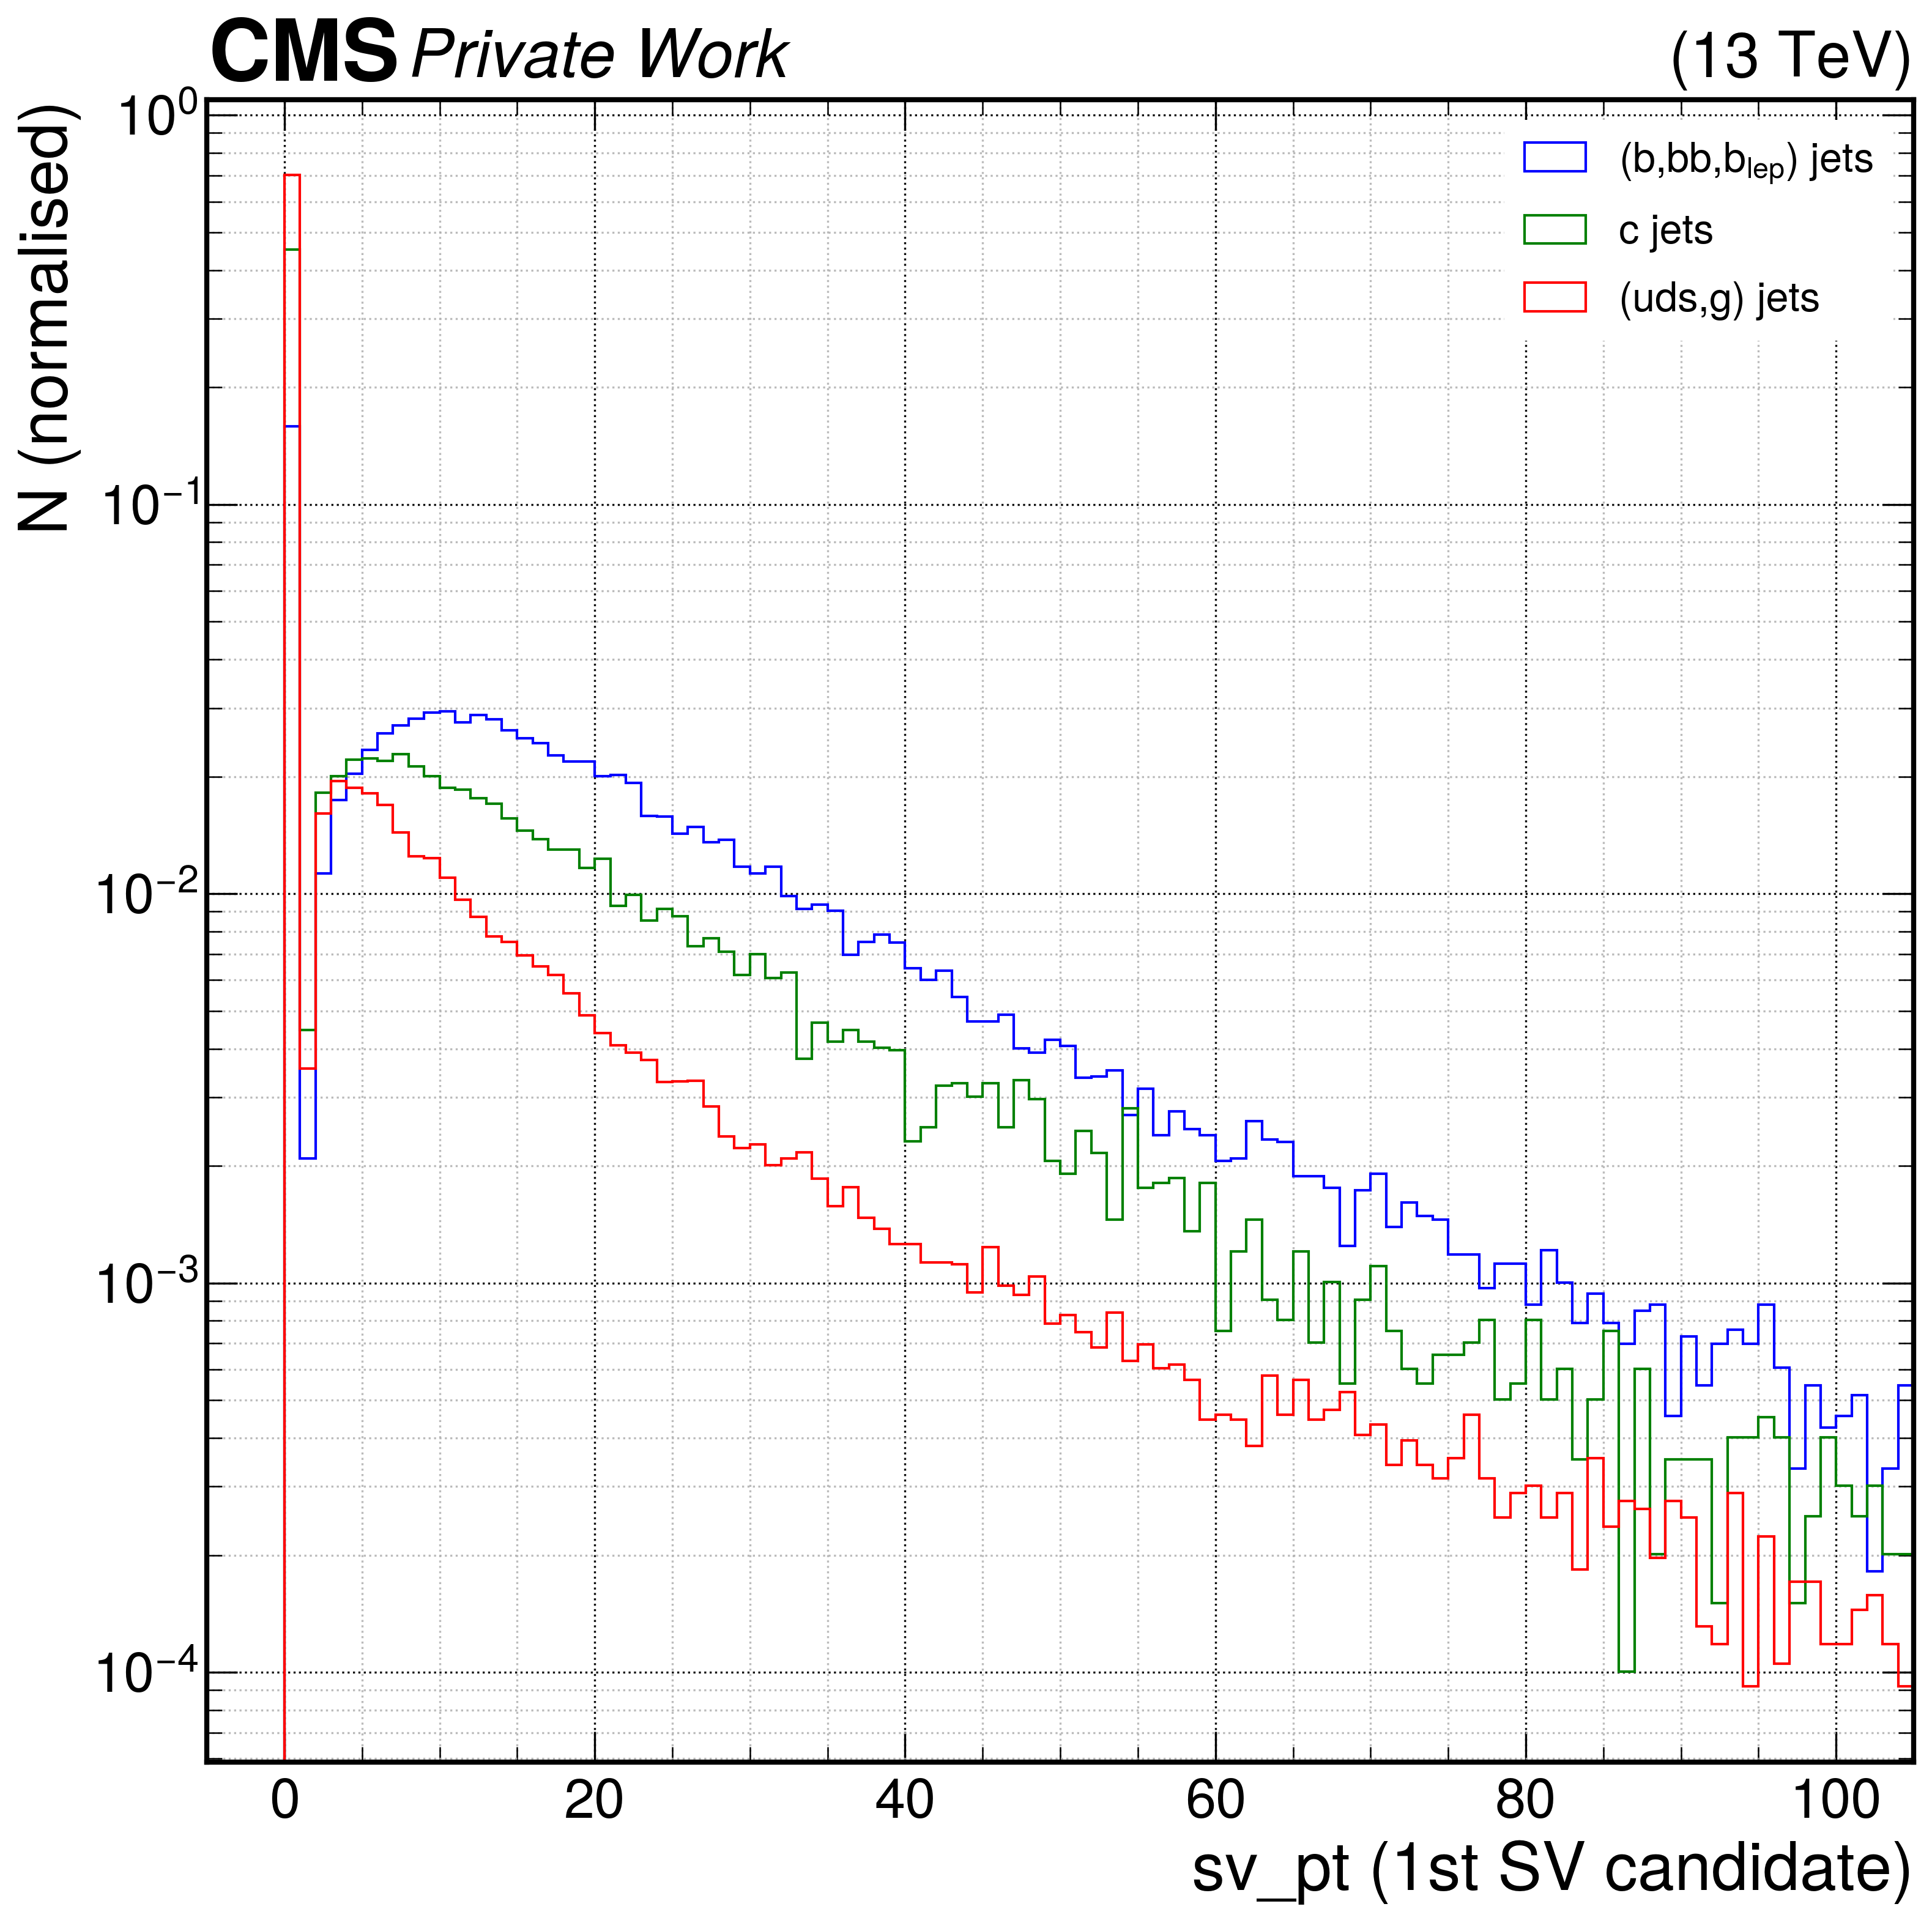

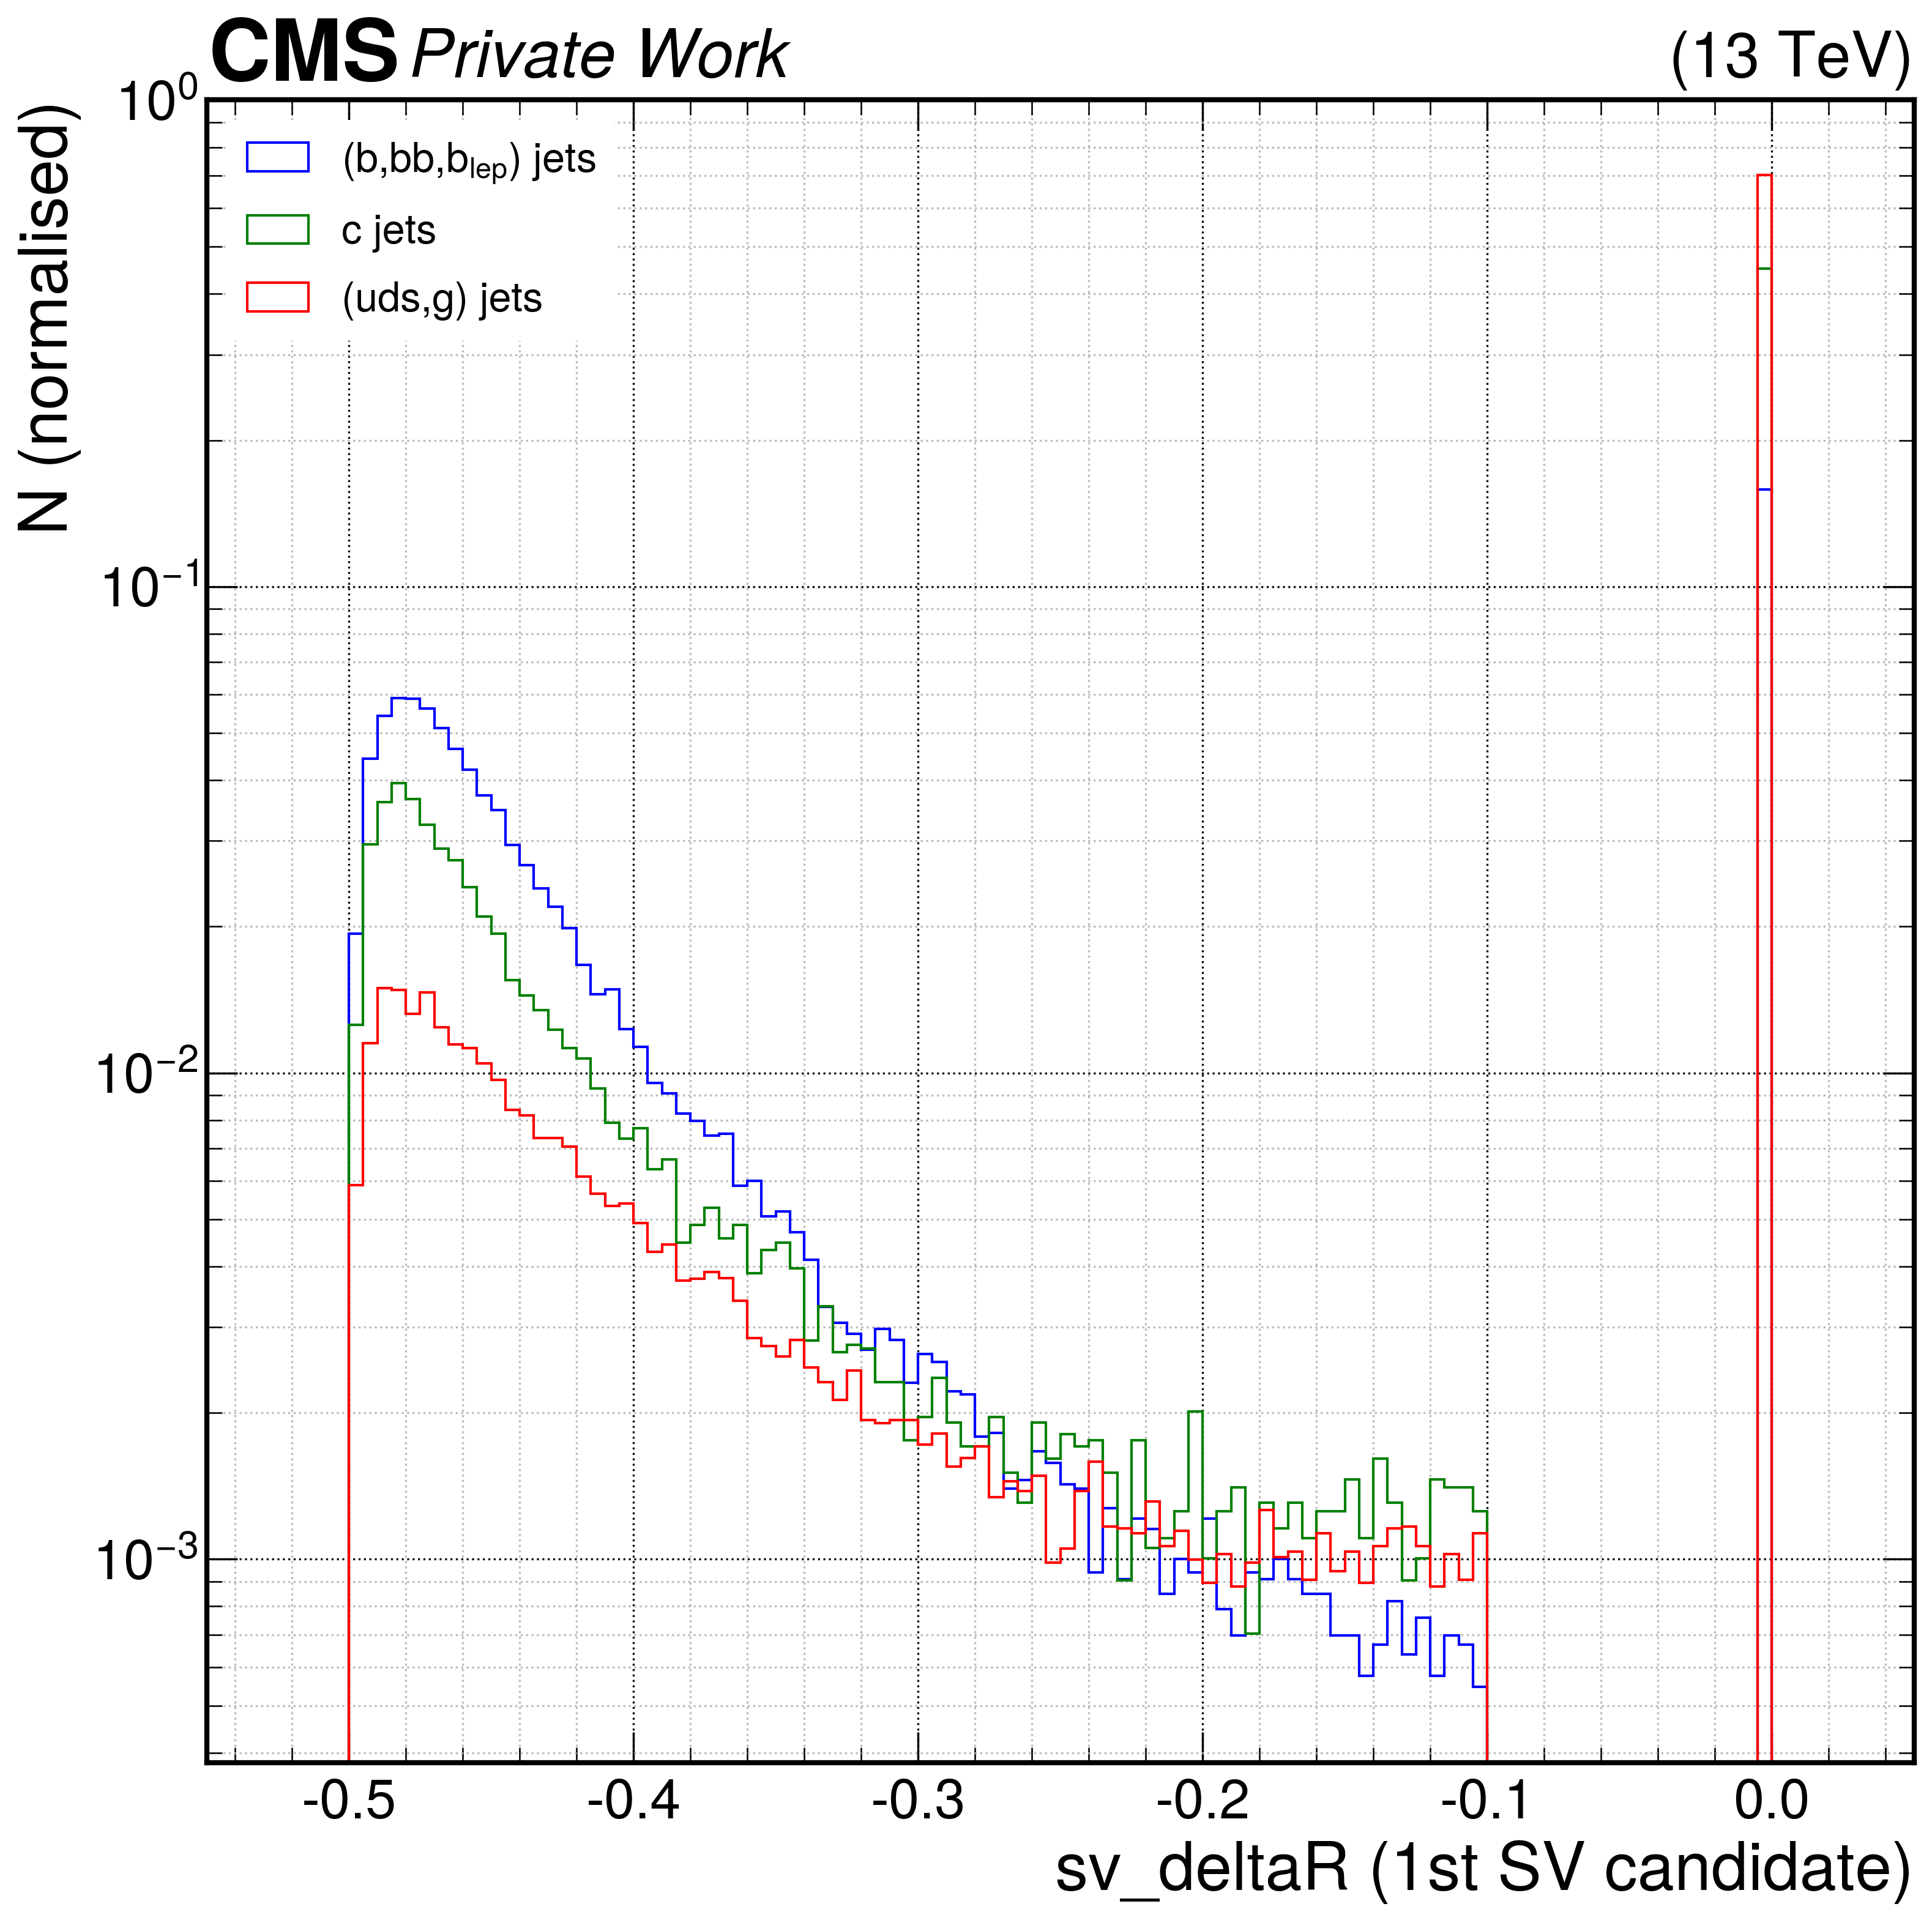

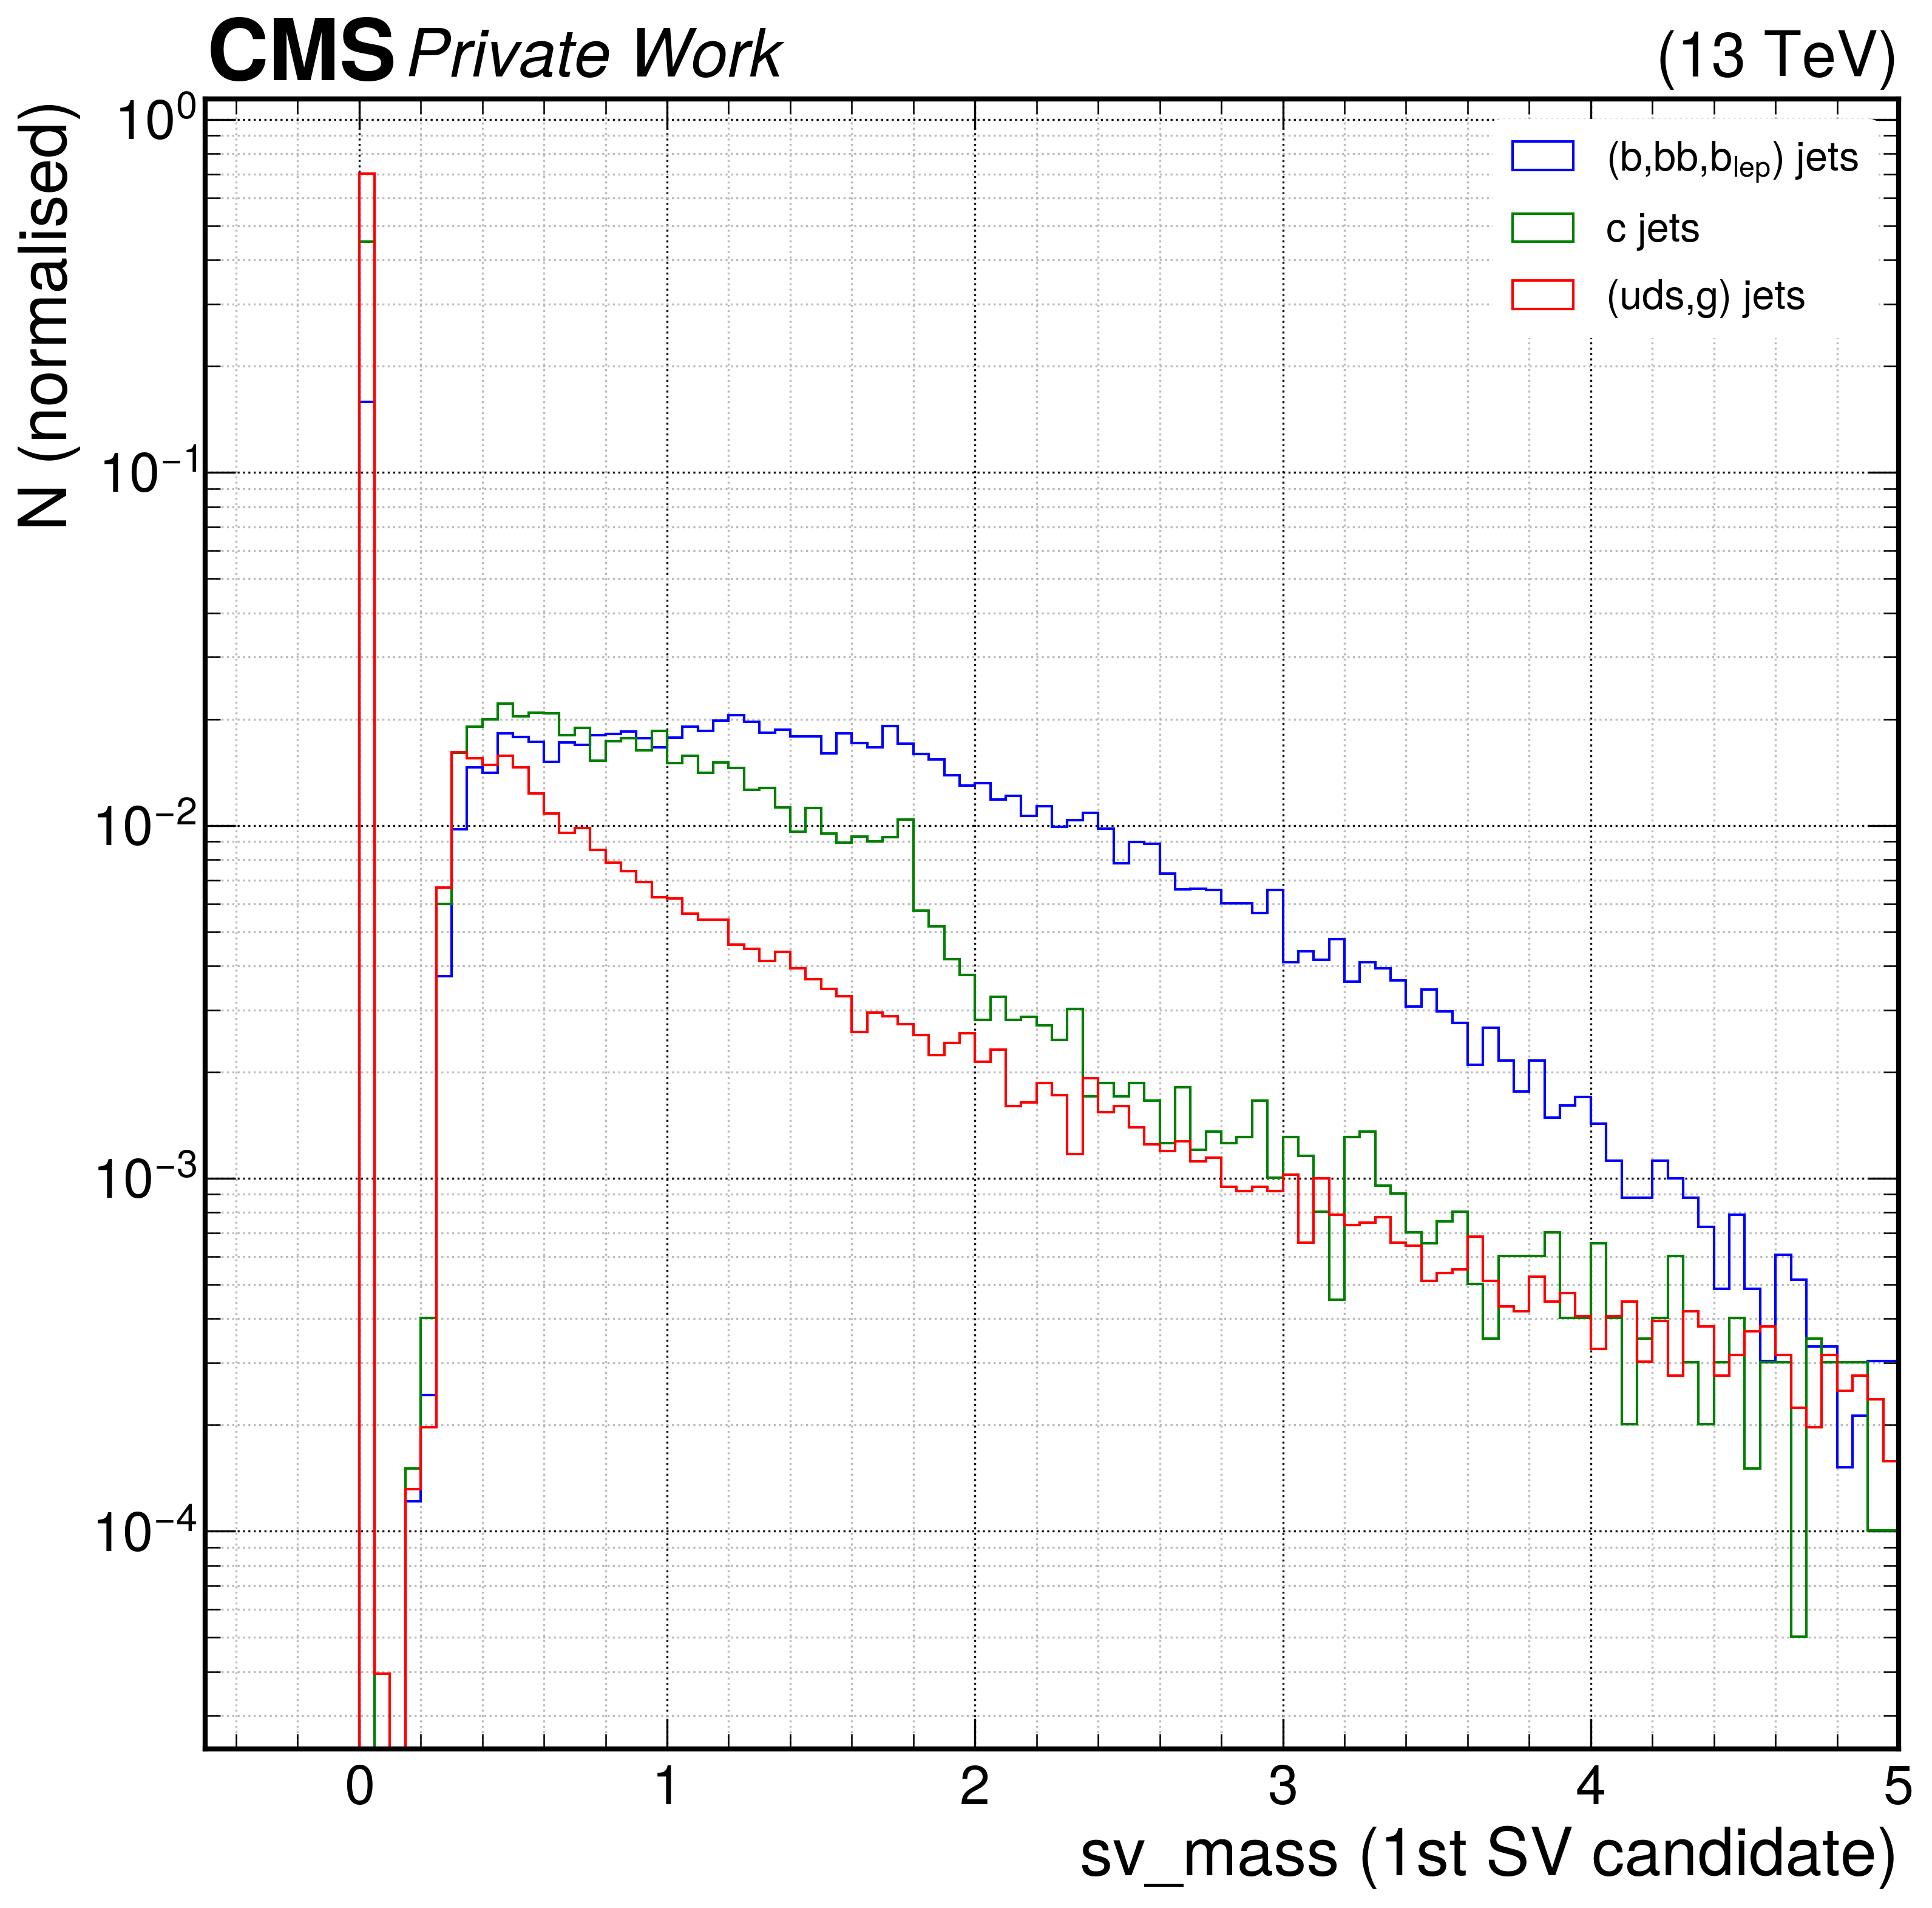

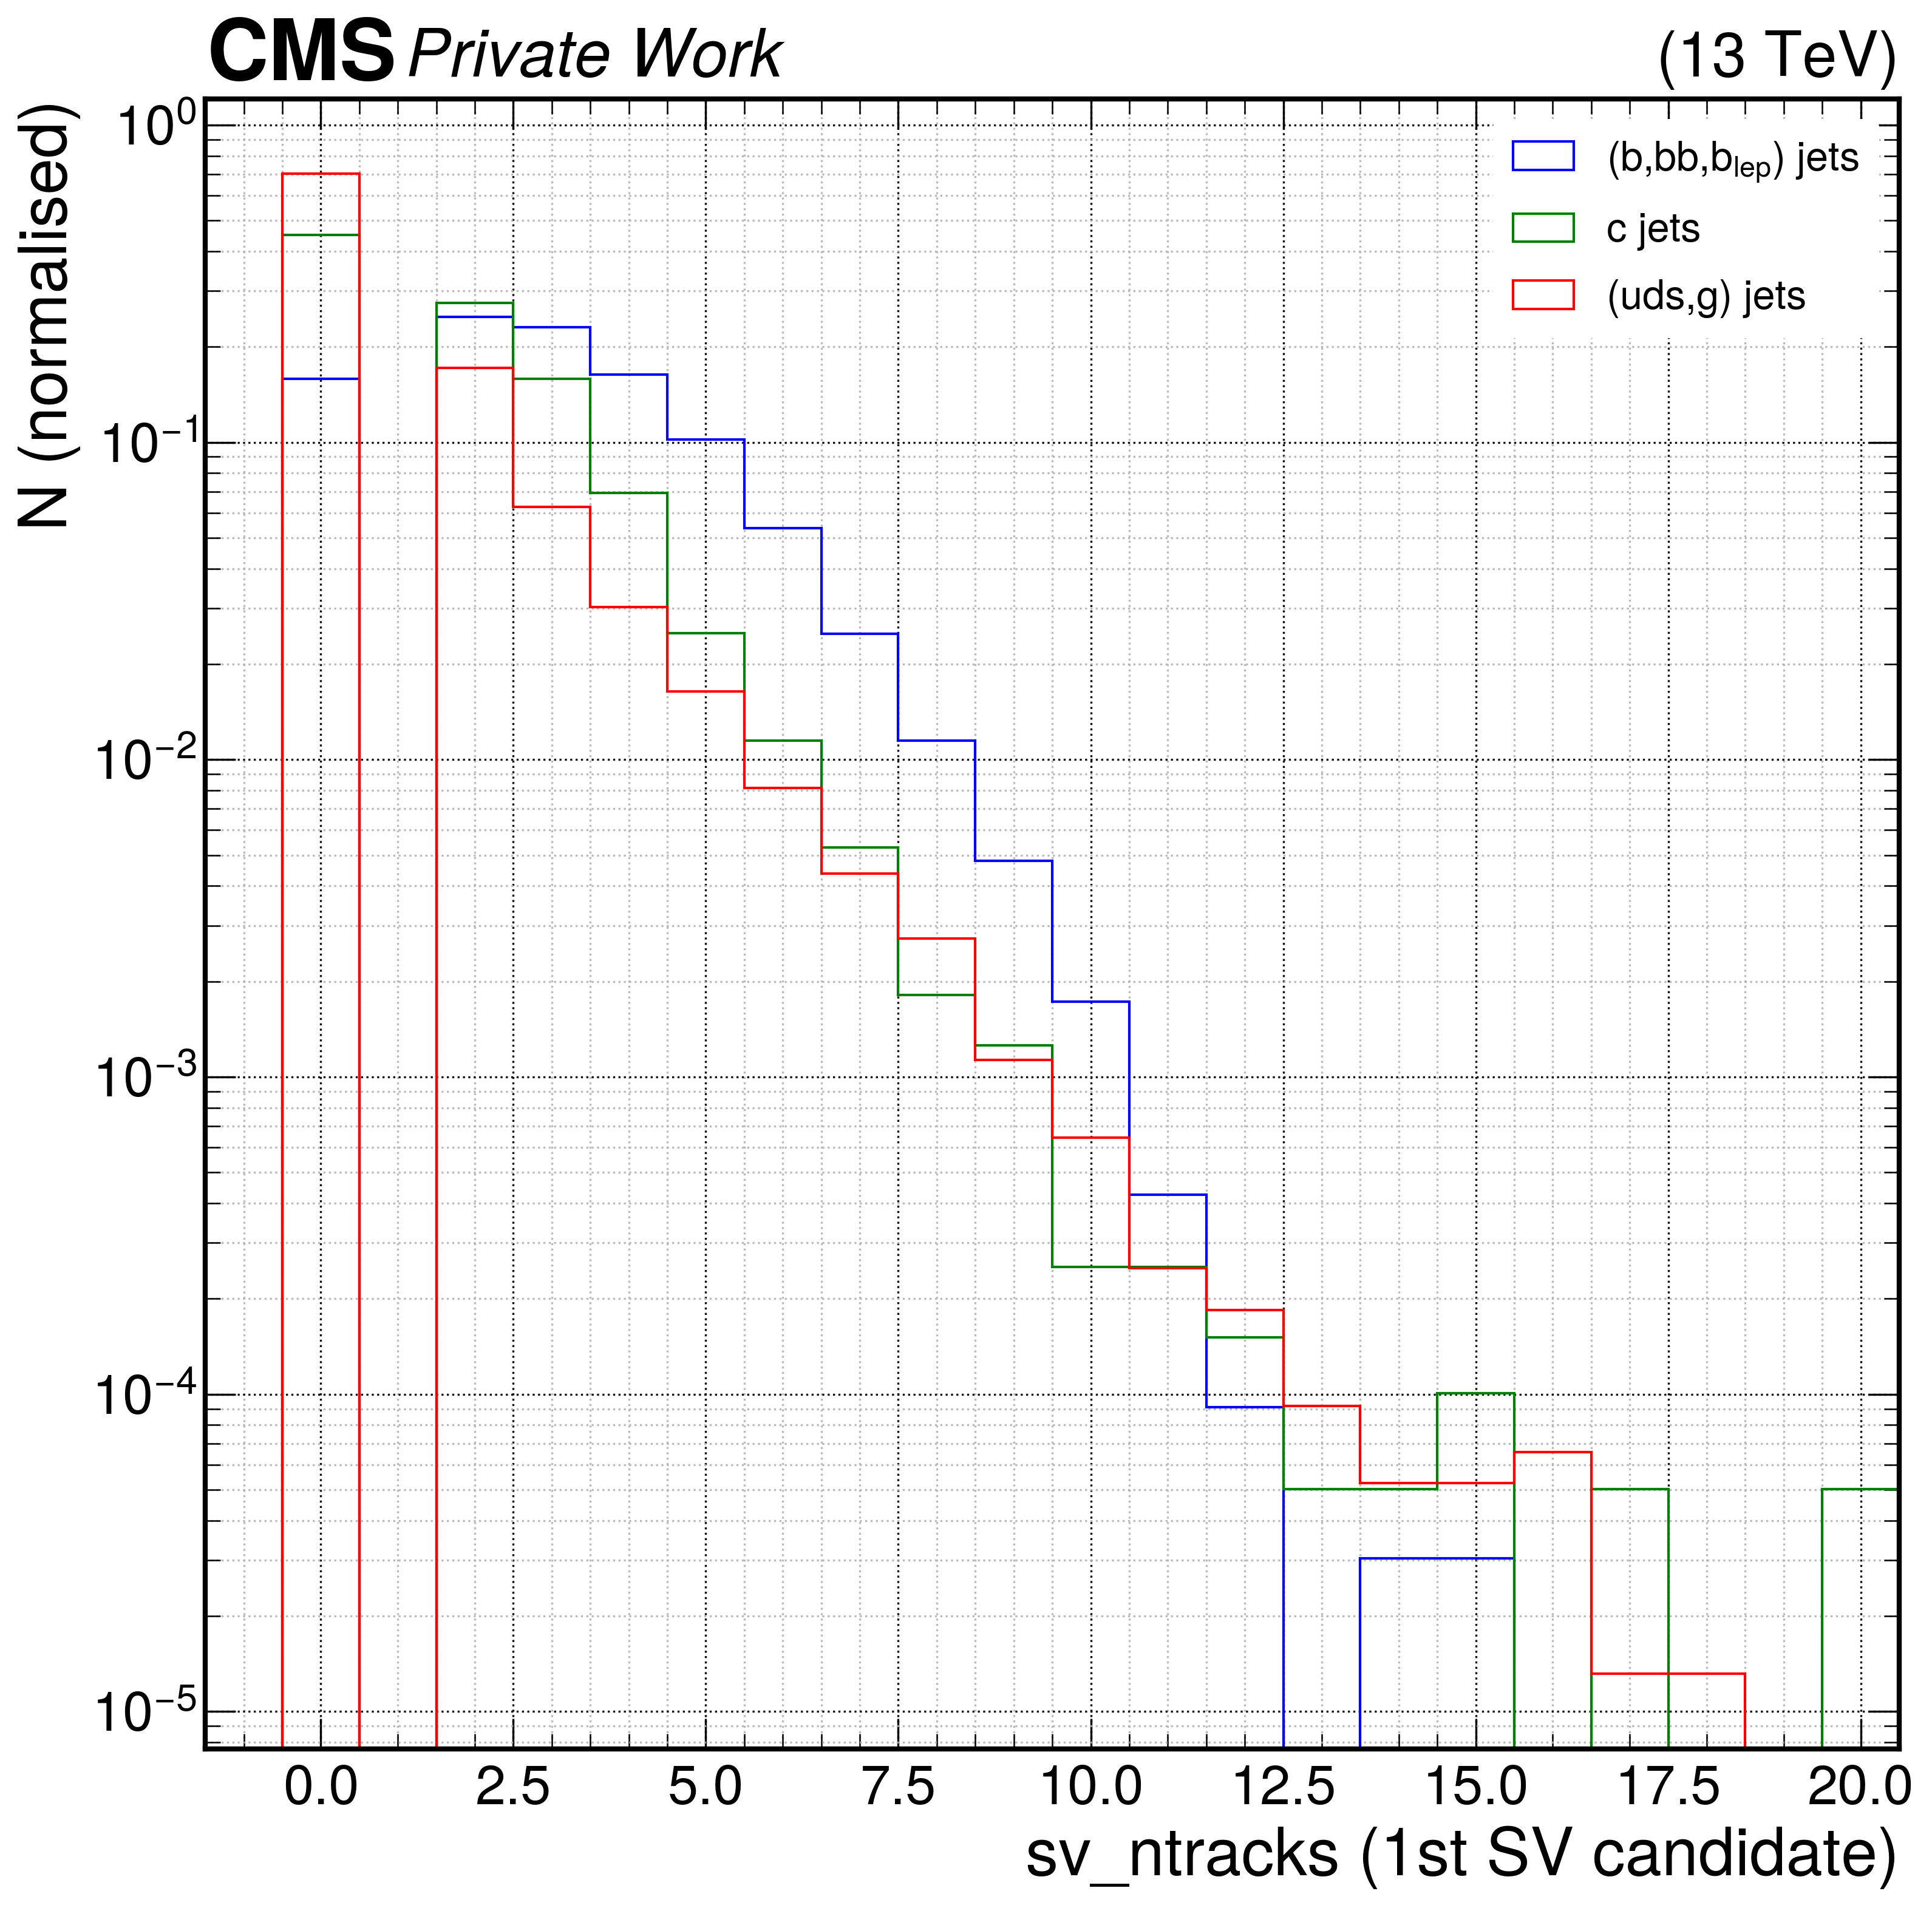

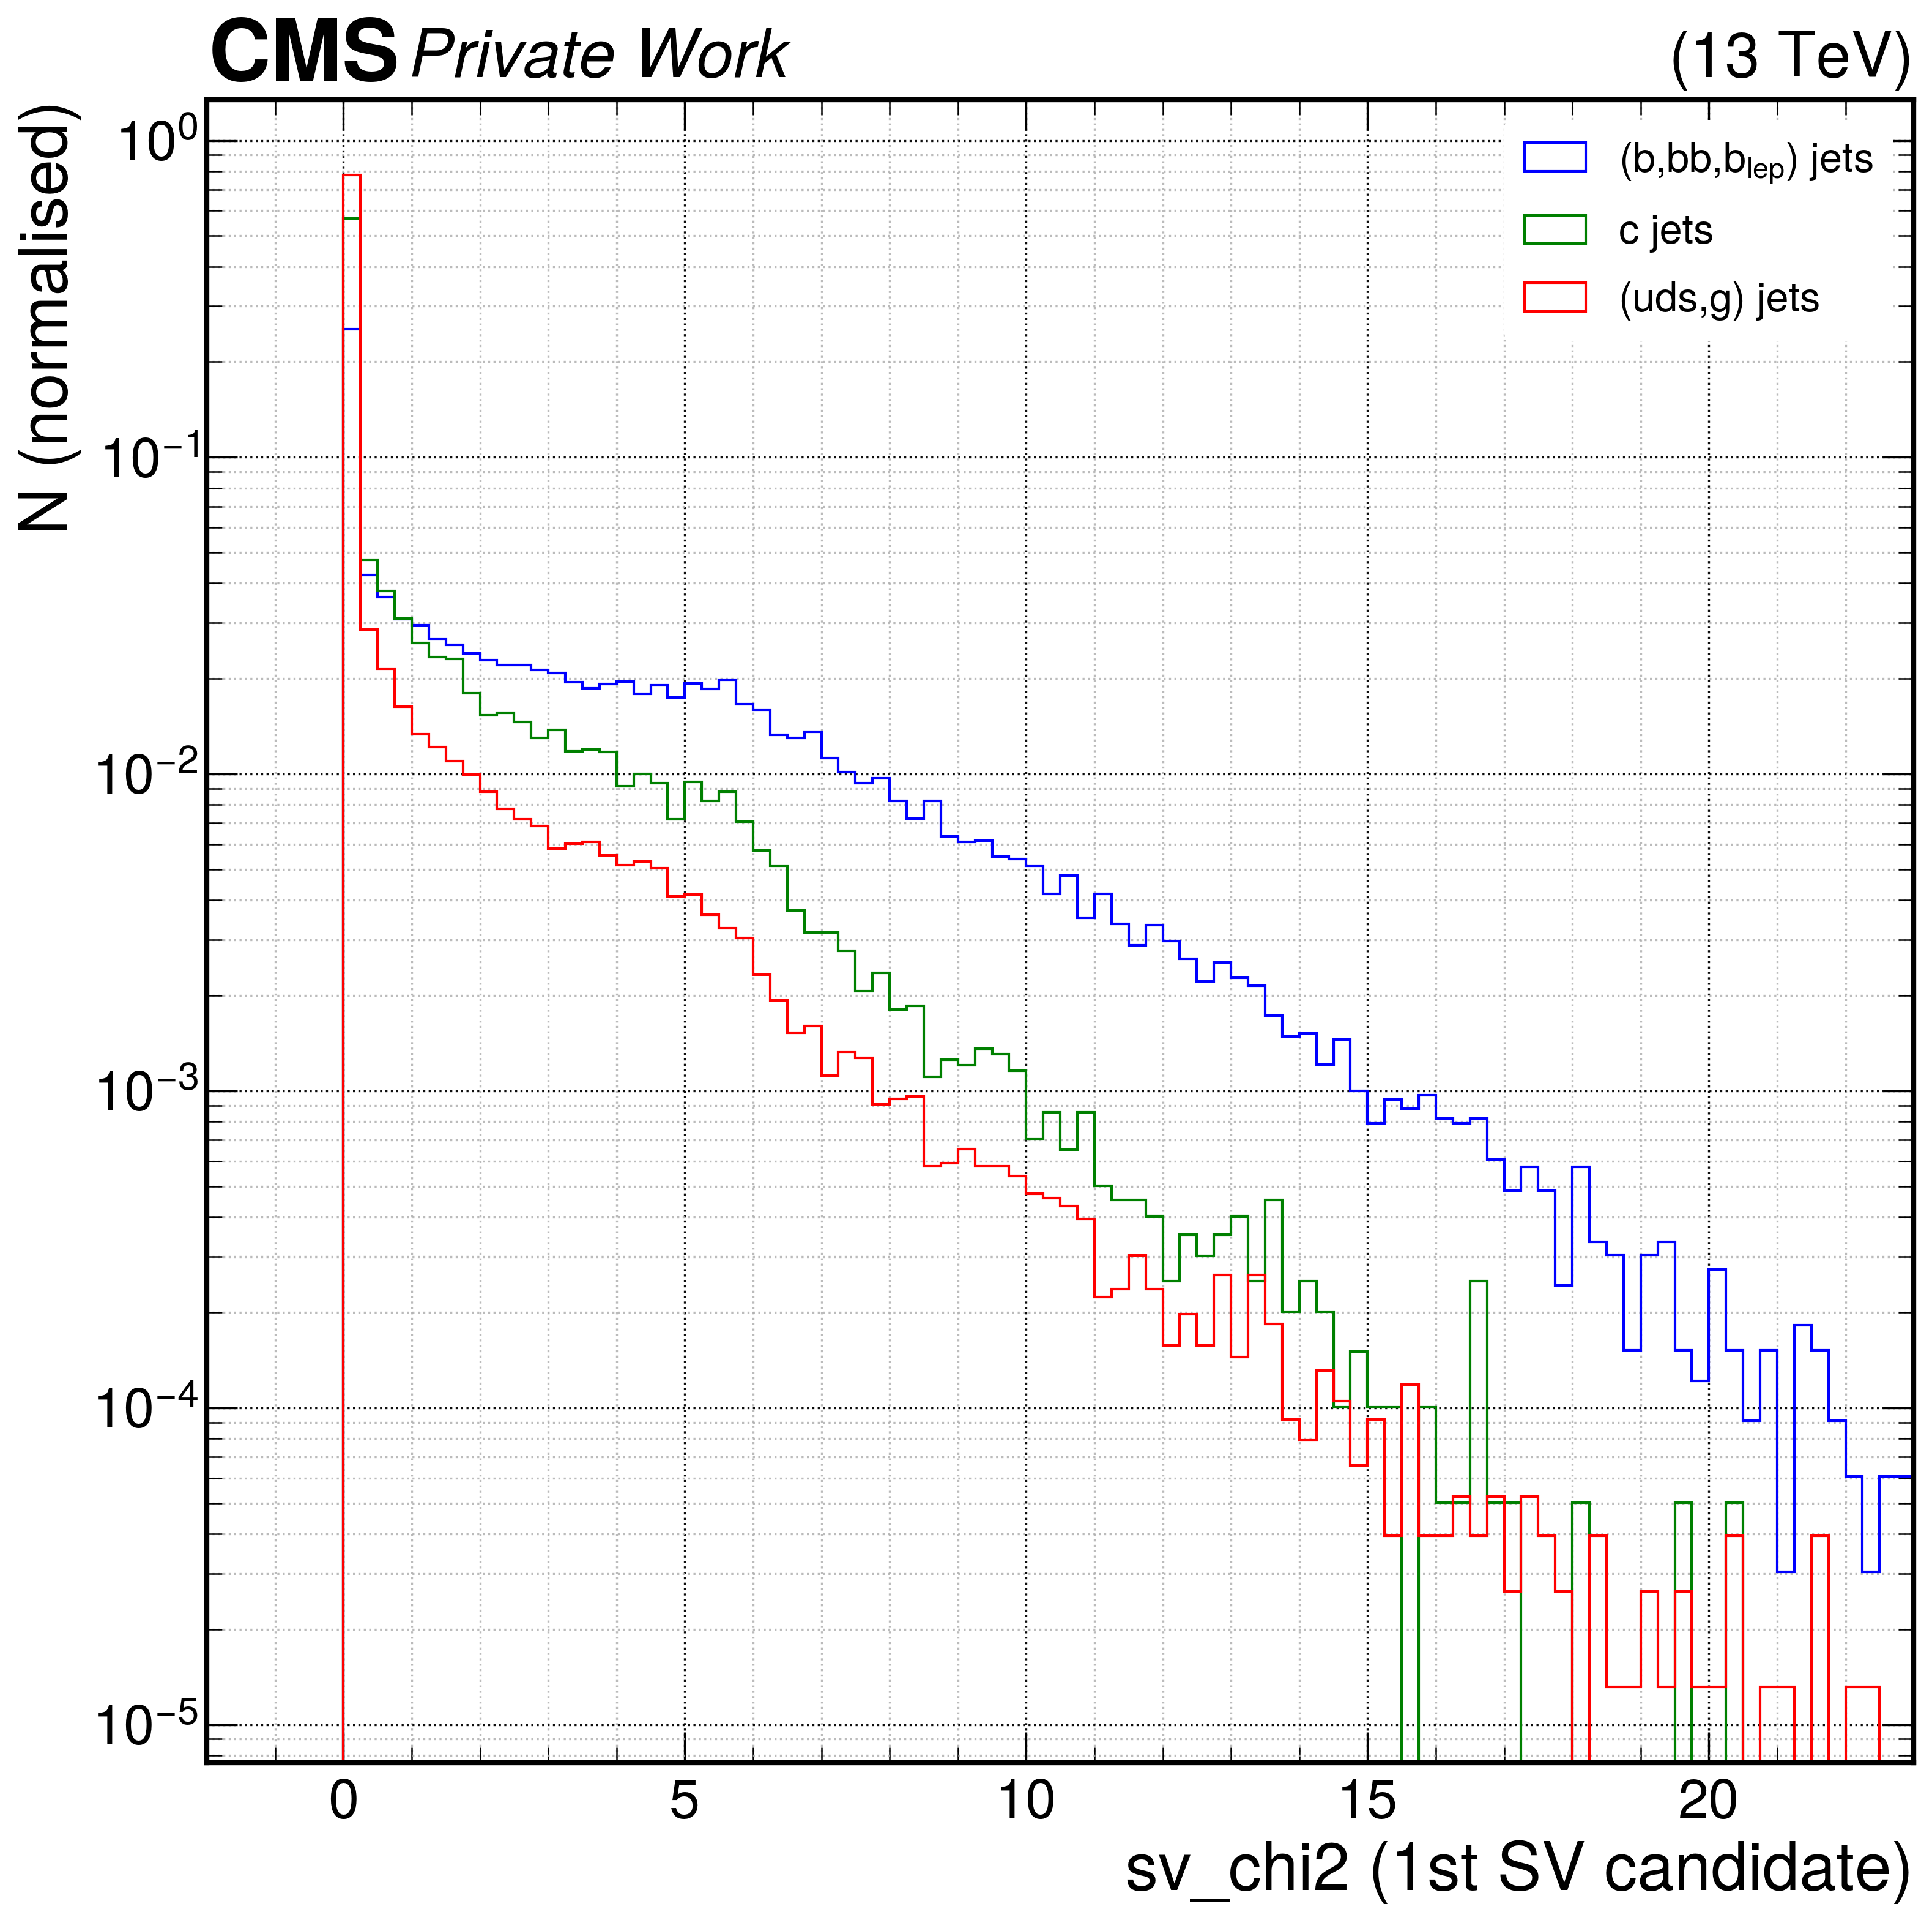

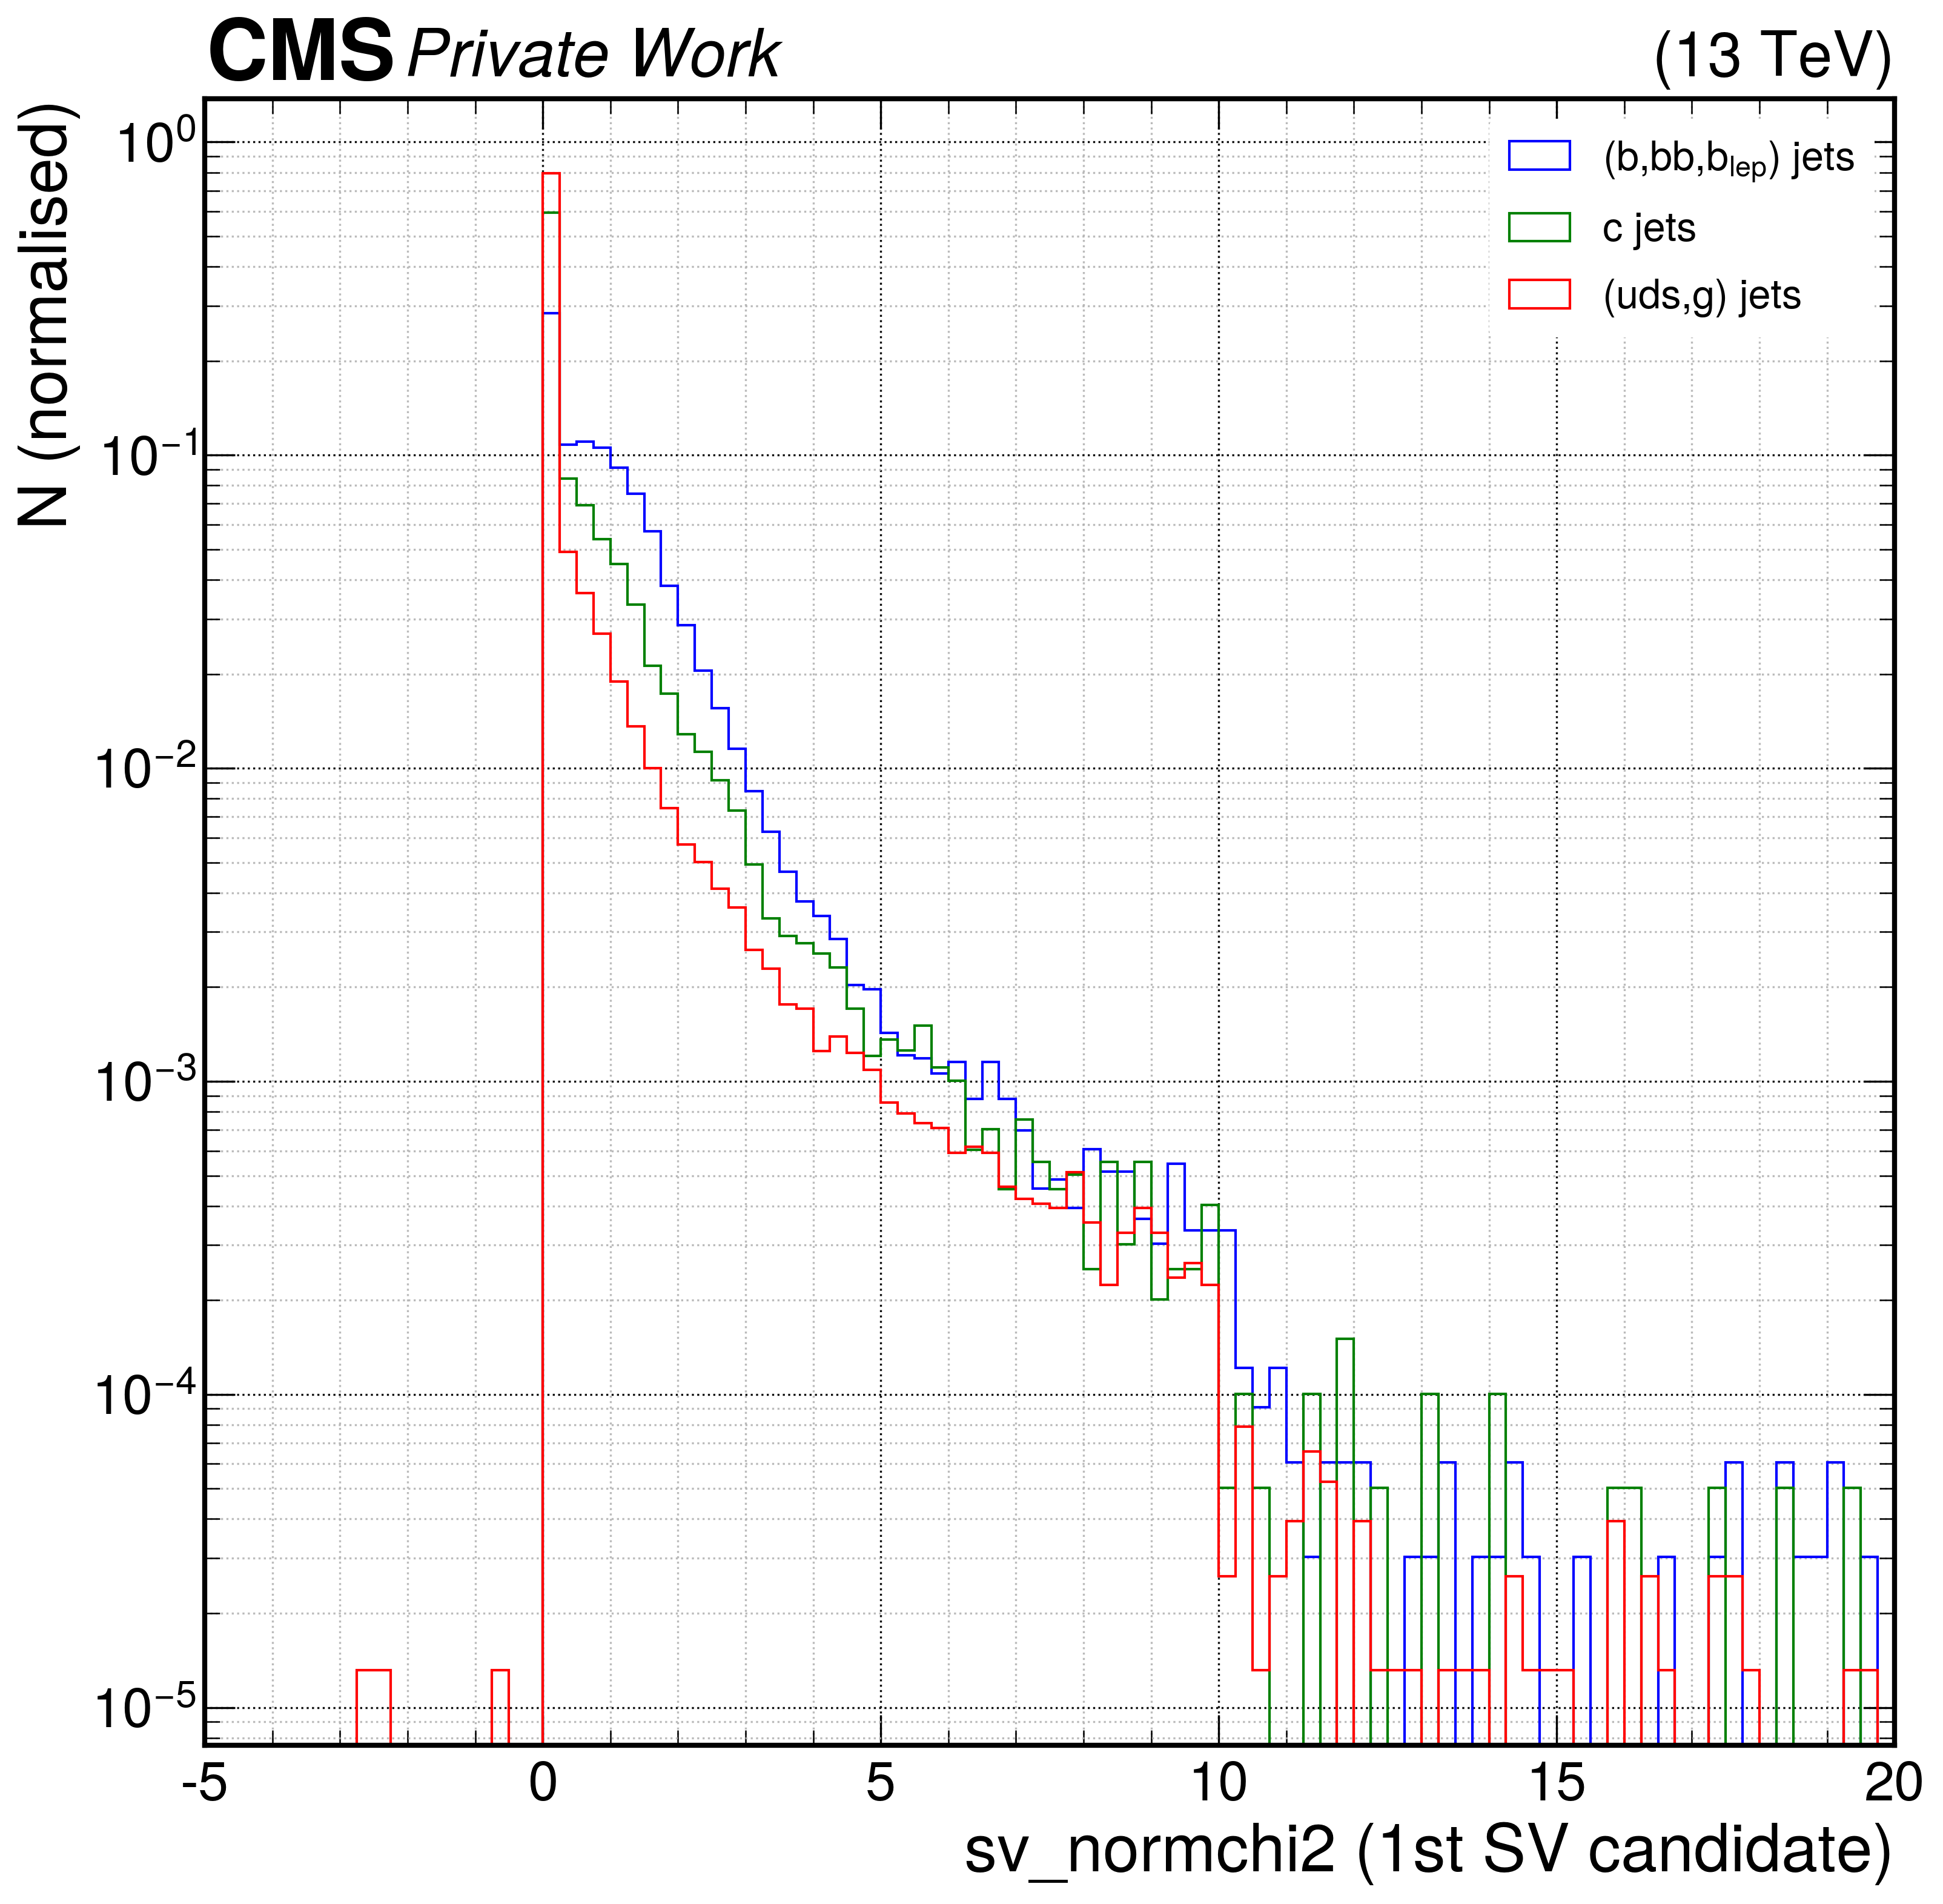

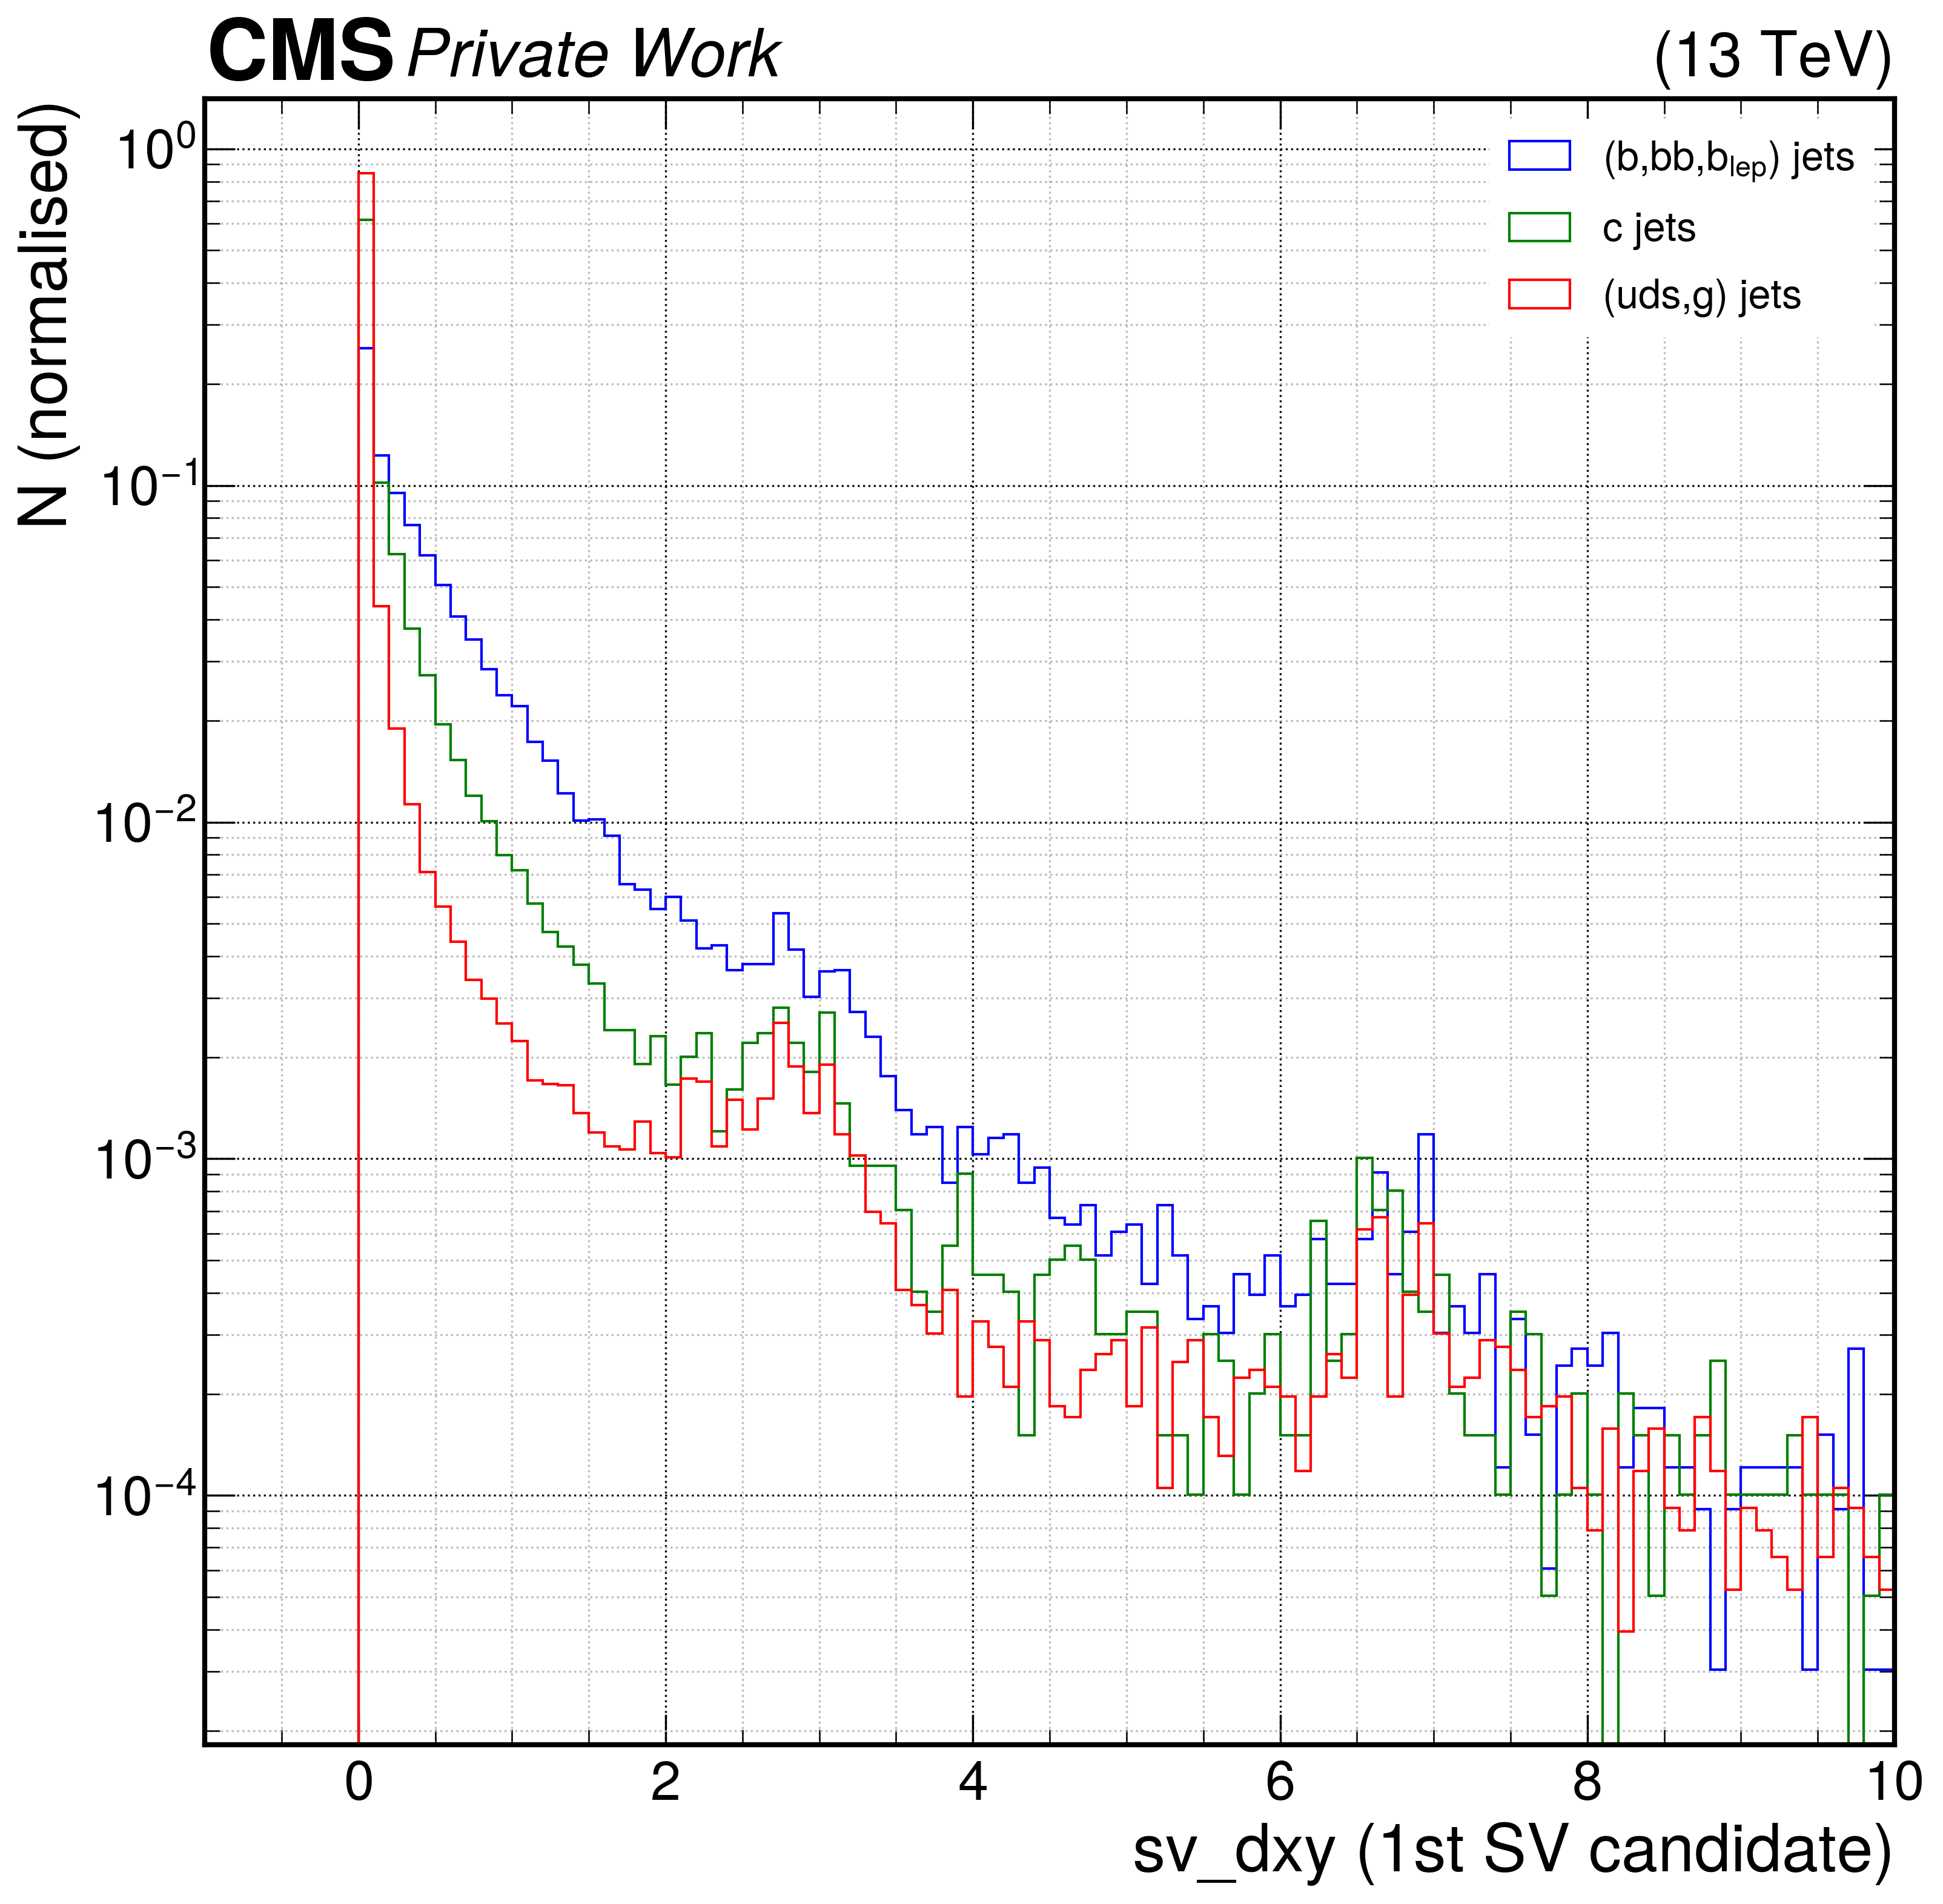

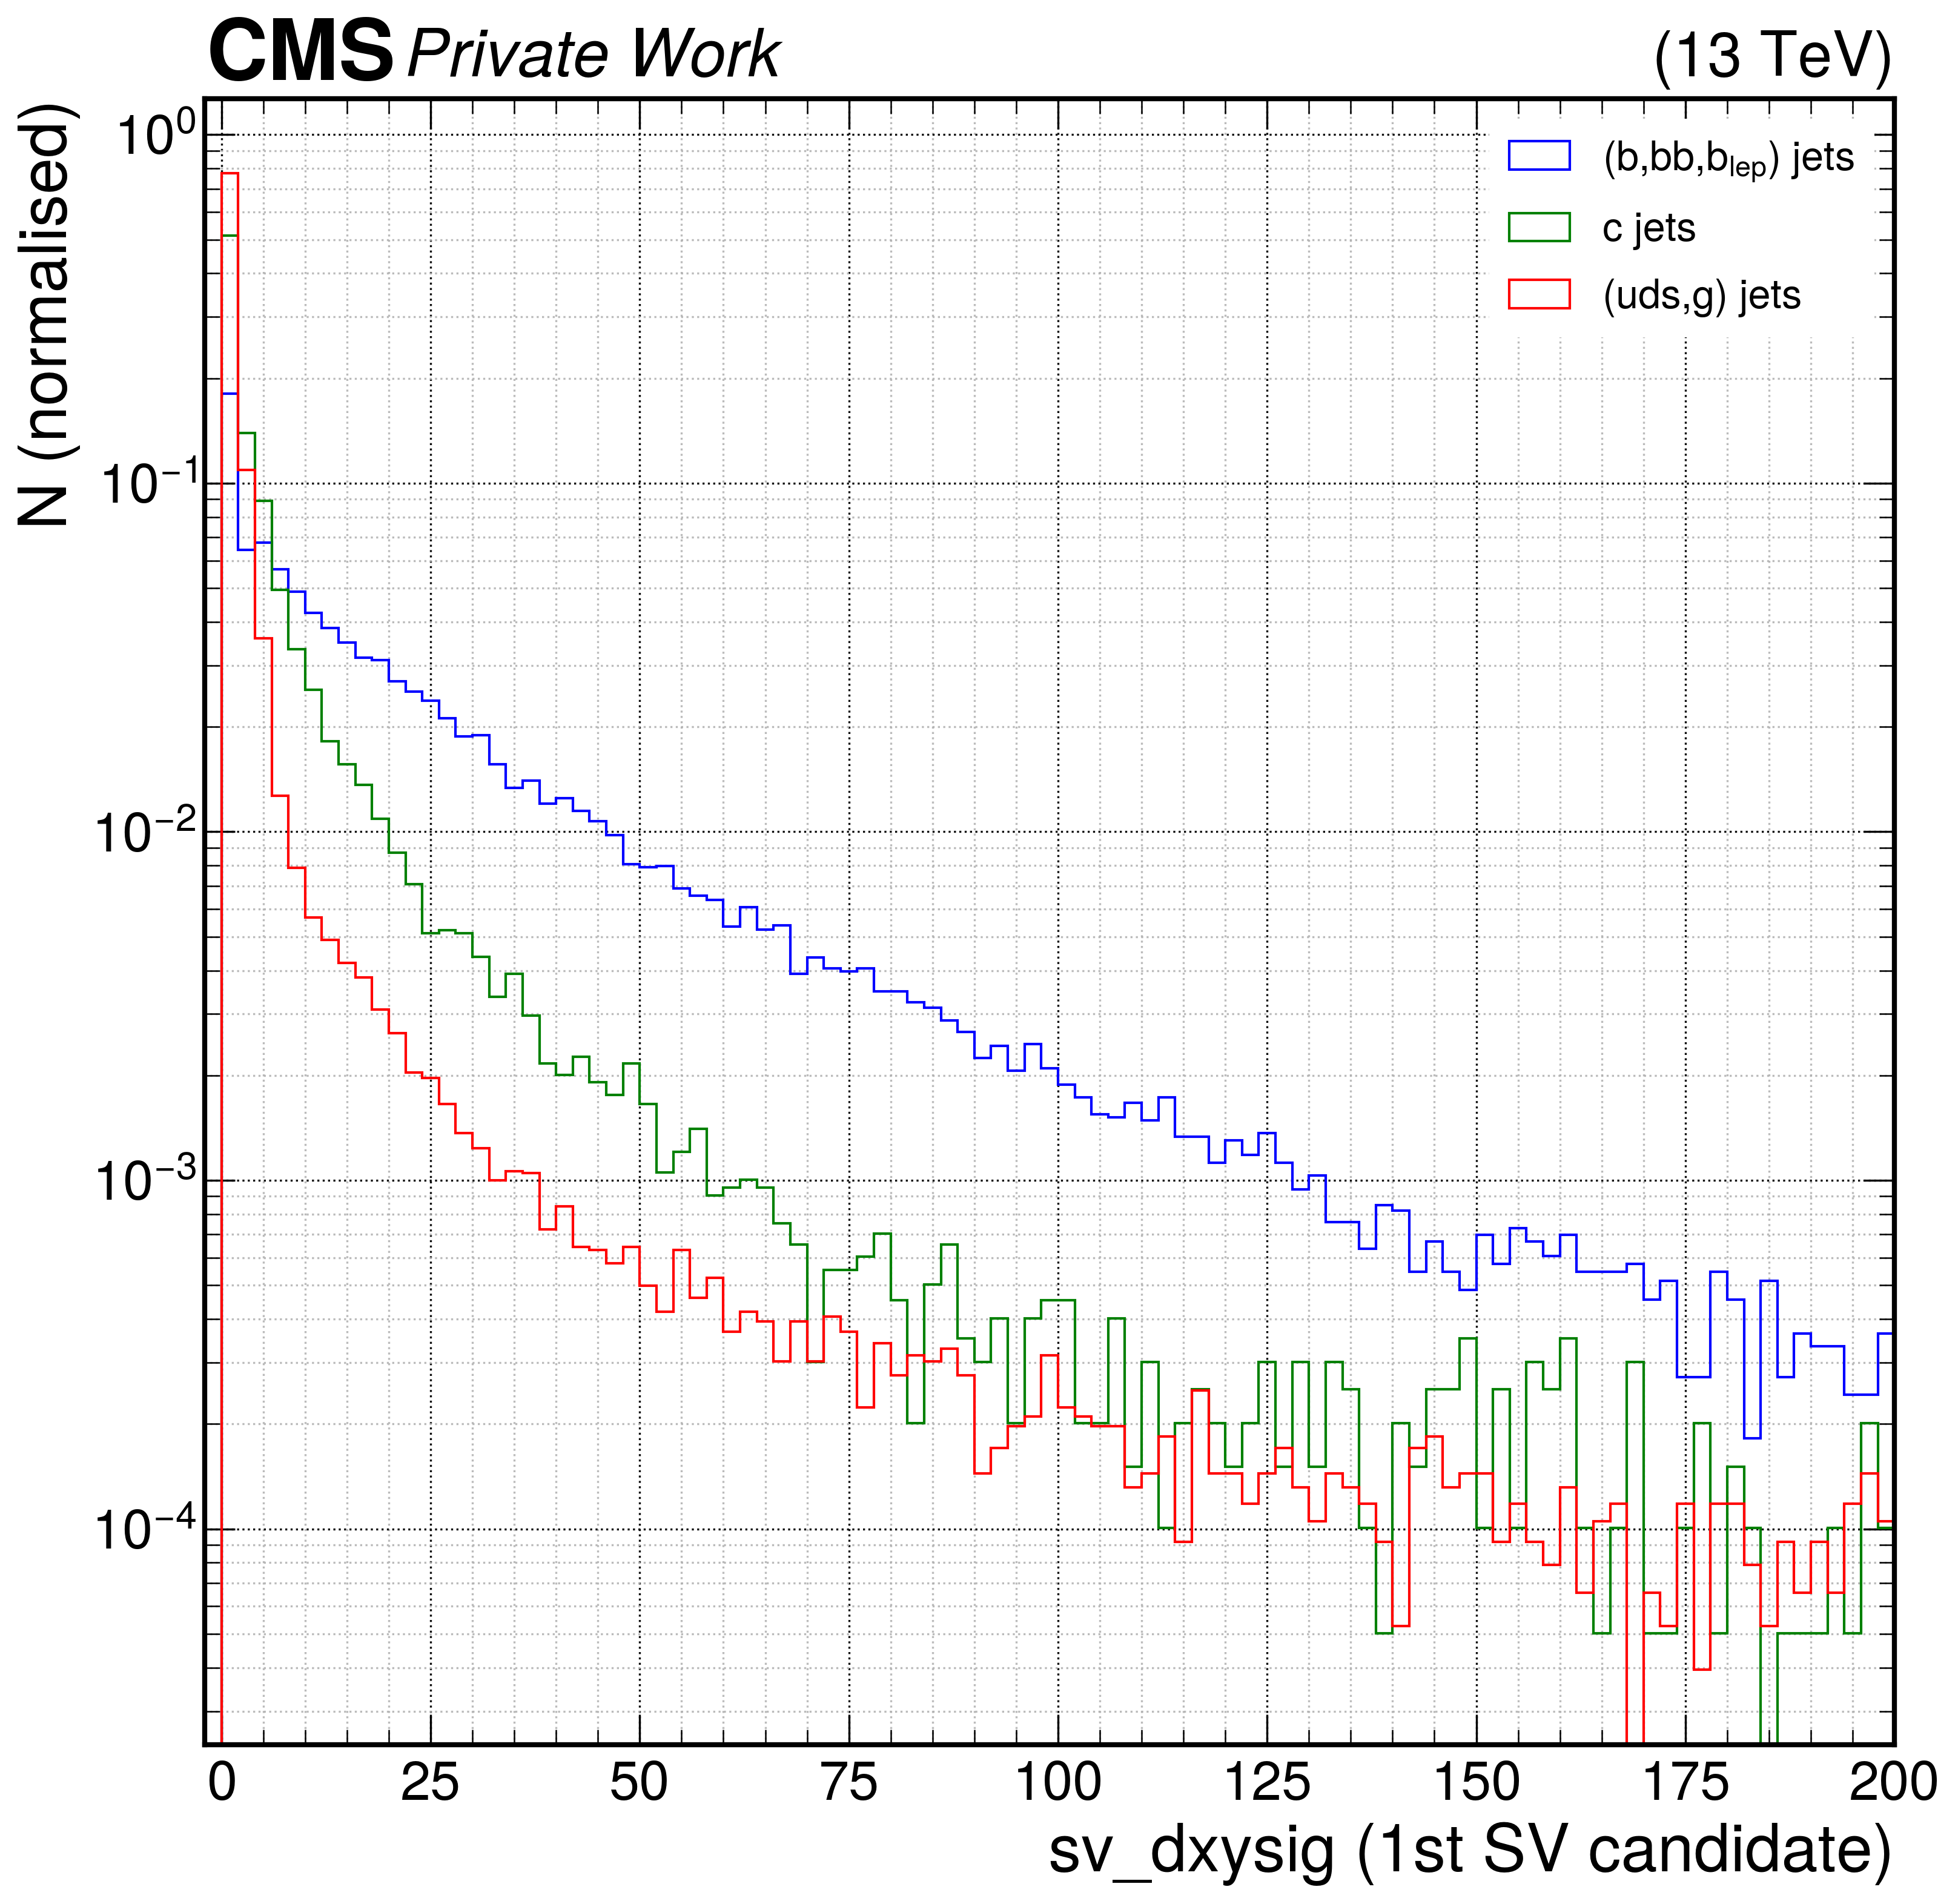

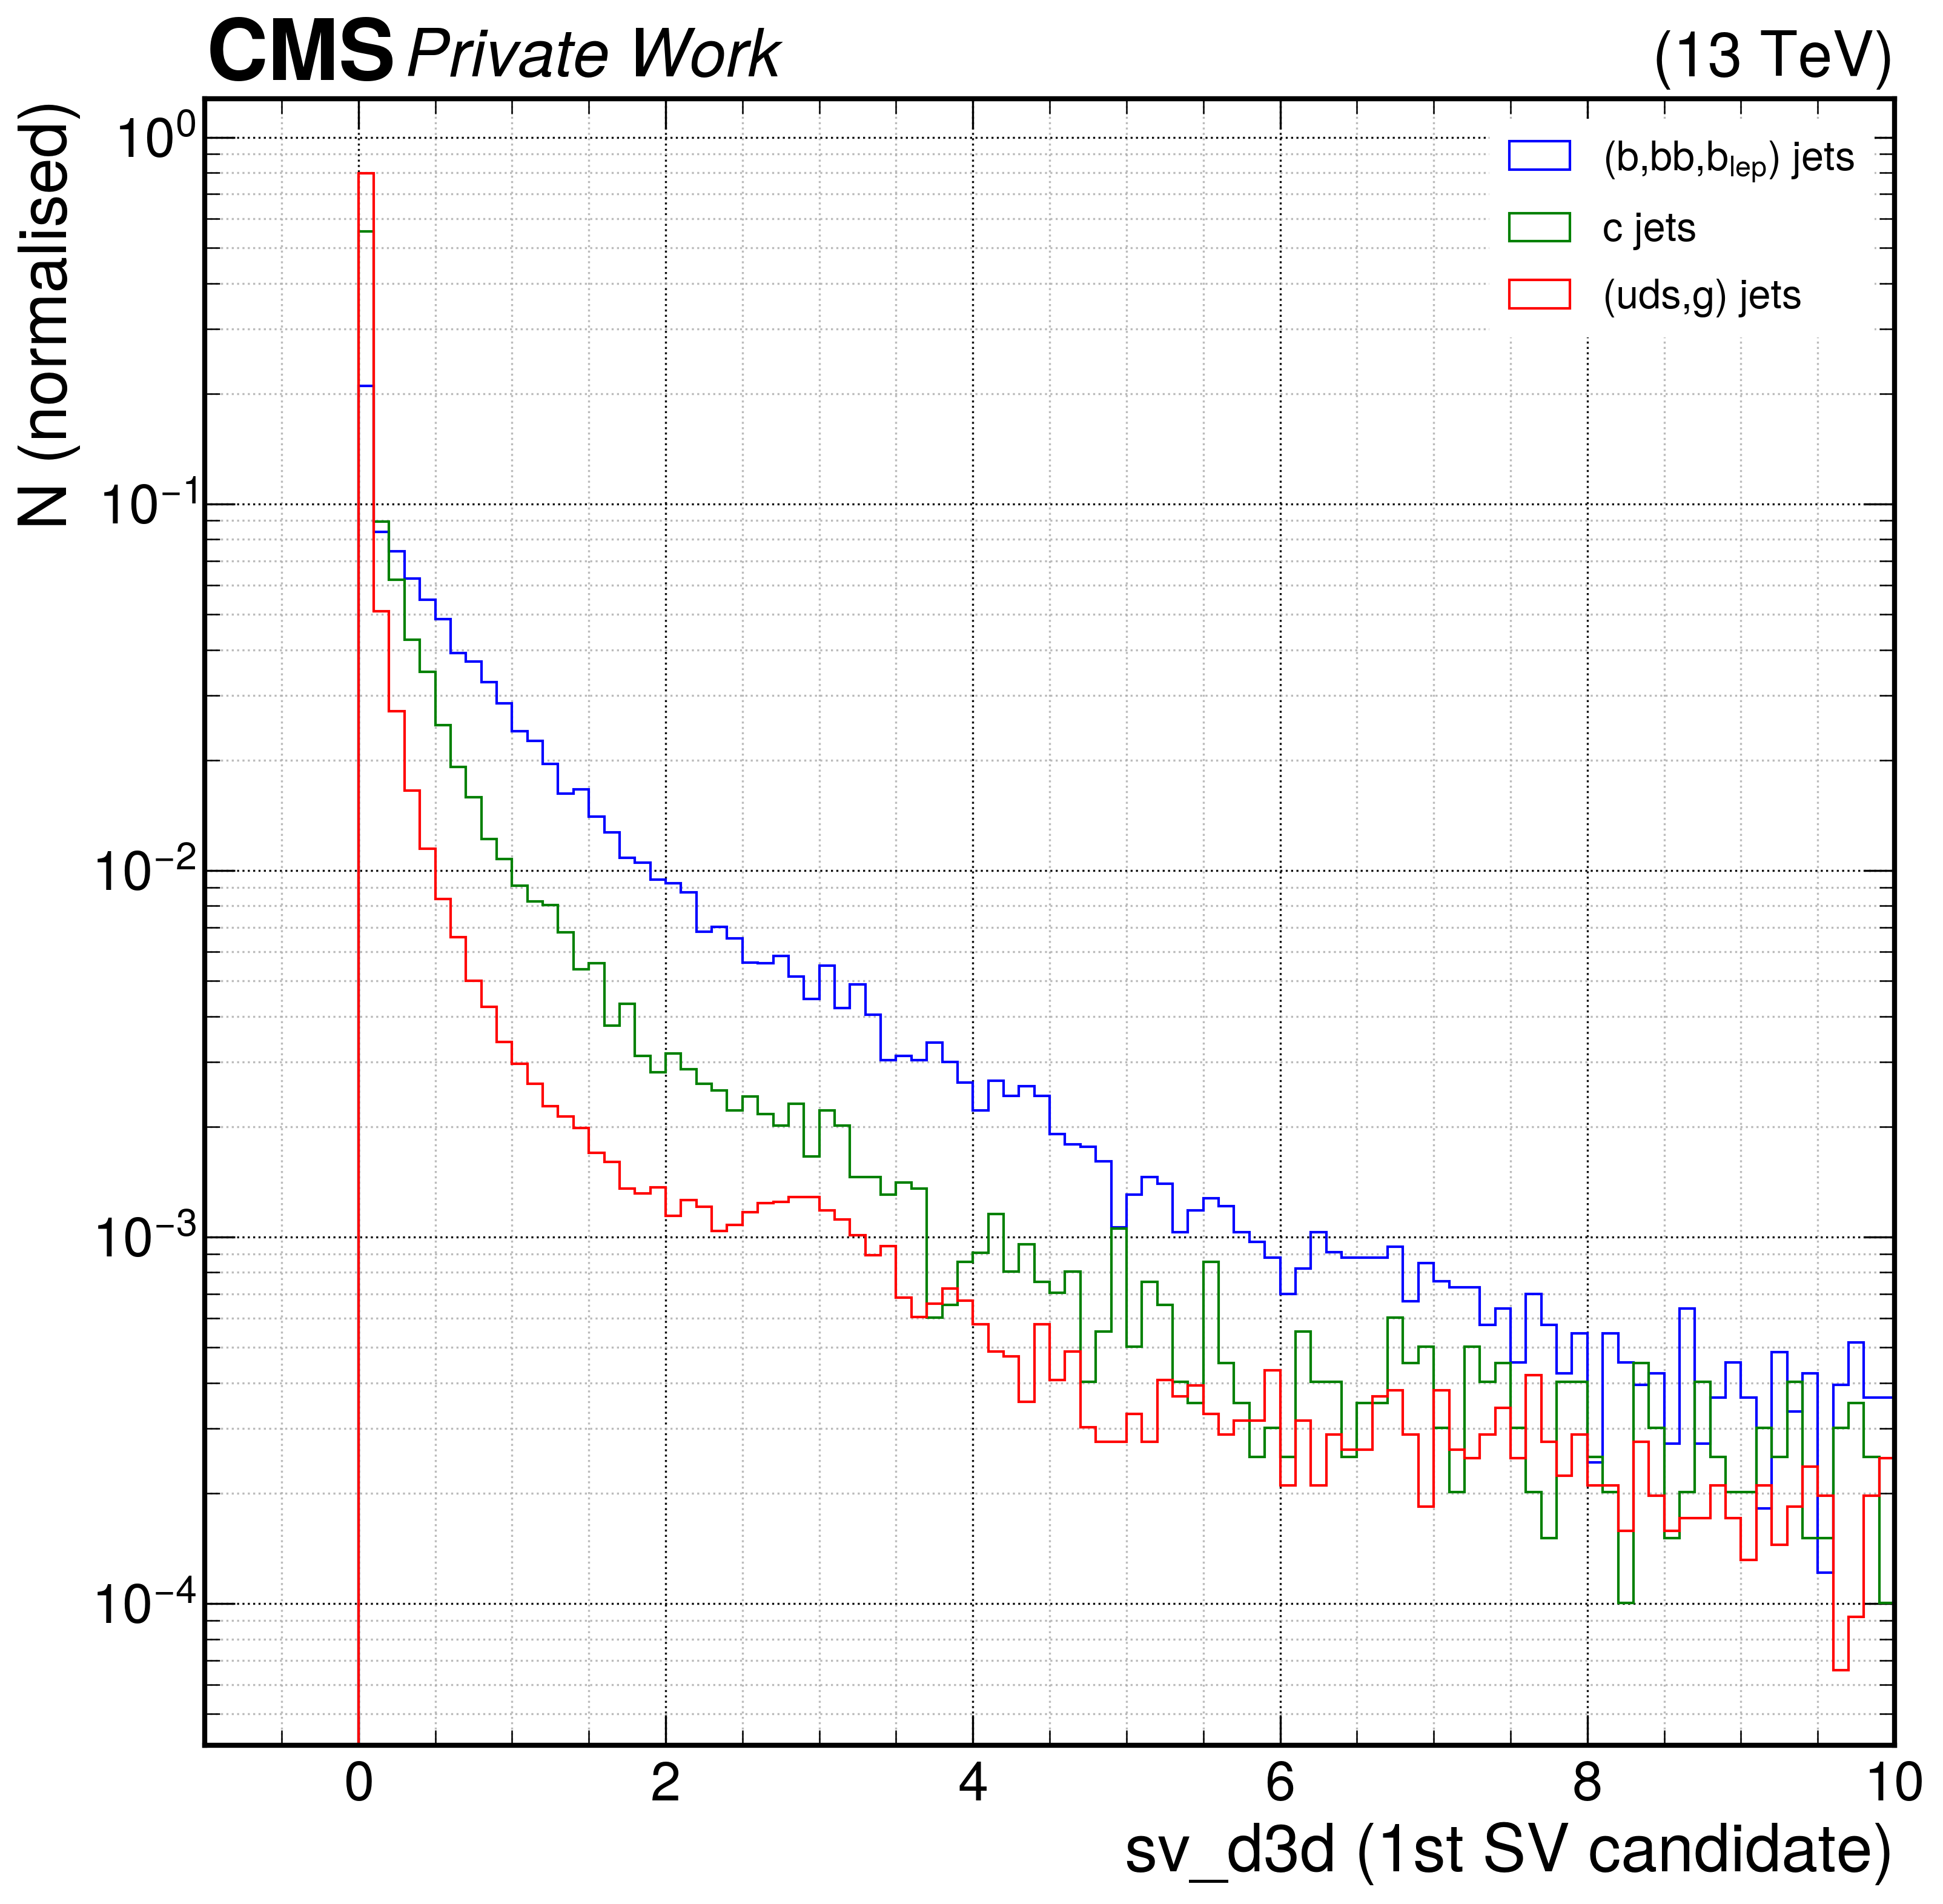

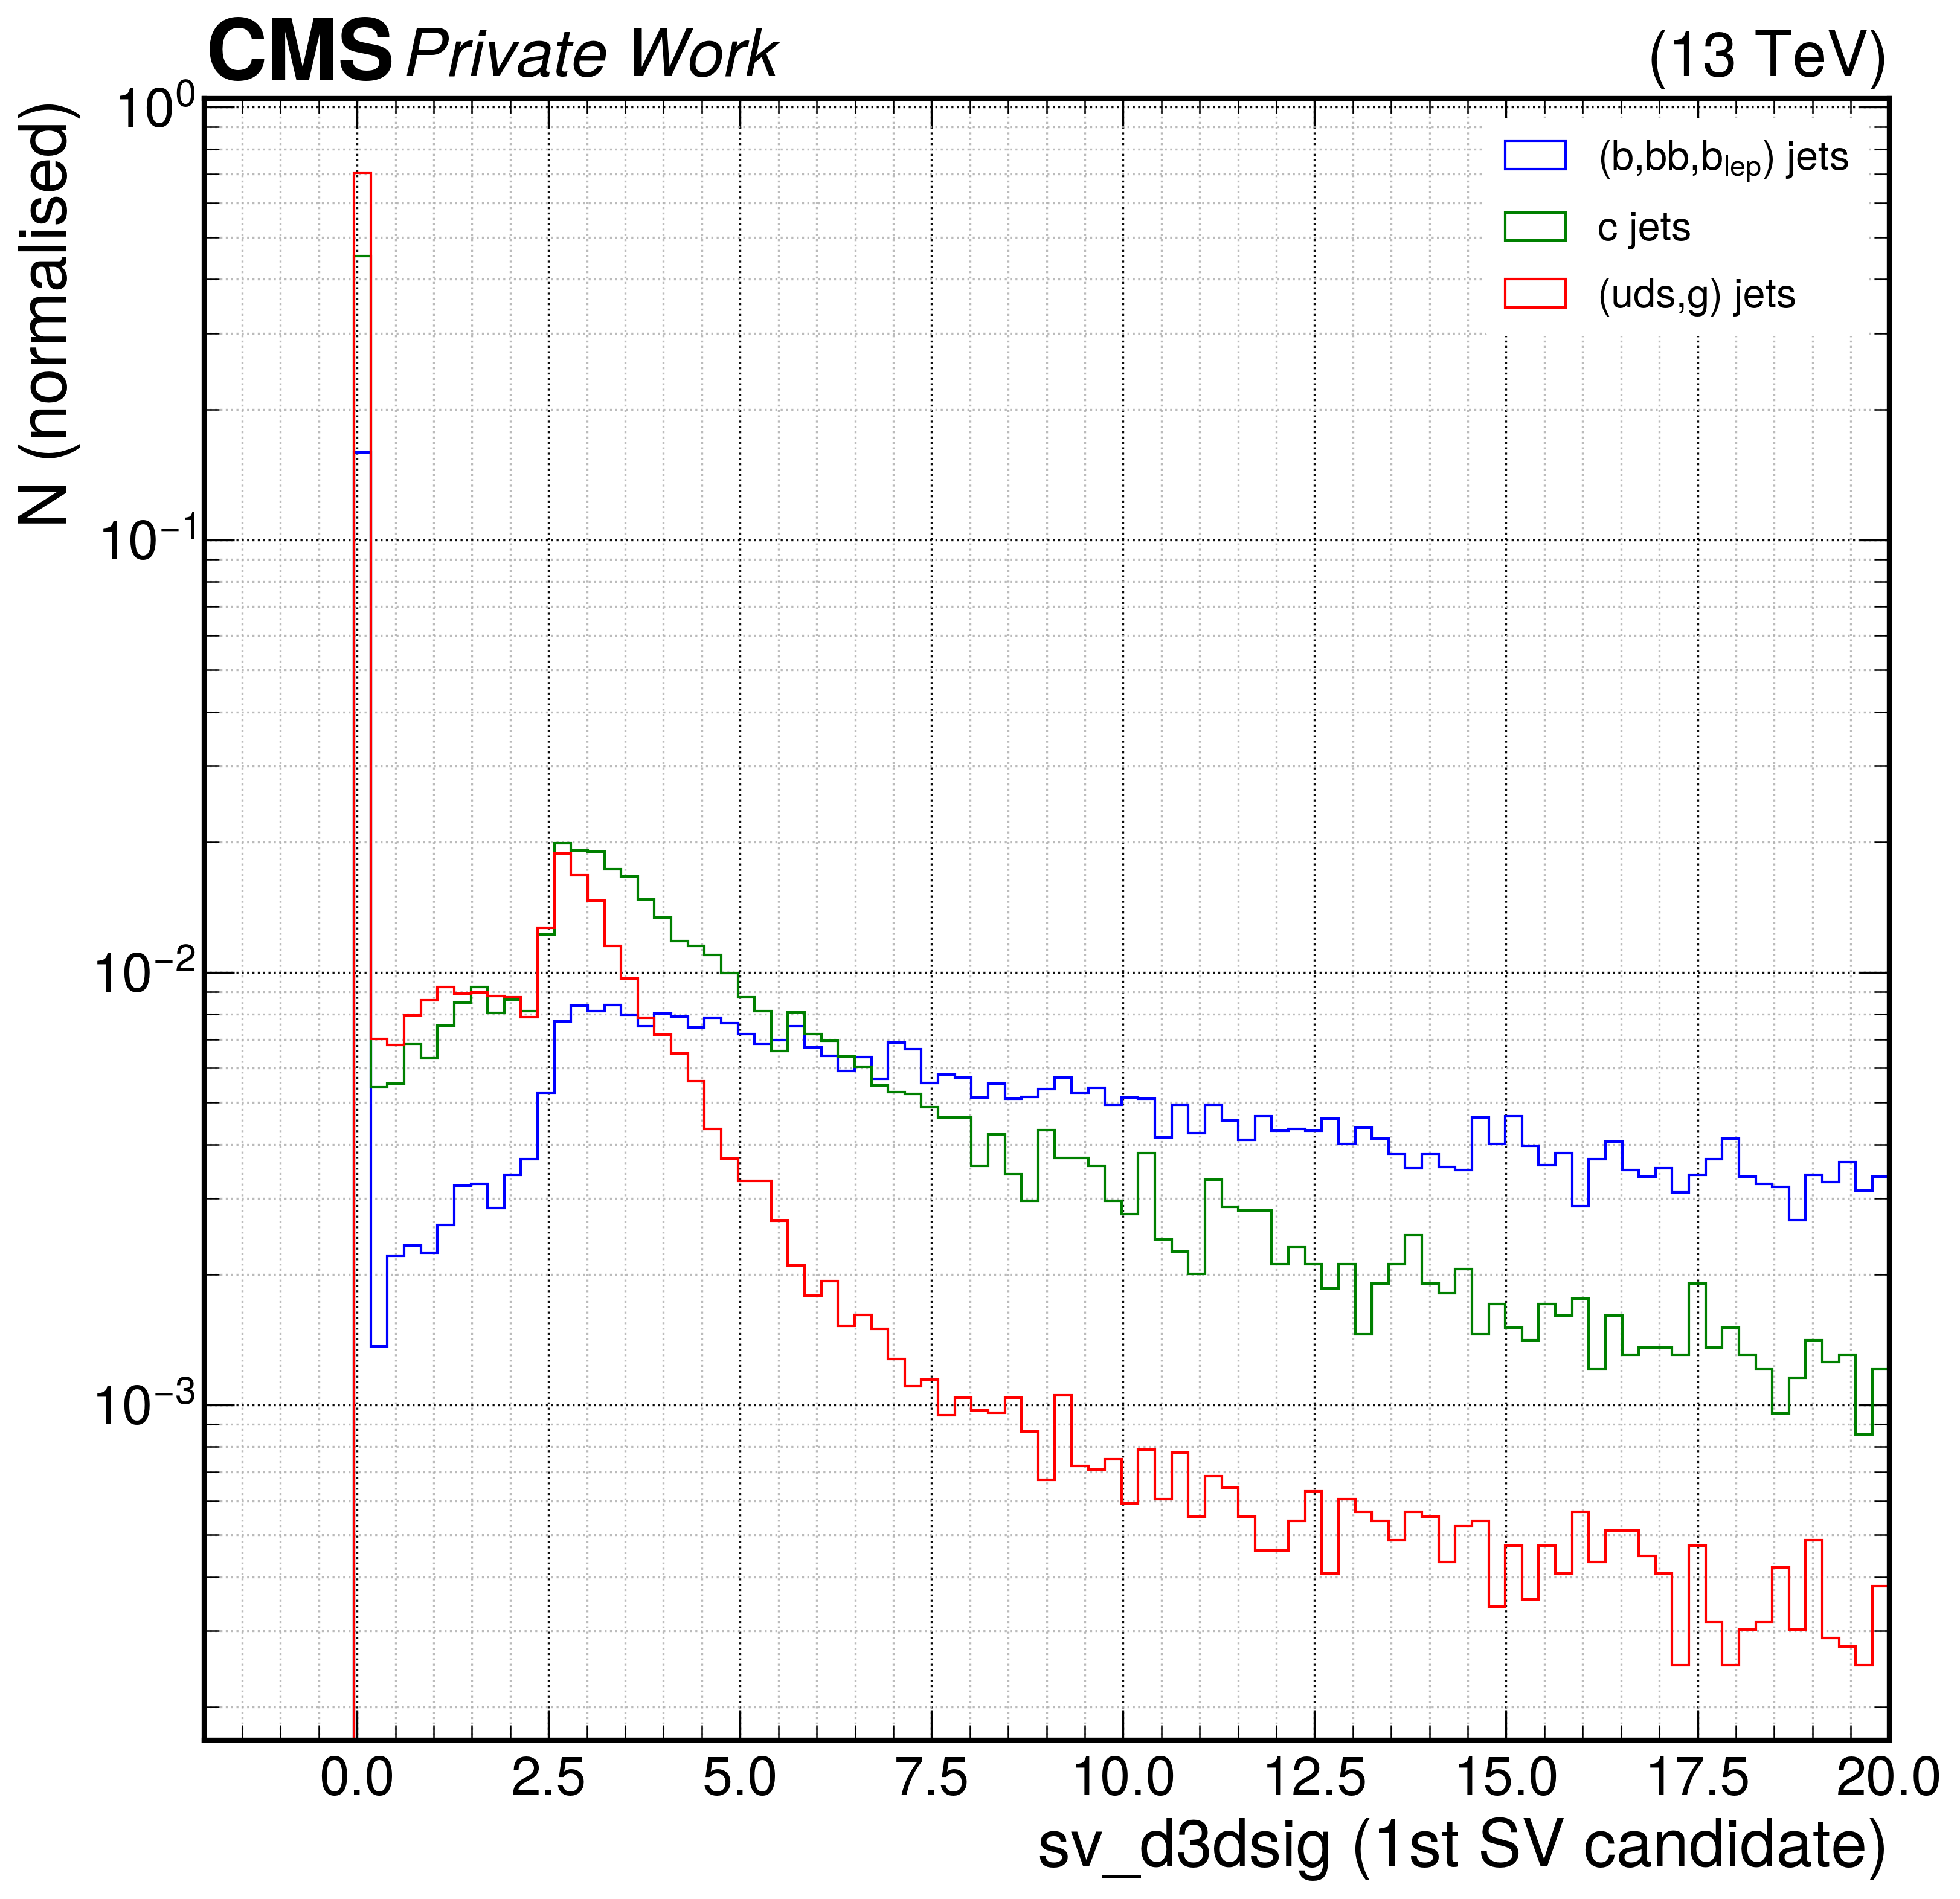

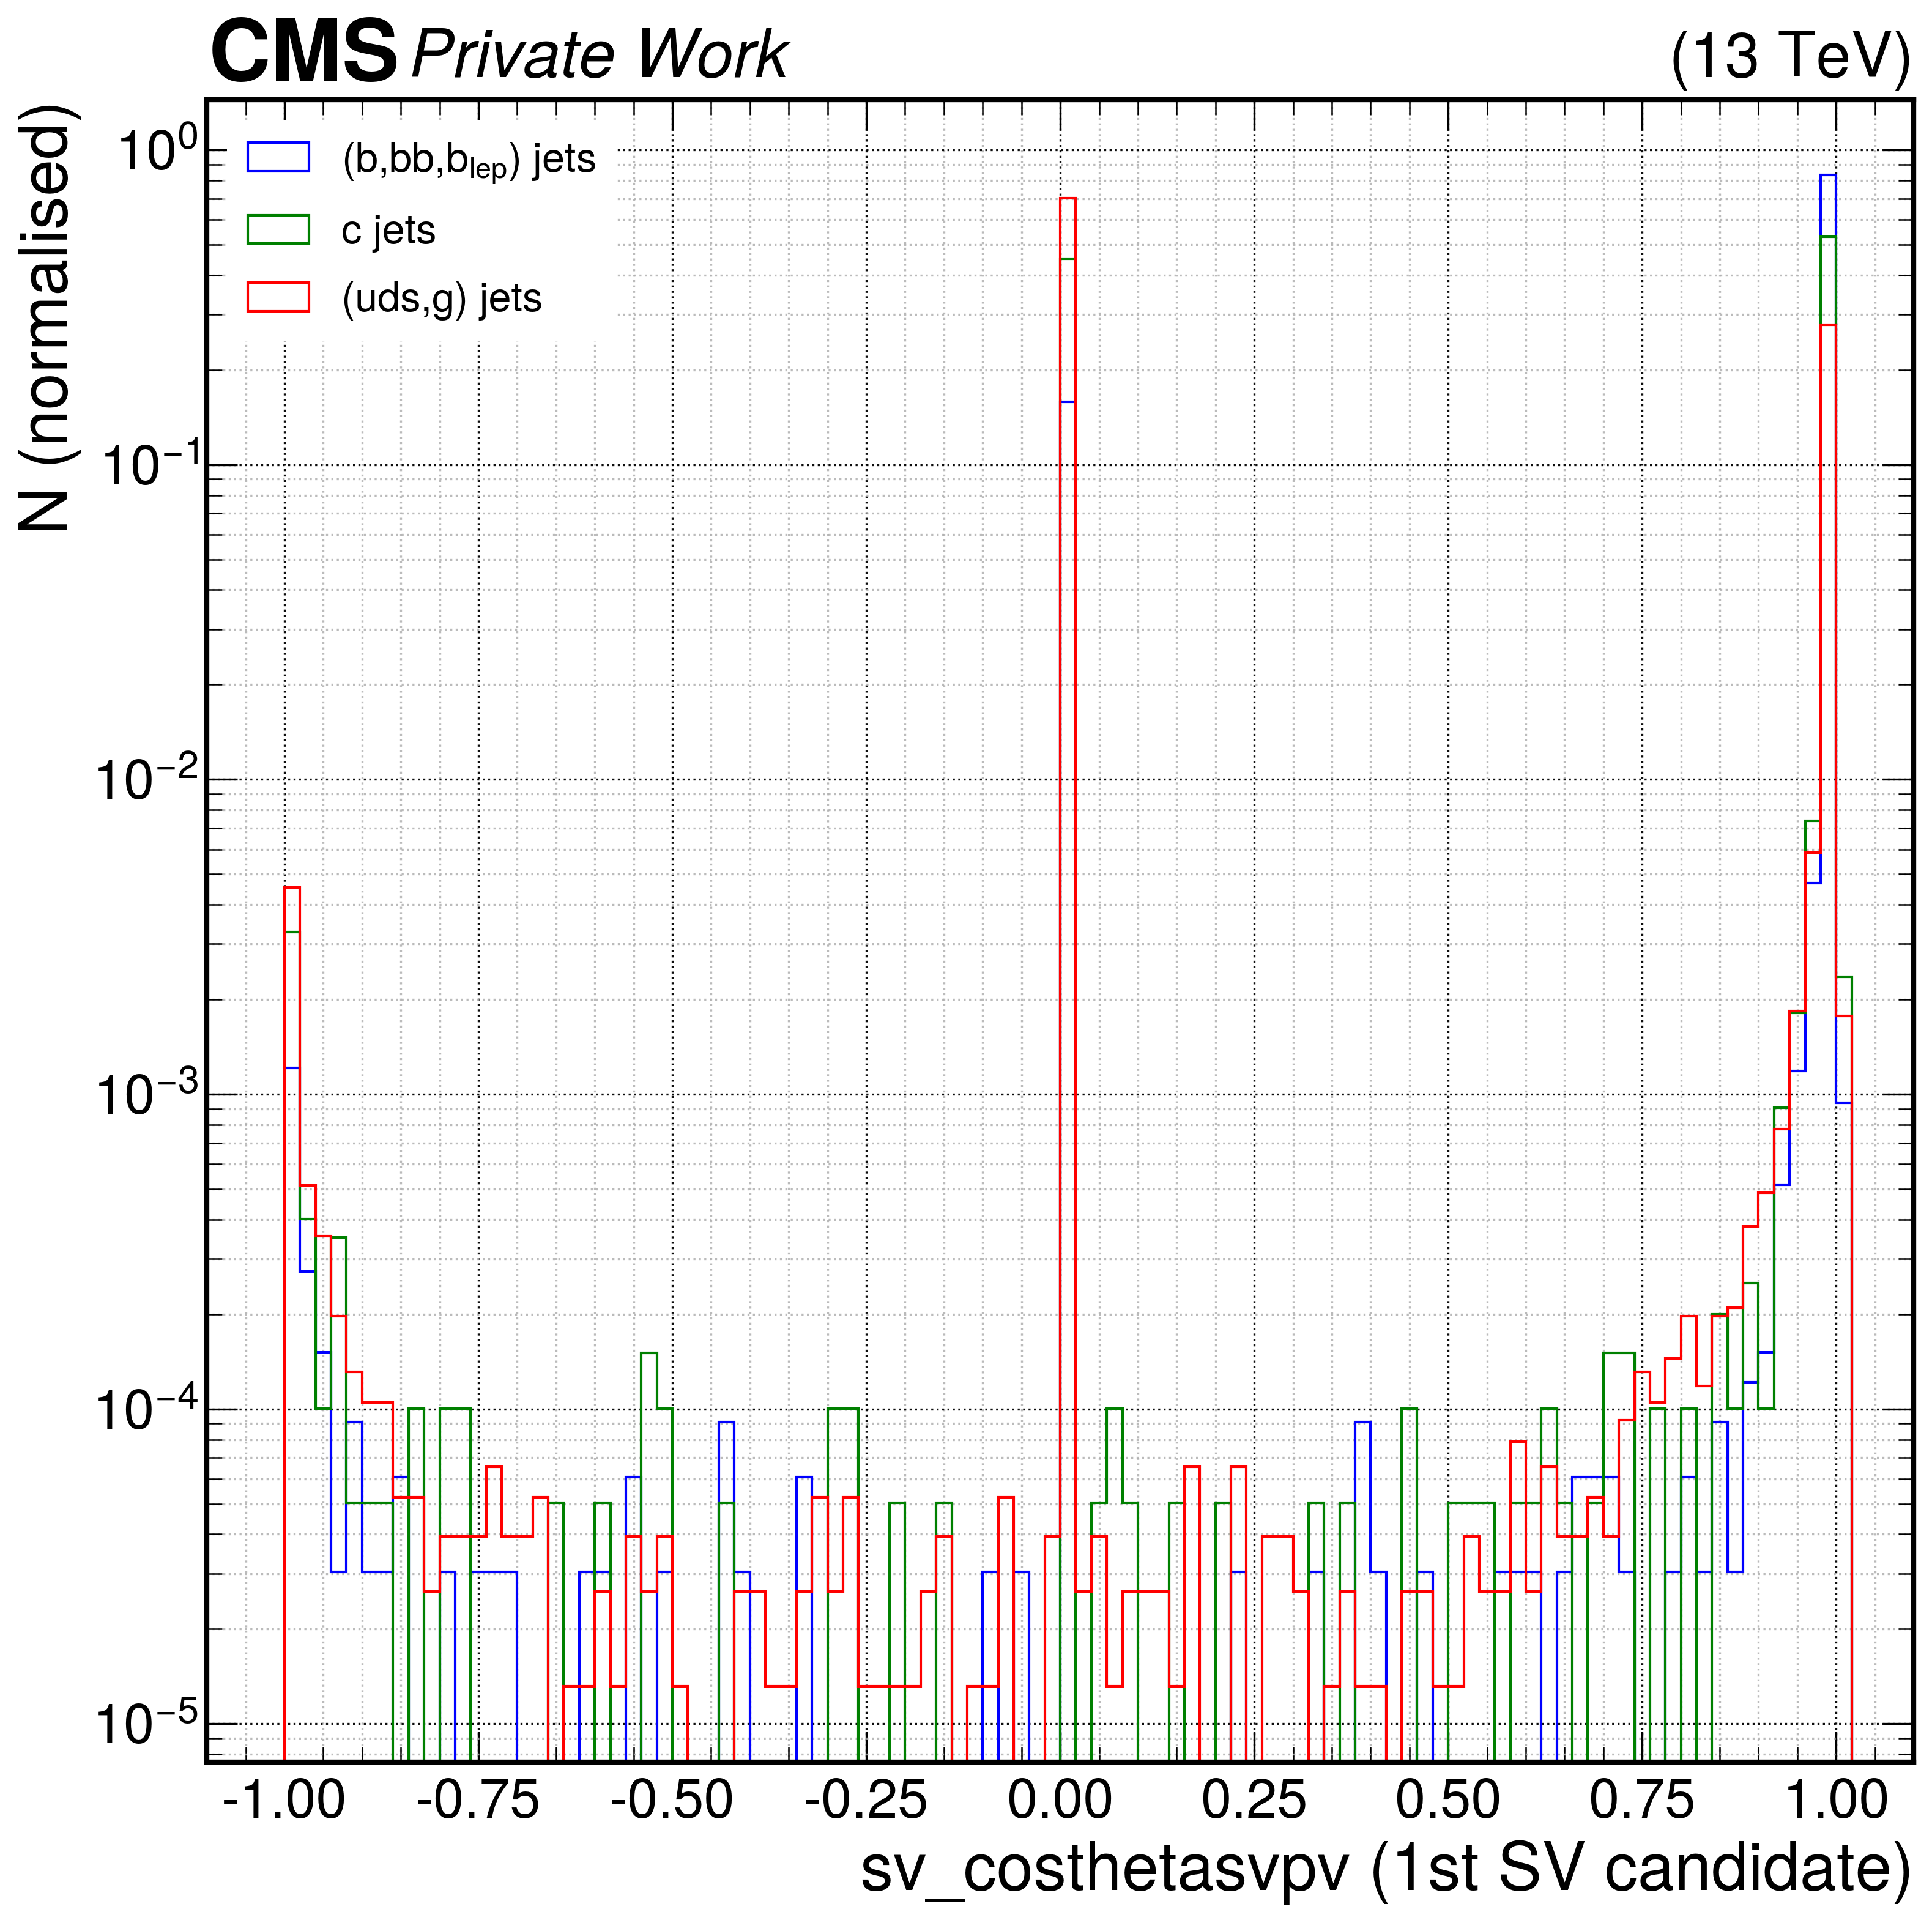

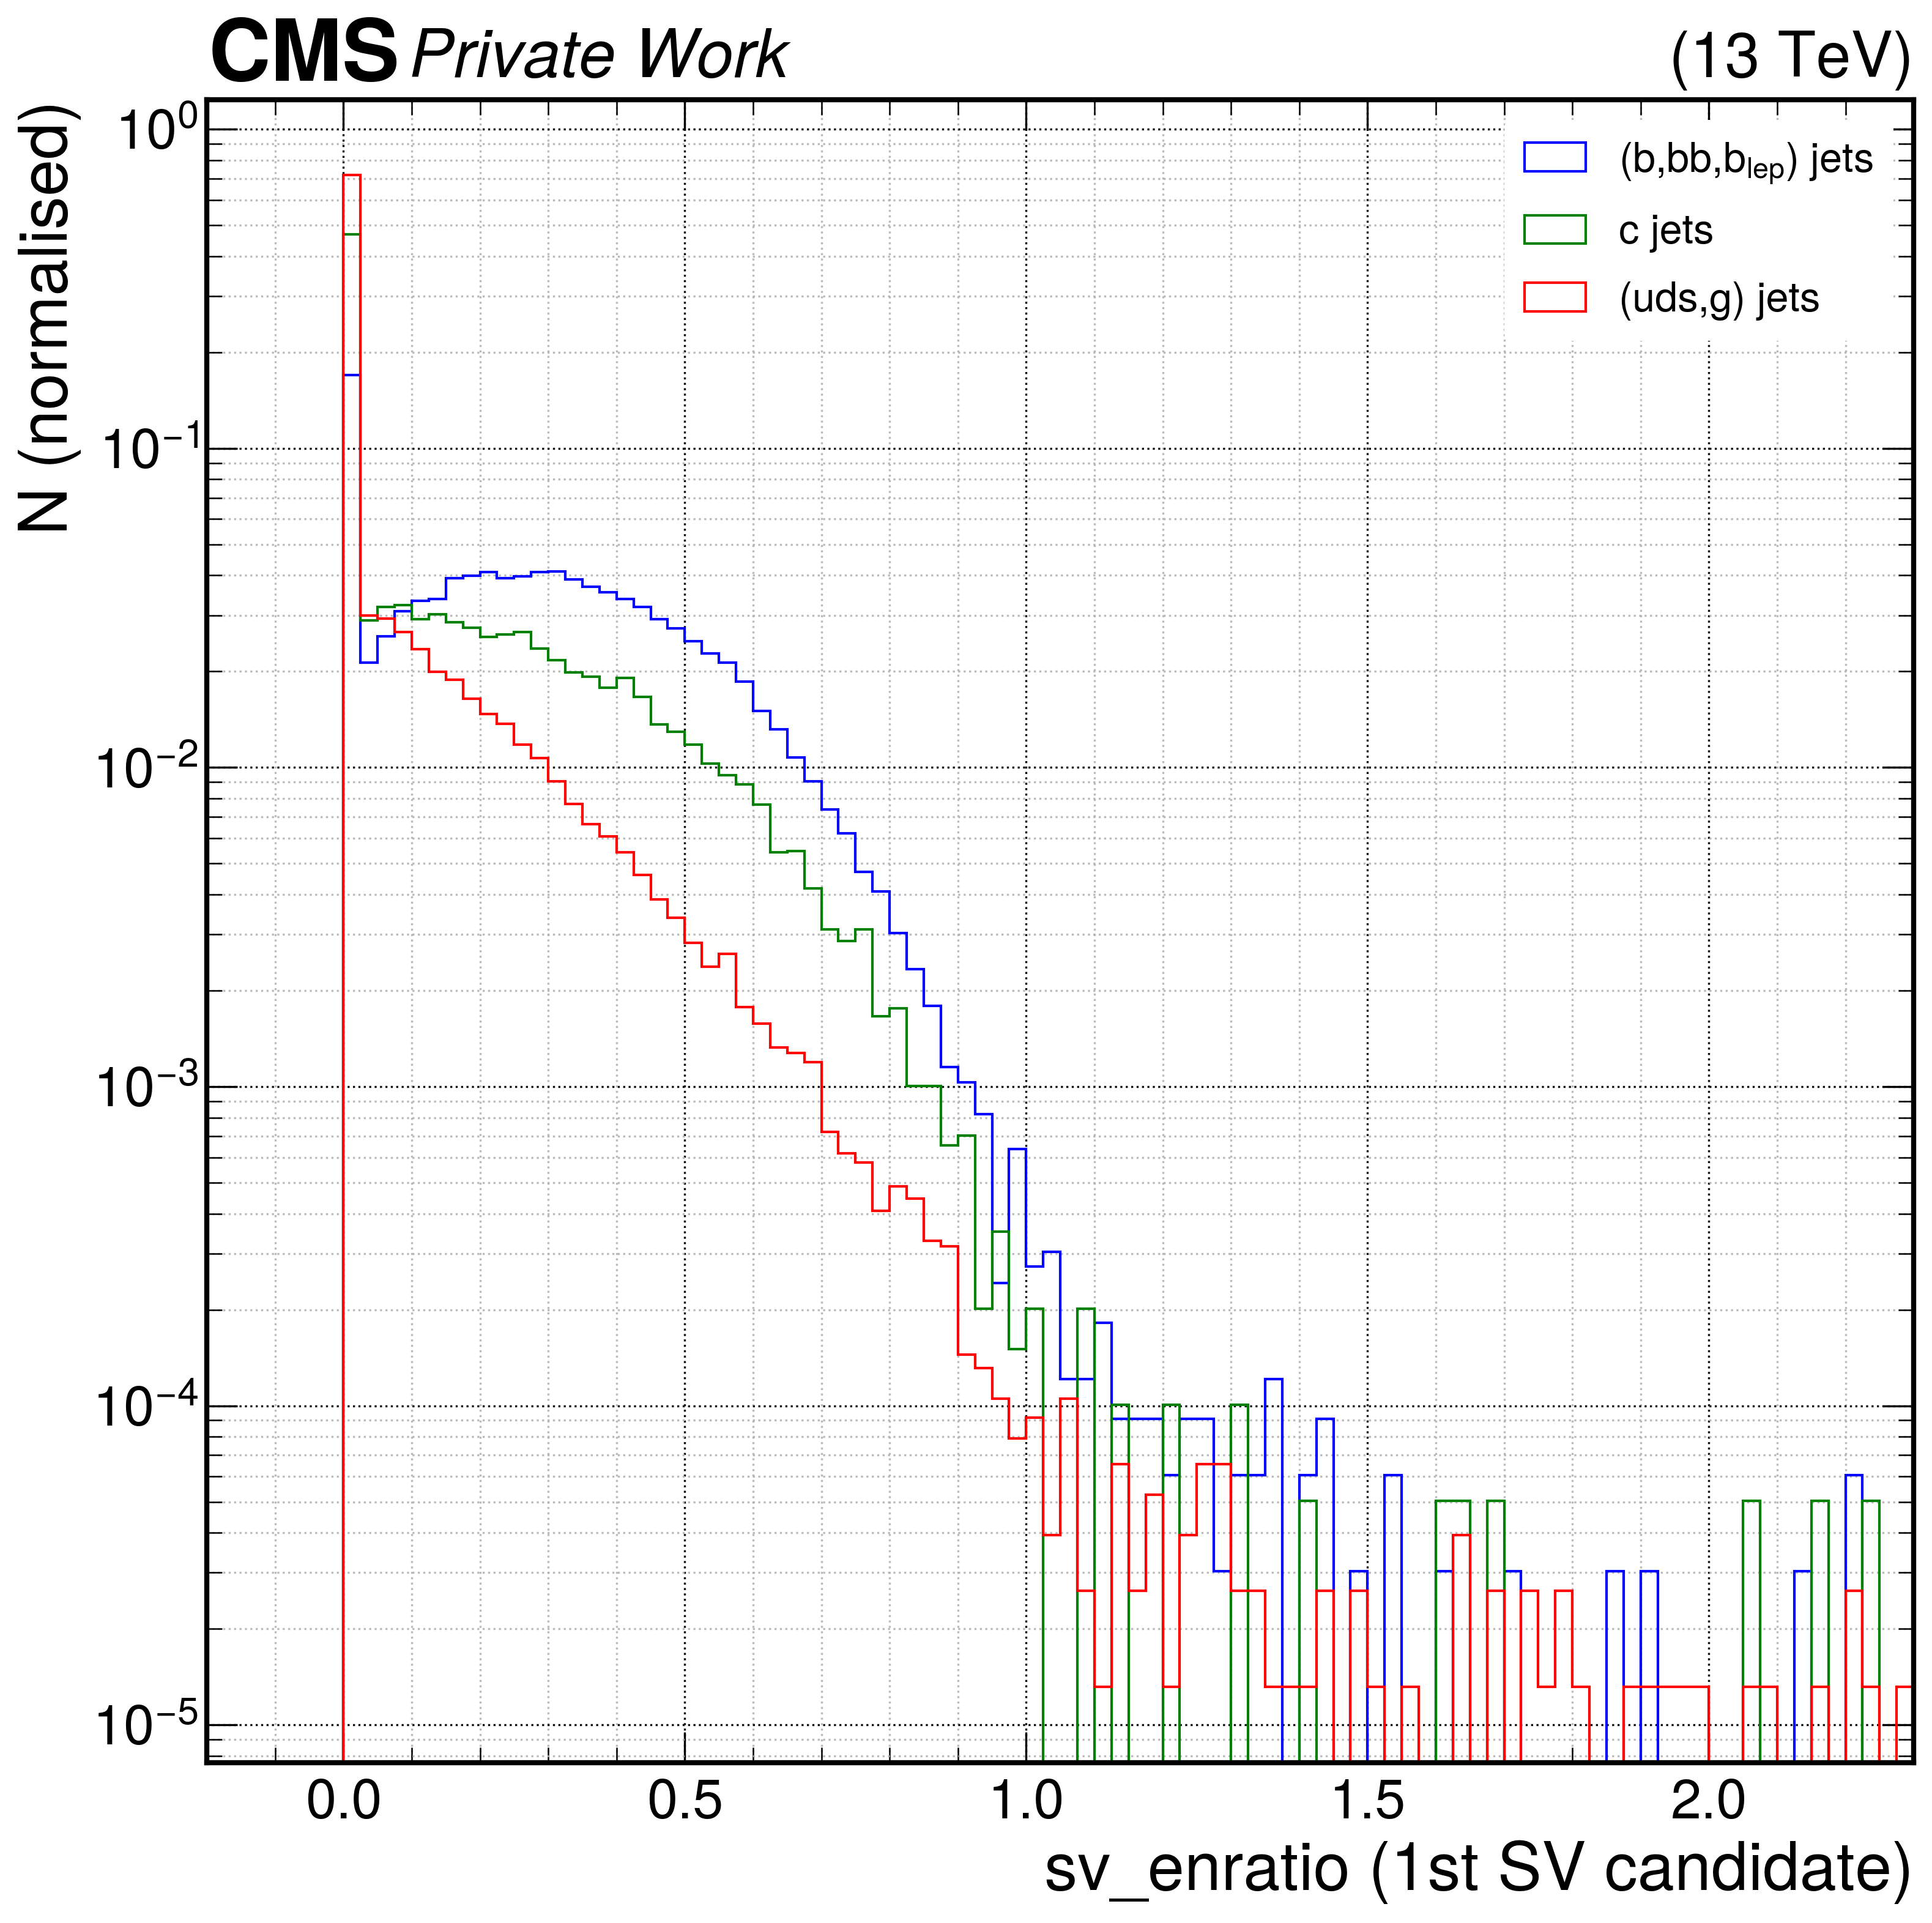

In [11]:
### Plot histograms of quantities
quantities = [
             #'jet_pt','jet_eta', 'nCpfcand','nNpfcand', 'nsv','npv', 'TagVarCSV_trackSumJetEtRatio', 'TagVarCSV_trackSumJetDeltaR', 'TagVarCSV_vertexCategory', 'TagVarCSV_trackSip2dValAboveCharm', 'TagVarCSV_trackSip2dSigAboveCharm', 'TagVarCSV_trackSip3dValAboveCharm', 'TagVarCSV_trackSip3dSigAboveCharm', 'TagVarCSV_jetNSelectedTracks', 'TagVarCSV_jetNTracksEtaRel',
             #'Cpfcan_BtagPf_trackEtaRel', 'Cpfcan_BtagPf_trackPtRel', 'Cpfcan_BtagPf_trackPPar', 'Cpfcan_BtagPf_trackDeltaR', 'Cpfcan_BtagPf_trackPParRatio', 'Cpfcan_BtagPf_trackSip2dVal', 'Cpfcan_BtagPf_trackSip2dSig', 'Cpfcan_BtagPf_trackSip3dVal', 'Cpfcan_BtagPf_trackSip3dSig', 'Cpfcan_BtagPf_trackJetDistVal', 'Cpfcan_ptrel', 'Cpfcan_drminsv', 'Cpfcan_VTX_ass', 'Cpfcan_puppiw', 'Cpfcan_chi2', 'Cpfcan_quality',
             #'Npfcan_ptrel', 'Npfcan_deltaR', 'Npfcan_isGamma', 'Npfcan_HadFrac', 'Npfcan_drminsv', 'Npfcan_puppiw',
             'sv_pt','sv_deltaR', 'sv_mass', 'sv_ntracks', 'sv_chi2', 'sv_normchi2', 'sv_dxy', 'sv_dxysig', 'sv_d3d', 'sv_d3dsig', 'sv_costhetasvpv', 'sv_enratio'
]
# normalize histograms for all flavours
normalize_by_flavour = True
# choose variables, that should be plotted linearly
plot_linear = ['jet_eta','Cpfcan_puppiw','Npfcan_isGamma']
# specify binning: [left edge, right edge, Nbins]
quantity_binnings = {
    # global
    'jet_pt': [0,200,100], 
    'jet_eta': [-2.75,2.75,110],
    'nCpfcand': [-1.5,50.5,52],
    'nNpfcand': [-1.5,50.5,52],
    'nsv': [-1.5,50.5,52],
    'npv': [-1.5,100.5,102],
    'TagVarCSV_trackSumJetEtRatio': [-0.05,1.05,110],
    'TagVarCSV_trackSumJetDeltaR': [-0.02,0.2,110],
    'TagVarCSV_vertexCategory': [-1.5,5.5,7],
    'TagVarCSV_trackSip2dValAboveCharm': [-0.1,0.15,100],
    'TagVarCSV_trackSip2dSigAboveCharm': [-10,40,100],
    'TagVarCSV_trackSip3dValAboveCharm': [-0.1,0.15,100],
    'TagVarCSV_trackSip3dSigAboveCharm': [-10,40,100],
    'TagVarCSV_jetNSelectedTracks': [-1.5,50.5,52],
    'TagVarCSV_jetNTracksEtaRel': [-1.5,50.5,52],
    # cpf
    'Cpfcan_BtagPf_trackEtaRel': [-2.5,7.5,100],
    'Cpfcan_BtagPf_trackPtRel': [-0.5,4.5,100],
    'Cpfcan_BtagPf_trackPPar': [-5,100,105],
    'Cpfcan_BtagPf_trackDeltaR': [-0.025,0.475,100],
    'Cpfcan_BtagPf_trackPParRatio': [-1.25,1.25,100],
    'Cpfcan_BtagPf_trackSip2dVal': [-0.1,0.4,100],
    'Cpfcan_BtagPf_trackSip2dSig': [-10,40,100],
    'Cpfcan_BtagPf_trackSip3dVal': [-0.1,0.4,100],
    'Cpfcan_BtagPf_trackSip3dSig': [-10,40,100],
    'Cpfcan_BtagPf_trackJetDistVal': [-0.25,0.025,110],
    'Cpfcan_ptrel': [-1.1,0.1,120],
    'Cpfcan_drminsv': [-0.45,0.05,100],
    'Cpfcan_VTX_ass': [-1.5,10.5,12],
    'Cpfcan_puppiw': [-1.5,2.5,4],
    'Cpfcan_chi2': [-1.5,10.5,12],
    'Cpfcan_quality': [-1.5,6.5,8],
    # npf
    'Npfcan_ptrel': [-1.1,0.4,150], 
    'Npfcan_deltaR': [-0.75,0.25,100],
    'Npfcan_isGamma': [-1.5,2.5,4], 
    'Npfcan_HadFrac': [-0.1,1.4,150], 
    'Npfcan_drminsv': [-0.45,0.05,100], 
    'Npfcan_puppiw': [-0.1,1.1,120],
    # vtx
    'sv_pt': [-5,105,110],
    'sv_deltaR': [-0.55,0.05,120],
    'sv_mass': [-0.5,5,110],
    'sv_ntracks': [-1.5,20.5,22],
    'sv_chi2': [-2,23,100],
    'sv_normchi2': [-5,20,100],
    'sv_dxy': [-1,10,110],
    'sv_dxysig': [-2,200,101],
    'sv_d3d': [-1,10,110],
    'sv_d3dsig': [-2,20,101],
    'sv_costhetasvpv': [-1.1,1.1,110],
    'sv_enratio': [-0.2,2.3,100],
}

for quantity in quantities:
    quantity_array = get_array(quantity)
    binning = quantity_binnings[quantity]
    no_defaults = np.logical_and(np.logical_and((quantity_array!=-999),(quantity_array!=-1)),(quantity_array!=0))
    print('{}: minimum {:n} , maximum {:n}'.format(quantity,np.min(quantity_array[no_defaults]),np.max(quantity_array[no_defaults])))
    print('    -999: {:n} , -1: {:n} , 0:{:n}'.format(len(np.where(quantity_array==-999)[0]),len(np.where(quantity_array==-1)[0]),len(np.where(quantity_array==0)[0])))
    print('    10%: {:n} , 90%: {:n}'.format(np.quantile(quantity_array,0.1),np.quantile(quantity_array,0.9)))
    # make figure
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    plt.style.use(hep.cms.style.ROOT)
    ax.set_xlim(left=binning[0], right=binning[1])
    if quantity in plot_linear:
        ax.set_yscale('linear')
    else:
        ax.set_yscale('log')
    if normalize_by_flavour:
        ax.set_ylabel('N (normalized)')
    else:
        ax.set_ylabel('N')
    if quantity_indices[quantity][0]=='glob':
        ax.set_xlabel(quantity)
    elif quantity_indices[quantity][0]=='cpf':
        ax.set_xlabel(quantity+' (1st CPF candidate)')
    elif quantity_indices[quantity][0]=='npf':
        ax.set_xlabel(quantity+' (1st NPF candidate)')
    elif quantity_indices[quantity][0]=='vtx':
        ax.set_xlabel(quantity+' (1st SV candidate)')
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')
    # plot histograms
    if normalize_by_flavour:
        ax.hist(quantity_array[B==1], weights=np.repeat(1/np.sum(B),np.sum(B)), bins=binning[2], range=(binning[0],binning[1]), label='(b,bb,$b_{lep}$) jets', color='blue', histtype='step')
        ax.hist(quantity_array[C==1], weights=np.repeat(1/np.sum(C),np.sum(C)), bins=binning[2], range=(binning[0],binning[1]), label='c jets', color='green', histtype='step')
        ax.hist(quantity_array[L==1], weights=np.repeat(1/np.sum(L),np.sum(L)), bins=binning[2], range=(binning[0],binning[1]), label='(uds,g) jets', color='red', histtype='step') 
    else:
        ax.hist(quantity_array[B==1], bins=binning[2], range=(binning[0],binning[1]), label='b jets: {:n}'.format(np.sum(B)), color='blue', histtype='step')
        ax.hist(quantity_array[C==1], bins=binning[2], range=(binning[0],binning[1]), label='c jets: {:n}'.format(np.sum(C)), color='green', histtype='step')
        ax.hist(quantity_array[L==1], bins=binning[2], range=(binning[0],binning[1]), label='udsg jets: {:n}'.format(np.sum(L)), color='red', histtype='step')
    if np.mean(quantity_array[np.logical_and(quantity_array>binning[0],quantity_array<binning[1])])>=(binning[0]+binning[1])/2:
        legloc = 'upper left'
    else:
        legloc = 'upper right'
    if normalize_by_flavour:
        ax.set_ylabel('N (normalised)')
        leg=ax.legend(fontsize=16, labelspacing=0.7, loc=legloc, frameon=True, framealpha=1, facecolor='white')
    else:
        ax.set_ylabel('N')
        leg=ax.legend(title='Total jets: {}'.format(len(isB)), fontsize=16, title_fontsize=20, labelspacing=0.7, loc=legloc, frameon=True, framealpha=1, facecolor='white')
    if 'right' in legloc:
        aligned = 'right'
    else:
        aligned = 'left'
    leg._legend_box.align = aligned
    leg.get_frame().set_linewidth(0.0)
    hep.cms.label(llabel='Private Work', rlabel='(13 TeV)')
    fig.savefig('{}/inputs/{}.pdf'.format(saveDir,quantity))

In [33]:
### Means of all variables

global_variables = ['jet_pt','jet_eta', 'nCpfcand','nNpfcand', 'nsv','npv', 'TagVarCSV_trackSumJetEtRatio', 'TagVarCSV_trackSumJetDeltaR', 'TagVarCSV_vertexCategory', 'TagVarCSV_trackSip2dValAboveCharm', 'TagVarCSV_trackSip2dSigAboveCharm', 'TagVarCSV_trackSip3dValAboveCharm', 'TagVarCSV_trackSip3dSigAboveCharm', 'TagVarCSV_jetNSelectedTracks', 'TagVarCSV_jetNTracksEtaRel']
cpf_variables = ['Cpfcan_BtagPf_trackEtaRel', 'Cpfcan_BtagPf_trackPtRel', 'Cpfcan_BtagPf_trackPPar', 'Cpfcan_BtagPf_trackDeltaR', 'Cpfcan_BtagPf_trackPParRatio', 'Cpfcan_BtagPf_trackSip2dVal', 'Cpfcan_BtagPf_trackSip2dSig', 'Cpfcan_BtagPf_trackSip3dVal', 'Cpfcan_BtagPf_trackSip3dSig', 'Cpfcan_BtagPf_trackJetDistVal', 'Cpfcan_ptrel', 'Cpfcan_drminsv', 'Cpfcan_VTX_ass', 'Cpfcan_puppiw', 'Cpfcan_chi2', 'Cpfcan_quality']
npf_variables = ['Npfcan_ptrel', 'Npfcan_deltaR', 'Npfcan_isGamma', 'Npfcan_HadFrac', 'Npfcan_drminsv', 'Npfcan_puppiw']
vtx_variables = ['sv_pt','sv_deltaR', 'sv_mass', 'sv_ntracks', 'sv_chi2', 'sv_normchi2', 'sv_dxy', 'sv_dxysig', 'sv_d3d', 'sv_d3dsig', 'sv_costhetasvpv', 'sv_enratio']

# load variable arrays
global_array = np.load('{}/variables/glob_array.npy'.format(modelDir))
cpf_array = np.load('{}/variables/cpf_array.npy'.format(modelDir))
npf_array = np.load('{}/variables/npf_array.npy'.format(modelDir))
vtx_array = np.load('{}/variables/vtx_array.npy'.format(modelDir))

# compute mean values
global_mean = np.mean(global_array,axis=0)
cpf_mean = np.mean(cpf_array,axis=0)
npf_mean = np.mean(npf_array,axis=0)
vtx_mean = np.mean(vtx_array,axis=0)

# print information
print(f'global: min {np.min(global_mean)} , max {np.max(global_mean)} , smallest {np.min(np.abs(global_mean))}')
print(f'cpf: min {np.min(cpf_mean)} , max {np.max(cpf_mean)} , smallest {np.min(np.abs(cpf_mean))}')
print(f'npf: min {np.min(npf_mean)} , max {np.max(npf_mean)} , smallest {np.min(np.abs(npf_mean))}')
print(f'vtx: min {np.min(vtx_mean)} , max {np.max(vtx_mean)} , smallest {np.min(np.abs(vtx_mean))}')

# check the ordering of the candidates
'''
for vartype in ['cpf','npf','vtx']:
    if vartype == 'cpf':
        array = cpf_array
        variables = cpf_variables
    elif vartype == 'npf':
        array = npf_array
        variables = npf_variables
    elif vartype == 'vtx':
        array = vtx_array
        variables = vtx_variables
    print(vartype)
    for i,variable in enumerate(variables):
        counter = 0
        for j in range(len(means[:,0])-1):
            if means[j,i]>means[j+1,i]:
                counter+=1
        print(counter)
        if counter==len(means[:,0])-1:
            print(f'{vartype} candidates are ordered by {variable}')
'''      

for vartype in ['global','cpf','npf','vtx']:
    if vartype == 'global':
        rating = global_mean
        N_objects = 1
        x_label = ''
        variables = ['jet_pt','jet_eta', 'nCpfcand','nNpfcand', 'nsv','npv', 'TagVarCSV_trackSumJetEtRatio', 'TagVarCSV_trackSumJetDeltaR', 'TagVarCSV_vertexCategory', 'TagVarCSV_trackSip2dValAboveCharm', 'TagVarCSV_trackSip2dSigAboveCharm', 'TagVarCSV_trackSip3dValAboveCharm', 'TagVarCSV_trackSip3dSigAboveCharm', 'TagVarCSV_jetNSelectedTracks', 'TagVarCSV_jetNTracksEtaRel']
    elif vartype == 'cpf':
        rating = cpf_mean
        N_objects = 25
        x_label = 'CPF candidate'
        variables = ['Cpfcan_BtagPf_trackEtaRel', 'Cpfcan_BtagPf_trackPtRel', 'Cpfcan_BtagPf_trackPPar', 'Cpfcan_BtagPf_trackDeltaR', 'Cpfcan_BtagPf_trackPParRatio', 'Cpfcan_BtagPf_trackSip2dVal', 'Cpfcan_BtagPf_trackSip2dSig', 'Cpfcan_BtagPf_trackSip3dVal', 'Cpfcan_BtagPf_trackSip3dSig', 'Cpfcan_BtagPf_trackJetDistVal', 'Cpfcan_ptrel', 'Cpfcan_drminsv', 'Cpfcan_VTX_ass', 'Cpfcan_puppiw', 'Cpfcan_chi2', 'Cpfcan_quality']
    elif vartype == 'npf':
        rating = npf_mean
        N_objects = 25
        x_label = 'NPF candidate'
        variables = ['Npfcan_ptrel', 'Npfcan_deltaR', 'Npfcan_isGamma', 'Npfcan_HadFrac', 'Npfcan_drminsv', 'Npfcan_puppiw']
    elif vartype == 'vtx':
        rating = vtx_mean
        N_objects = 4
        x_label = 'VTX candidate'
        variables = ['sv_pt','sv_deltaR', 'sv_mass', 'sv_ntracks', 'sv_chi2', 'sv_normchi2', 'sv_dxy', 'sv_dxysig', 'sv_d3d', 'sv_d3dsig', 'sv_costhetasvpv', 'sv_enratio']
    N_variables = len(variables)
    y_label = ''
    # create arrays
    x = []
    y = []
    values = []
    for i in range(N_objects):
        for j in range(N_variables):
            x.append(i + 0.5)
            y.append(N_variables-(j + 0.5))
            if vartype=='global':
                values.append(rating[j])
            else:
                values.append(rating[i,j])
                
    # choose binnings
    x_binning = np.arange(0,N_objects+1)
    y_binning = np.arange(0,N_variables+1)
    
    # create figure
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    plt.style.use(hep.cms.style.ROOT)
    ax.set_xlim(left=0, right=N_objects)
    ax.set_ylim(bottom=0, top=N_variables)
    # choose ticks
    x_ticks = []
    x_ticklabels = []
    if vartype!='global':
        for i in range(N_objects):
            x_ticks.append(i + 0.5)
            x_ticklabels.append('{}'.format(i+1))
    y_ticks = []
    y_ticklabels = []
    for j in range(N_variables):
        y_ticks.append(N_variables-(j + 0.5))
        y_ticklabels.append(quantity_labels[variables[j]])
    ax.set_xticks(x_ticks, labels=x_ticklabels, fontsize=15)
    ax.set_yticks(y_ticks, labels=y_ticklabels, fontsize=15)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    # plot histograms
    h = ax.hist2d(x, y, bins=[x_binning, y_binning], weights=values, norm=mpl.colors.SymLogNorm(linthresh=1,vmin=-100,vmax=100))#, cmap=mpl.cm.gray)
    # make a colorbar
    cb = fig.colorbar(h[3], ax=ax, ticks=[-100,-1,0,1,100], label='$\mu$')
    cb.set_label(label=label,rotation=0,labelpad=20)
    hep.cms.label(llabel='Private Work', rlabel='(13 TeV)')
    fig.savefig('{}/inputs/mean-{}.pdf'.format(saveDir,vartype))

FileNotFoundError: [Errno 2] No such file or directory: '/net/data_cms/institut_3a/hschoenen/models/nominal/variables/glob_array.npy'

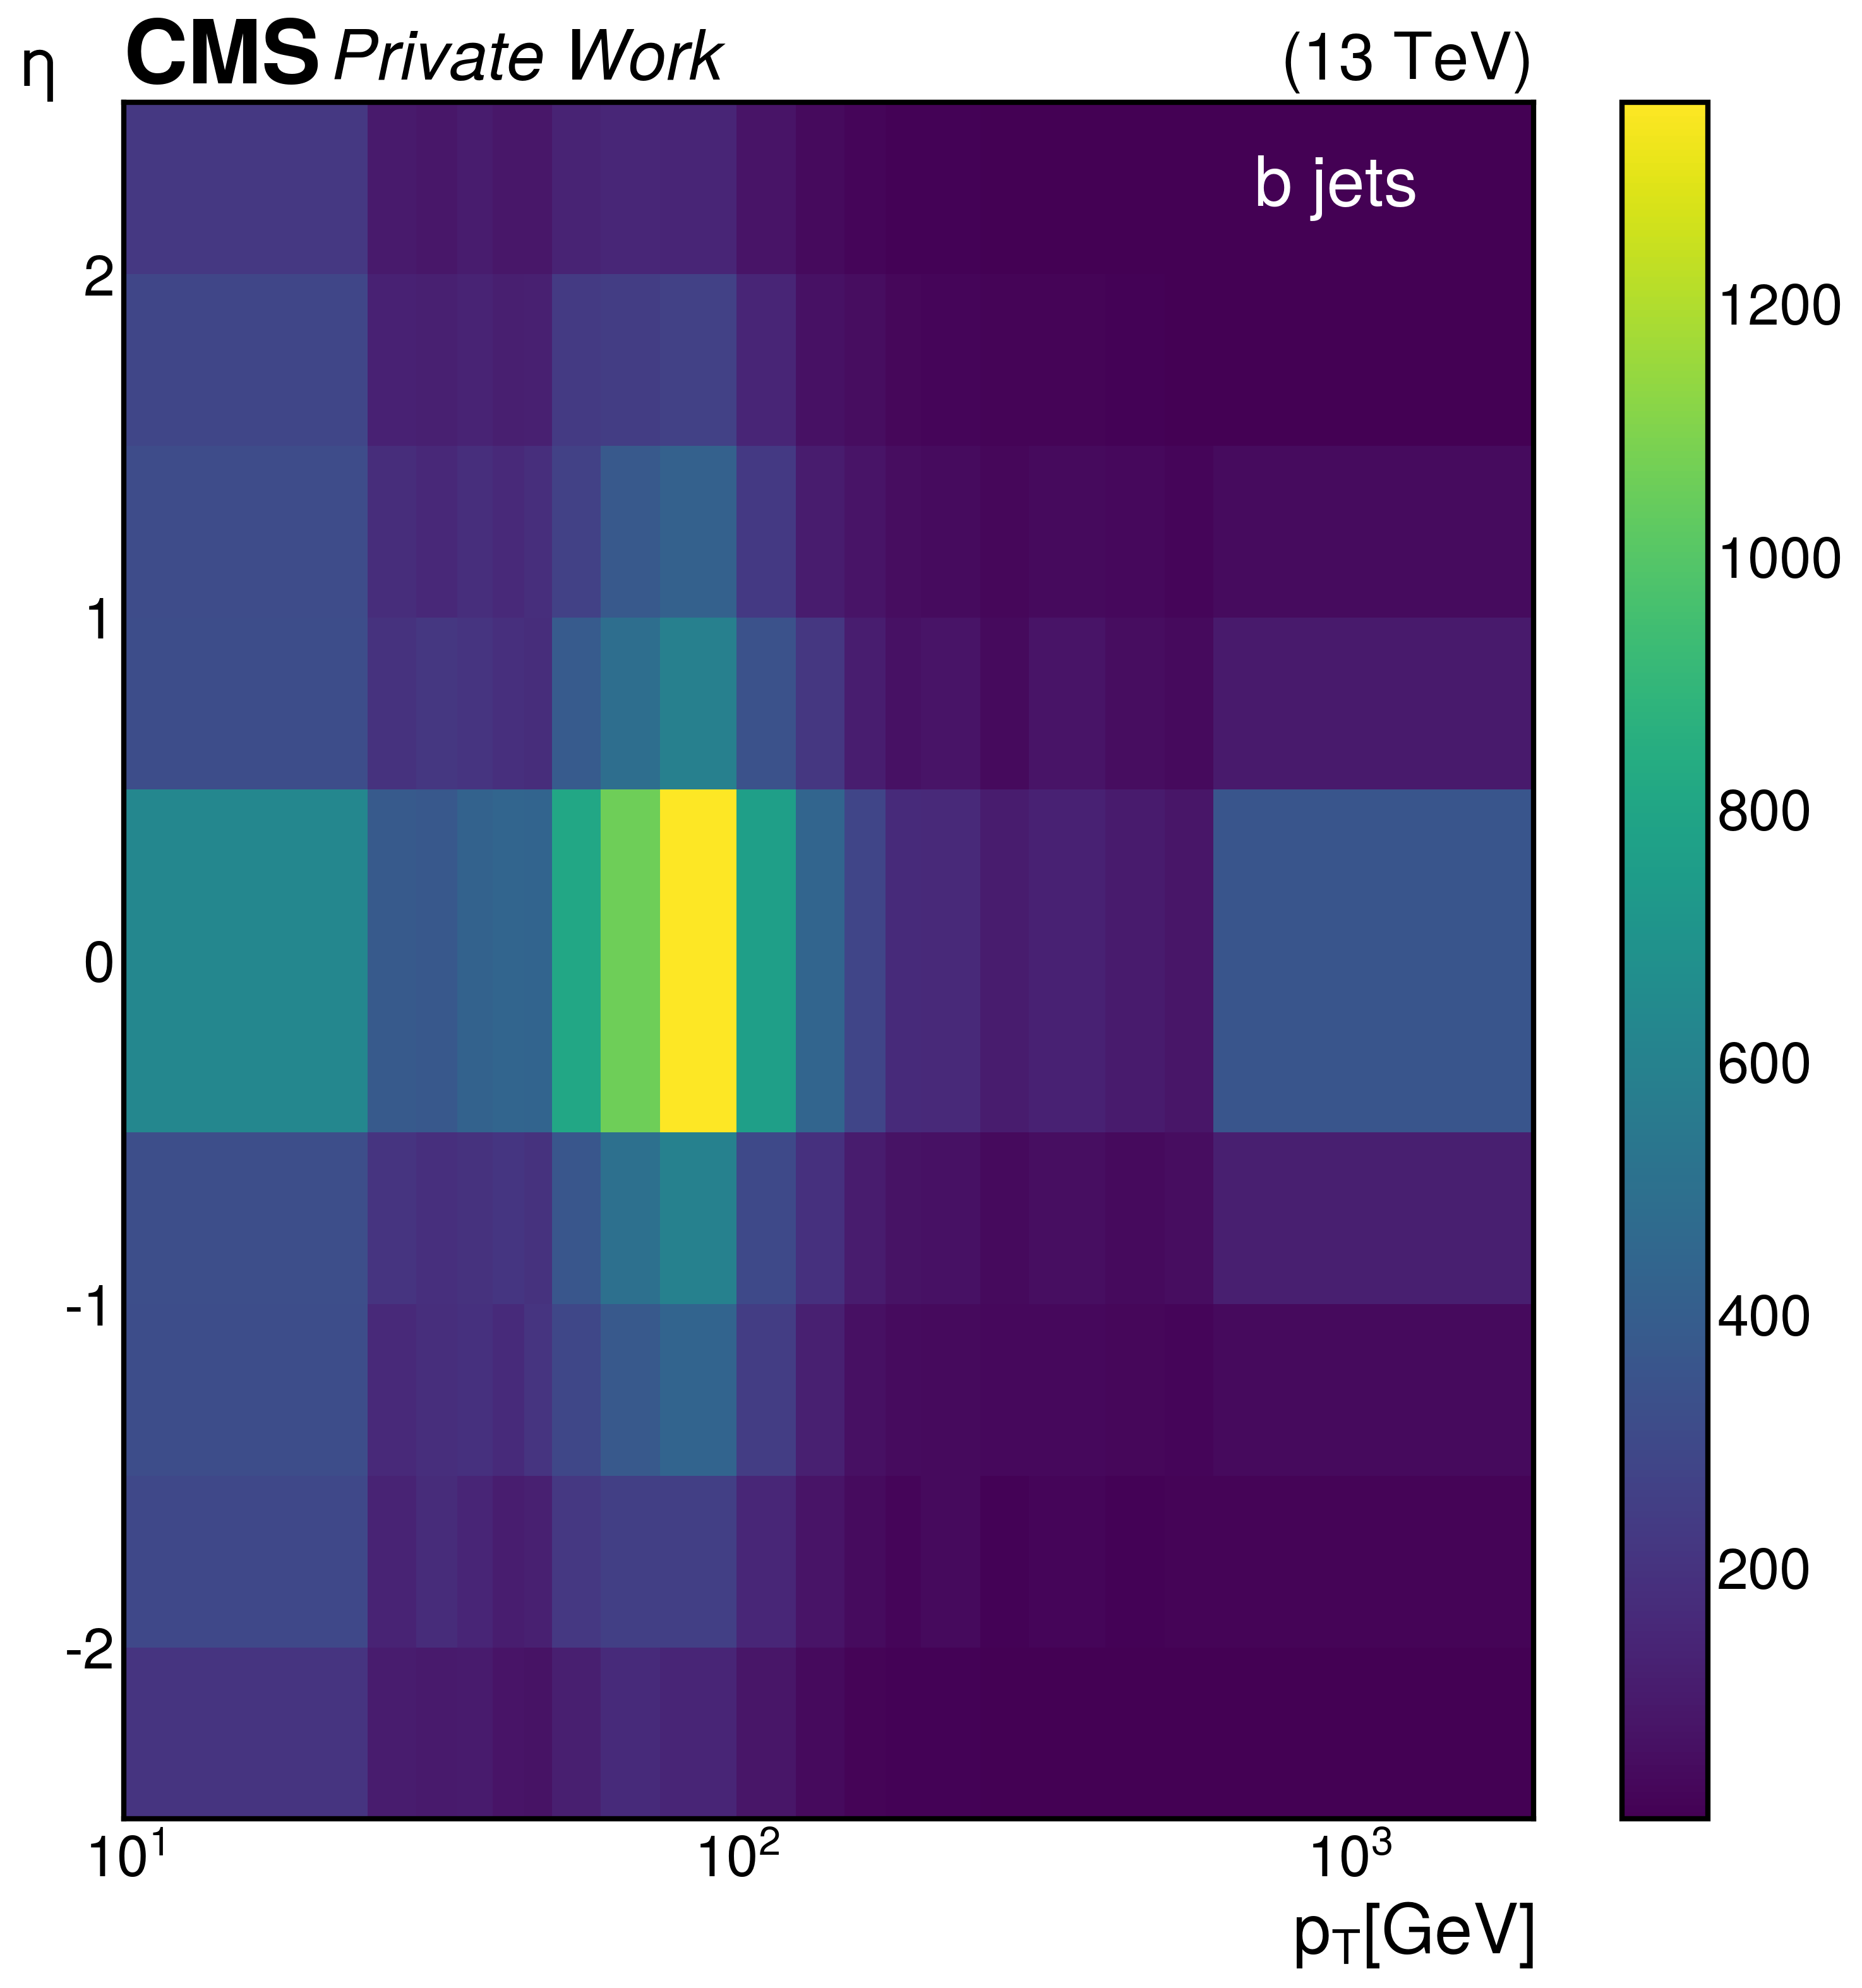

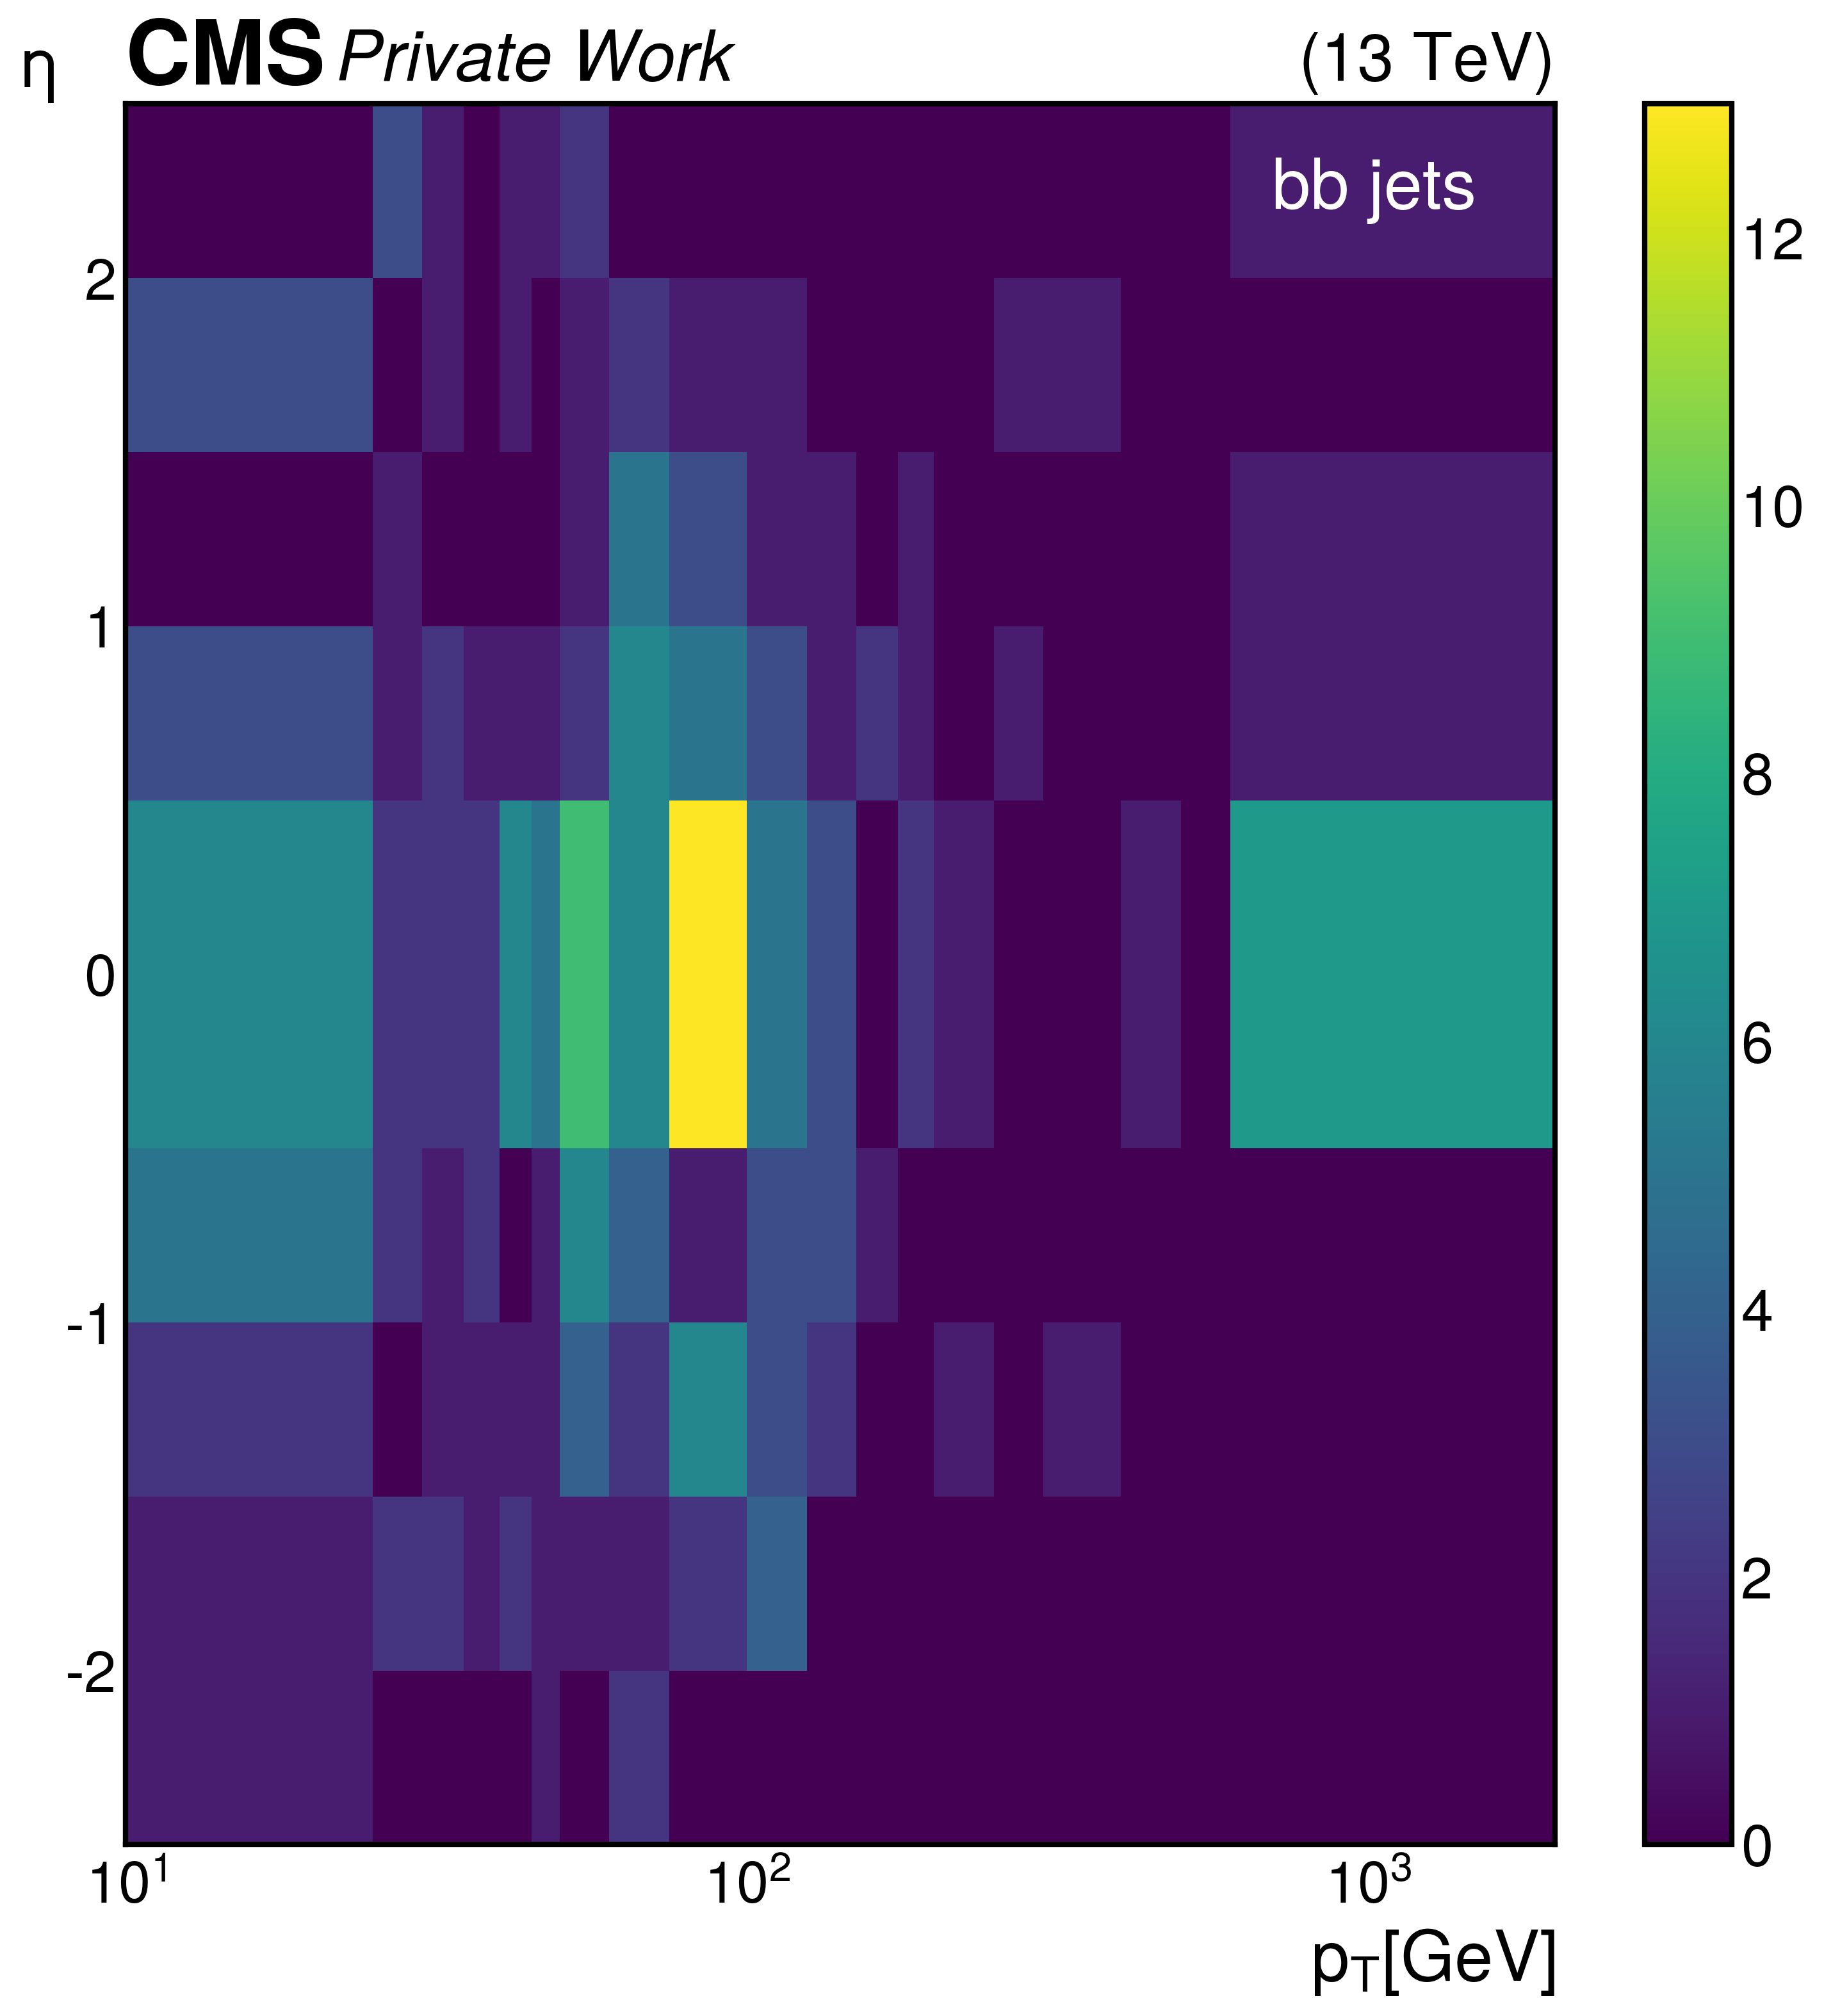

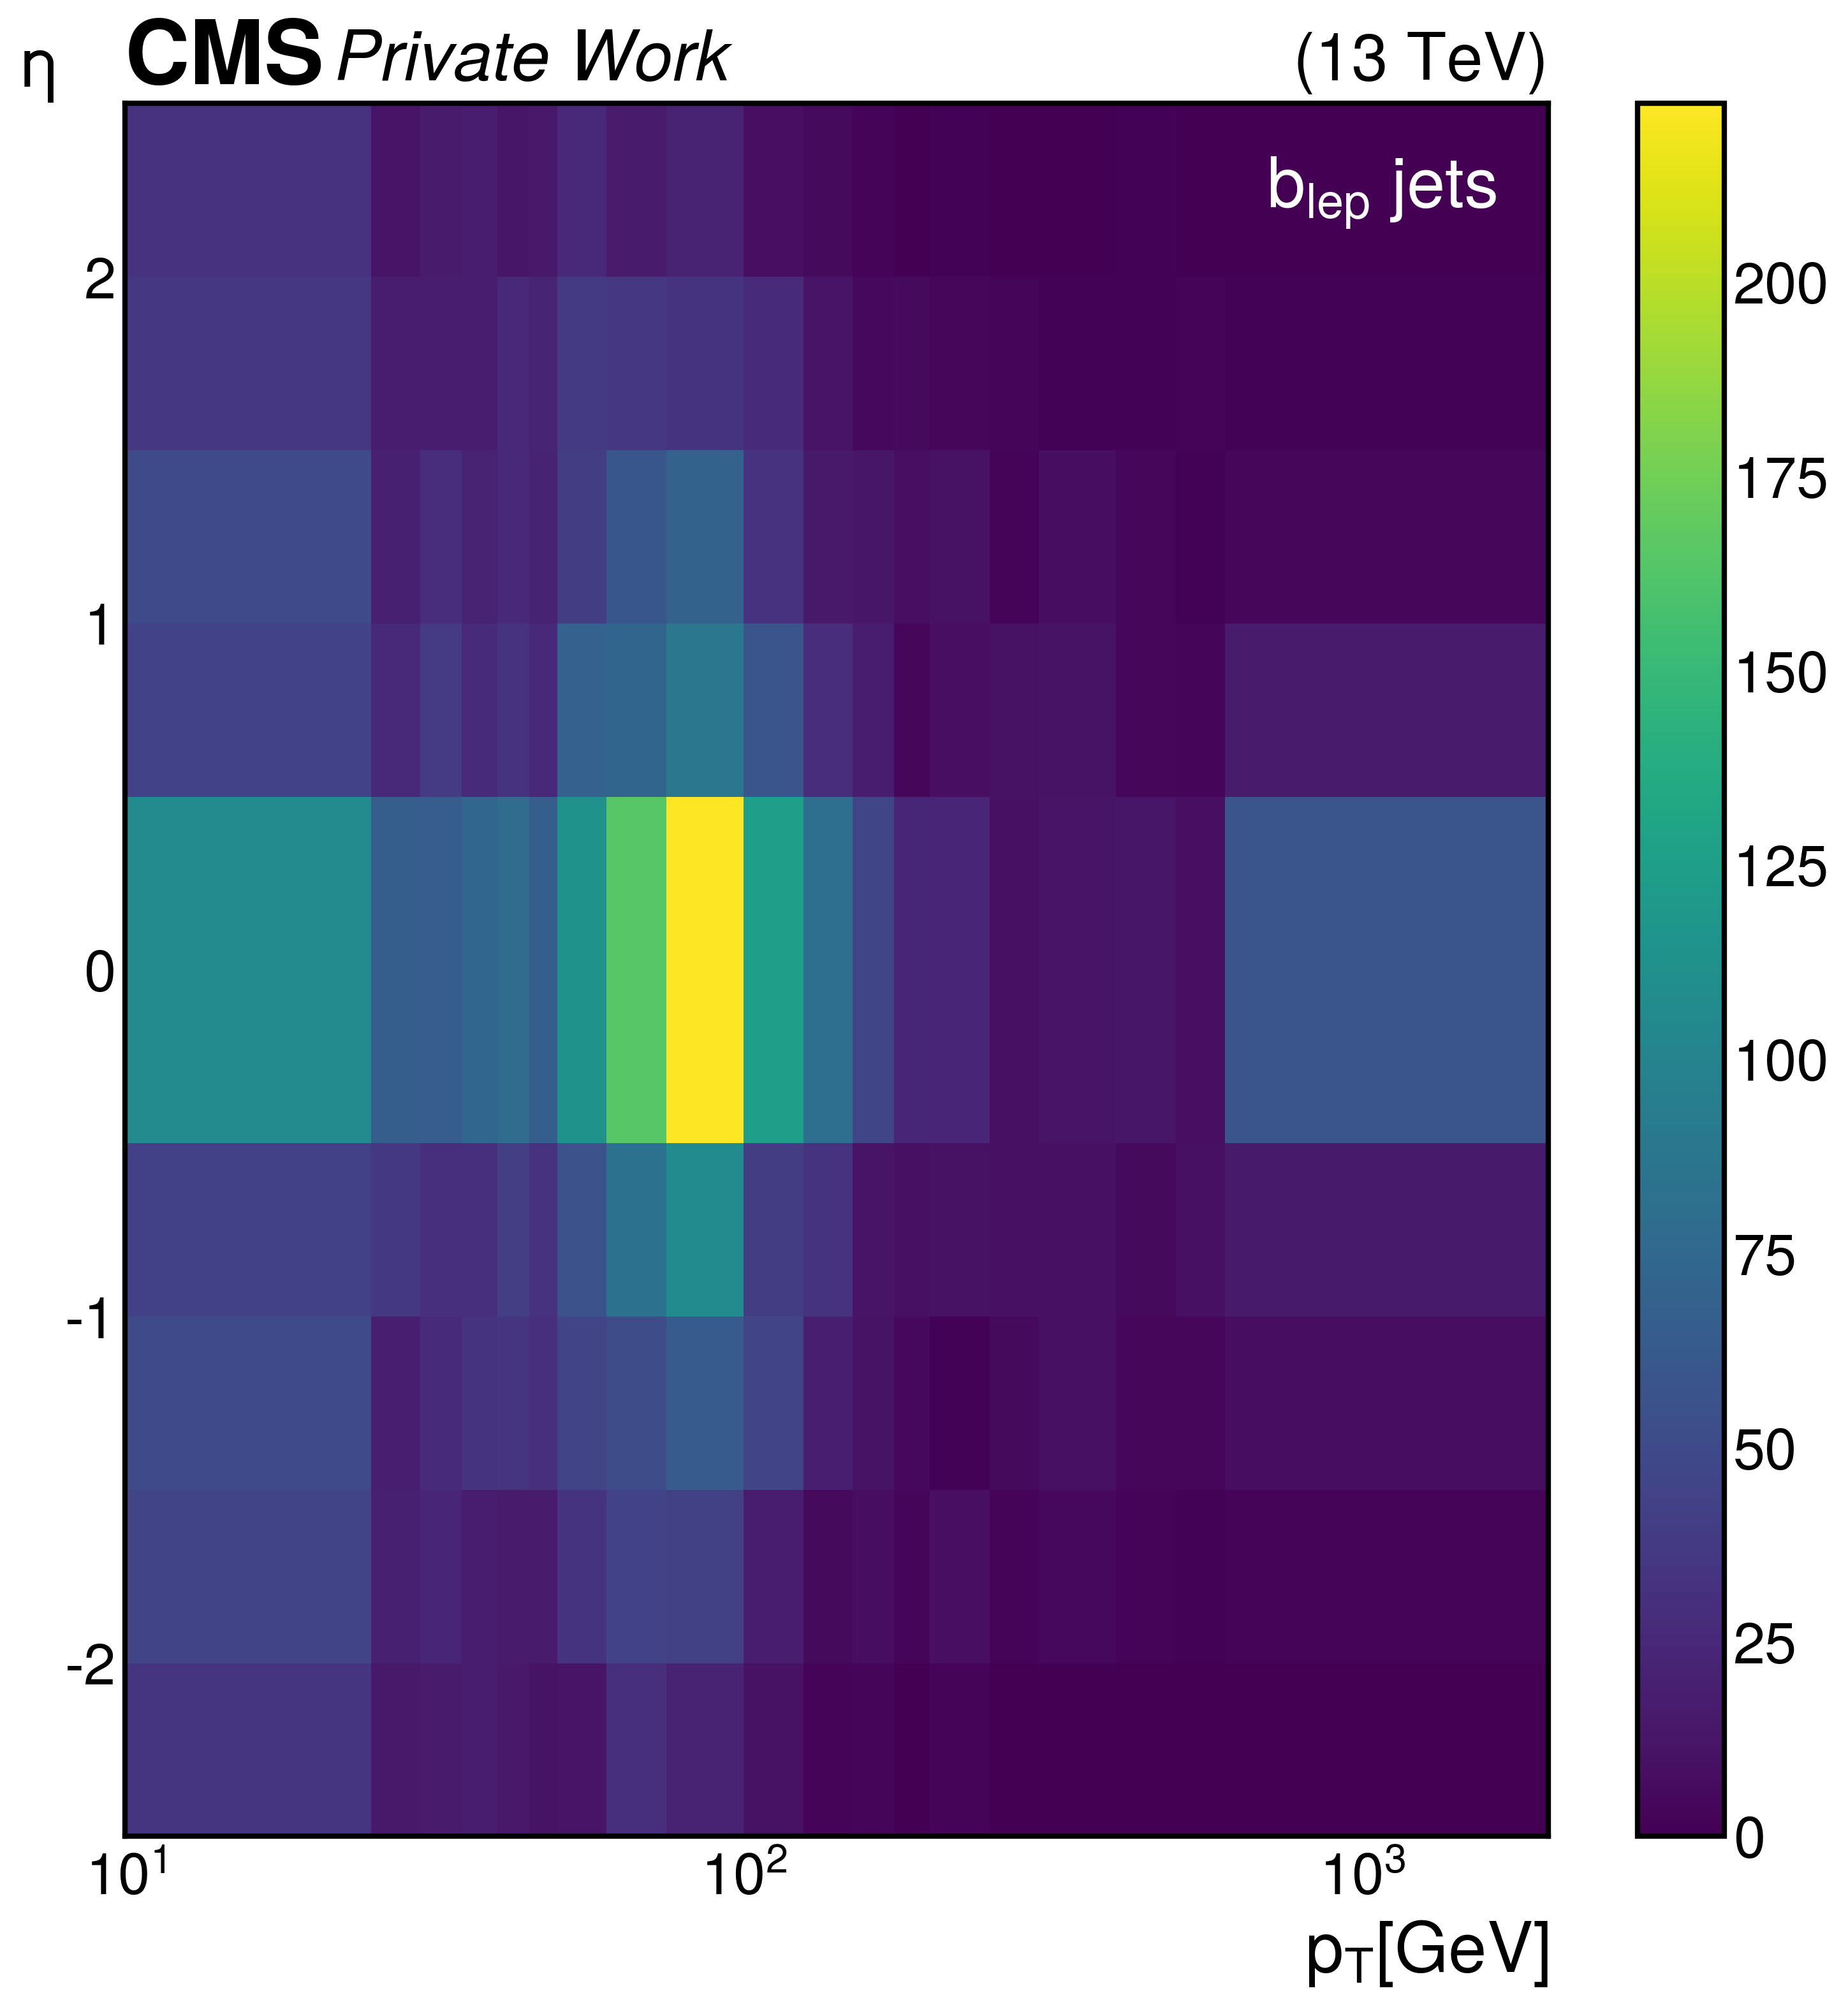

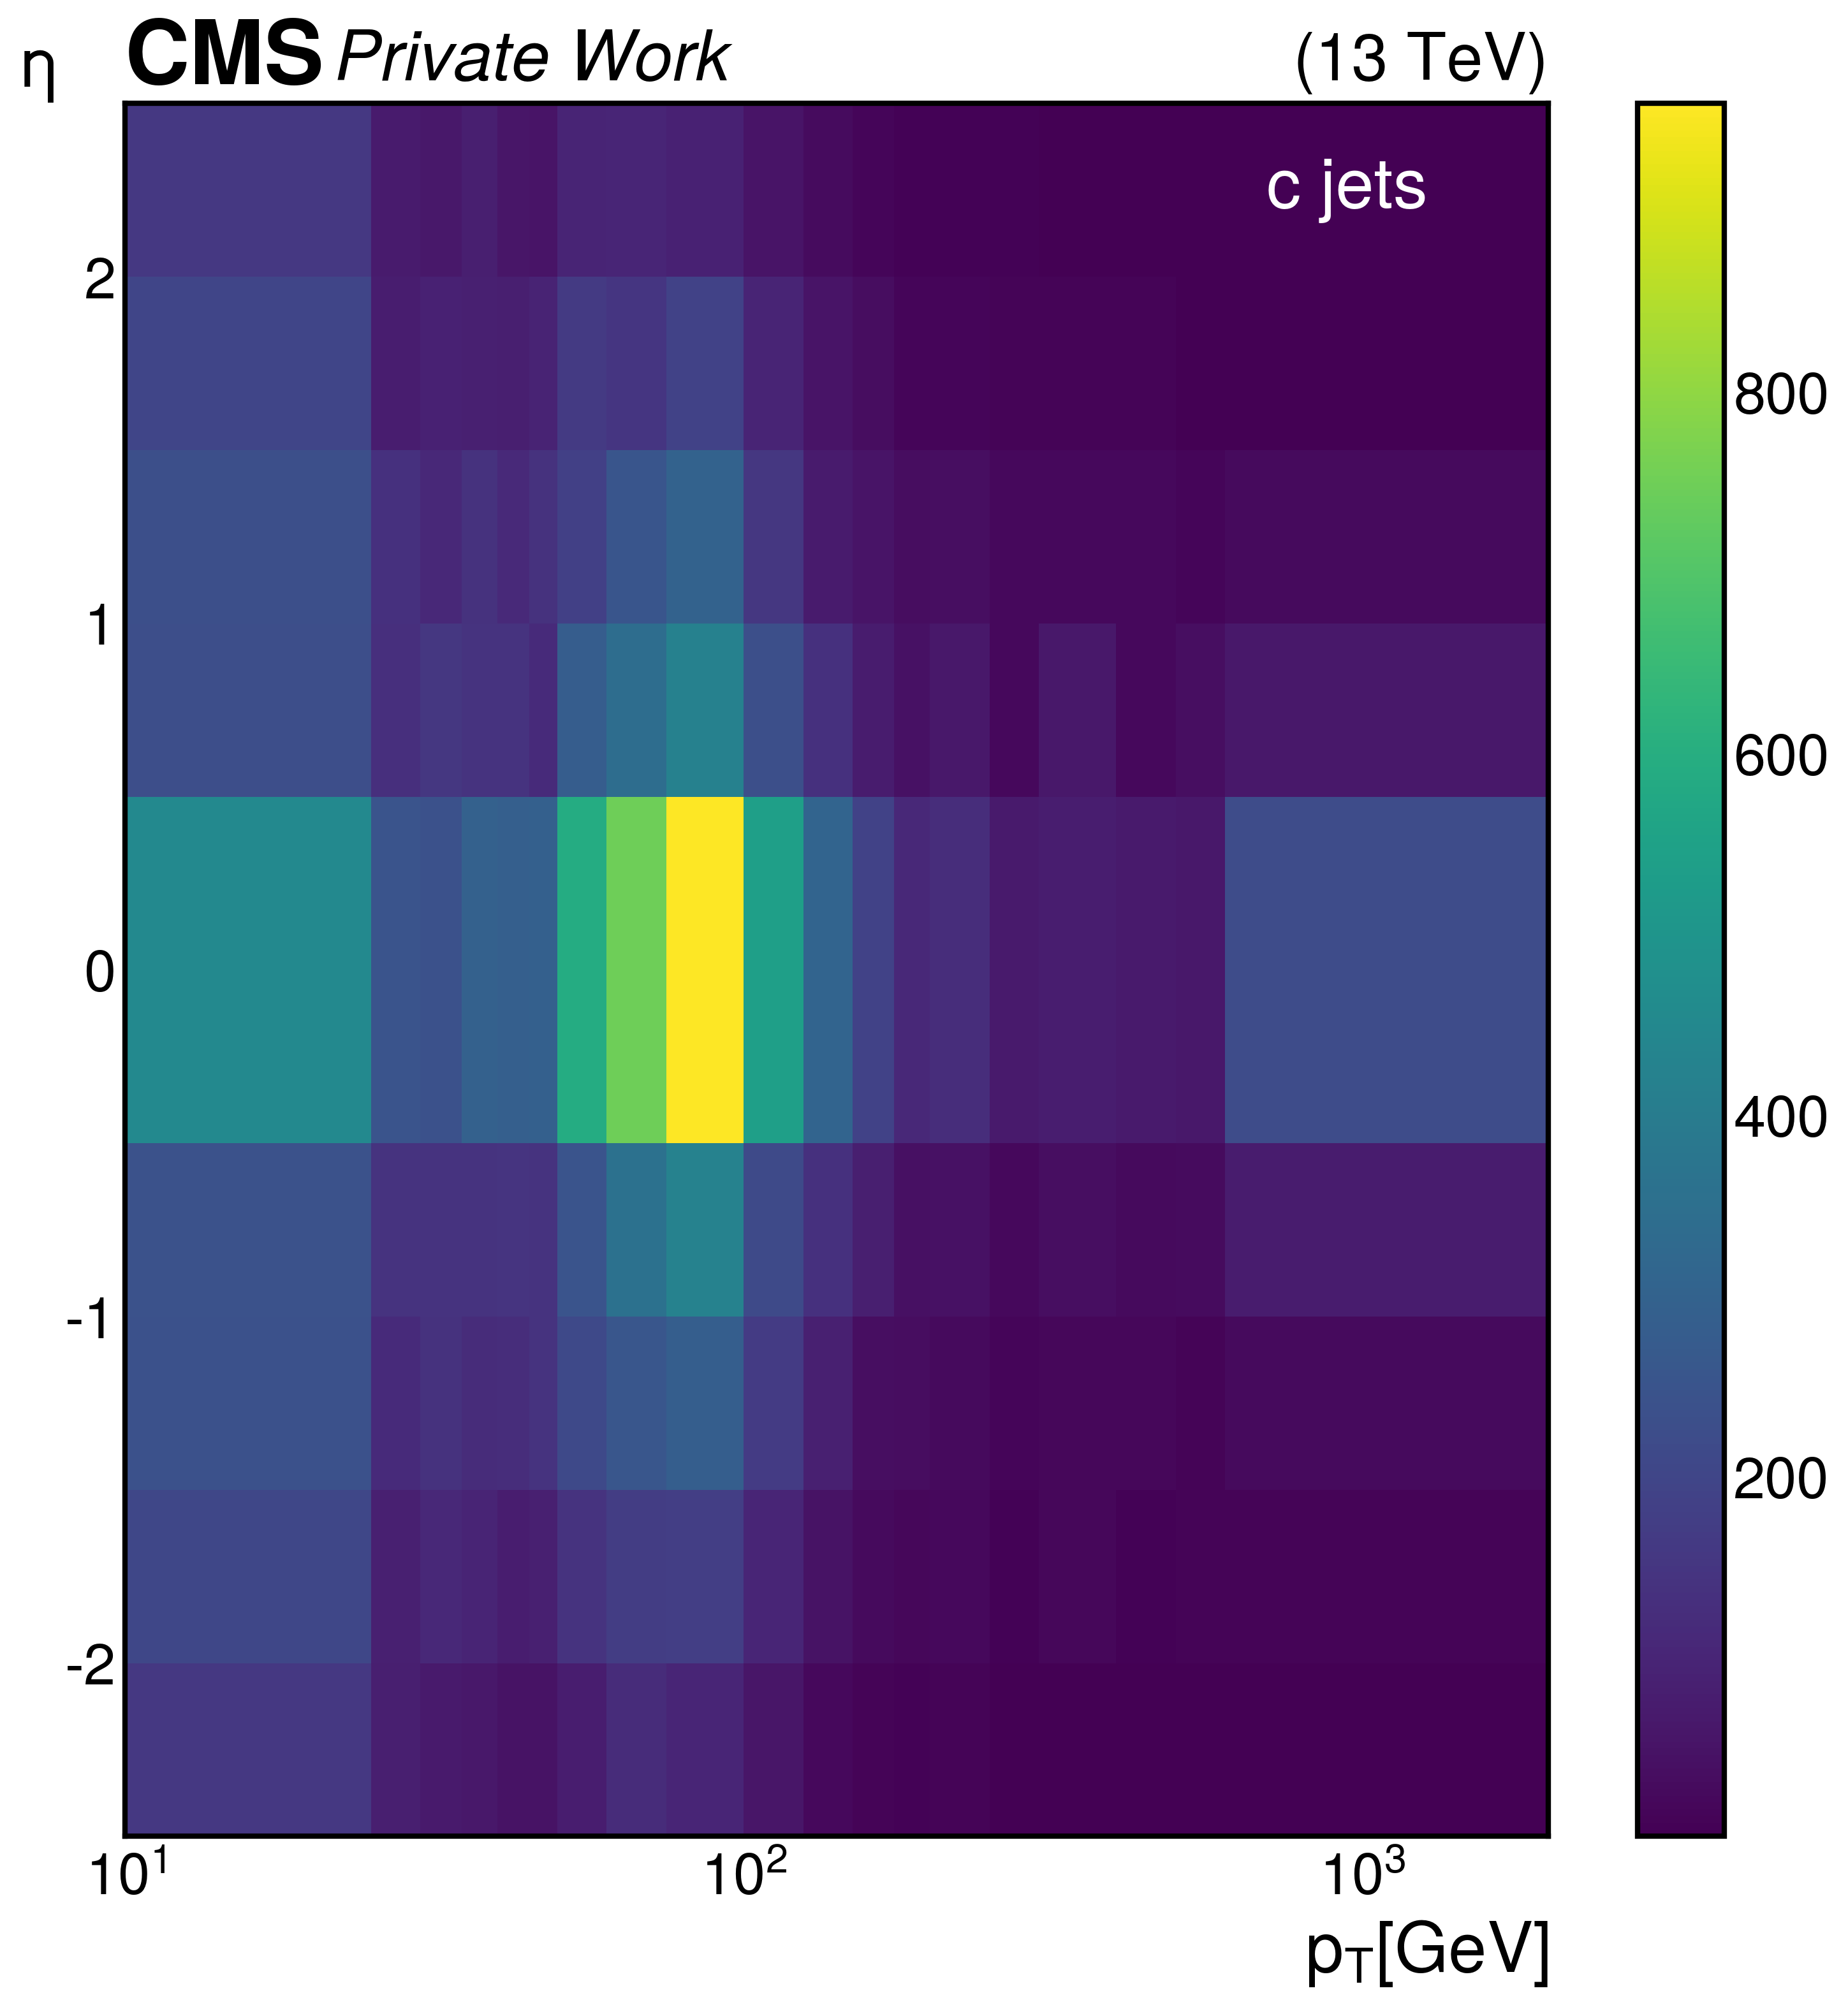

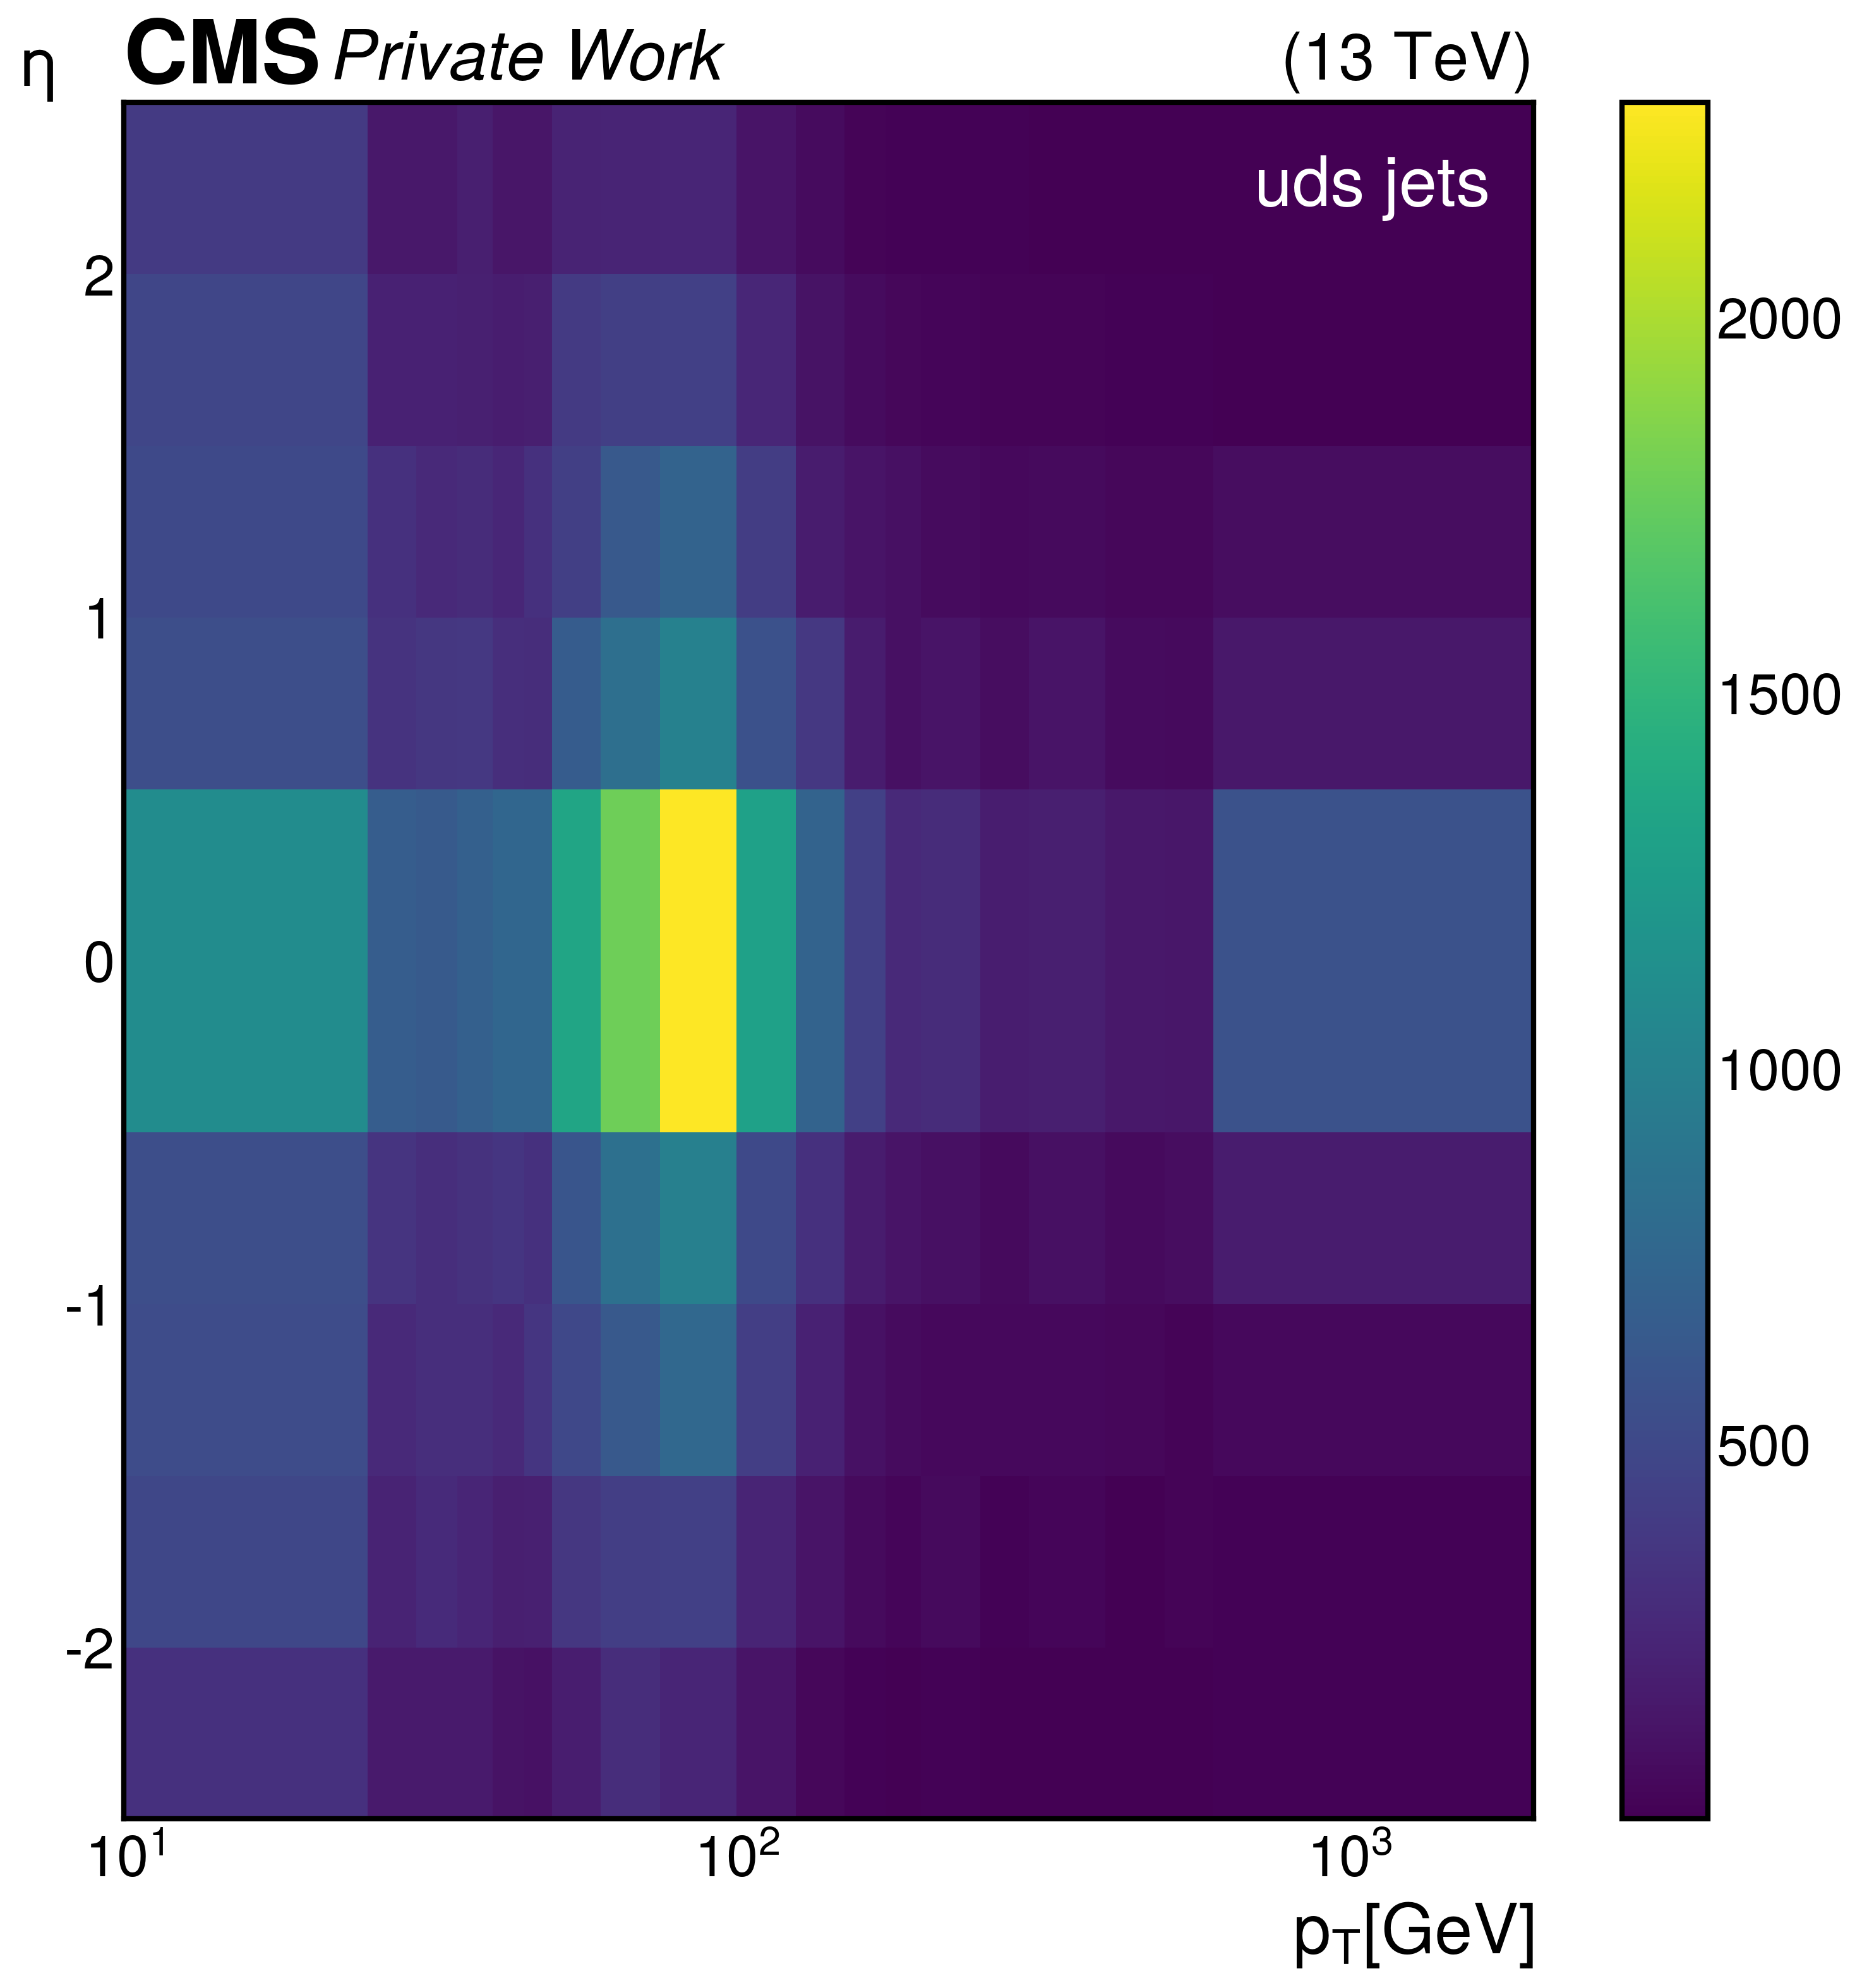

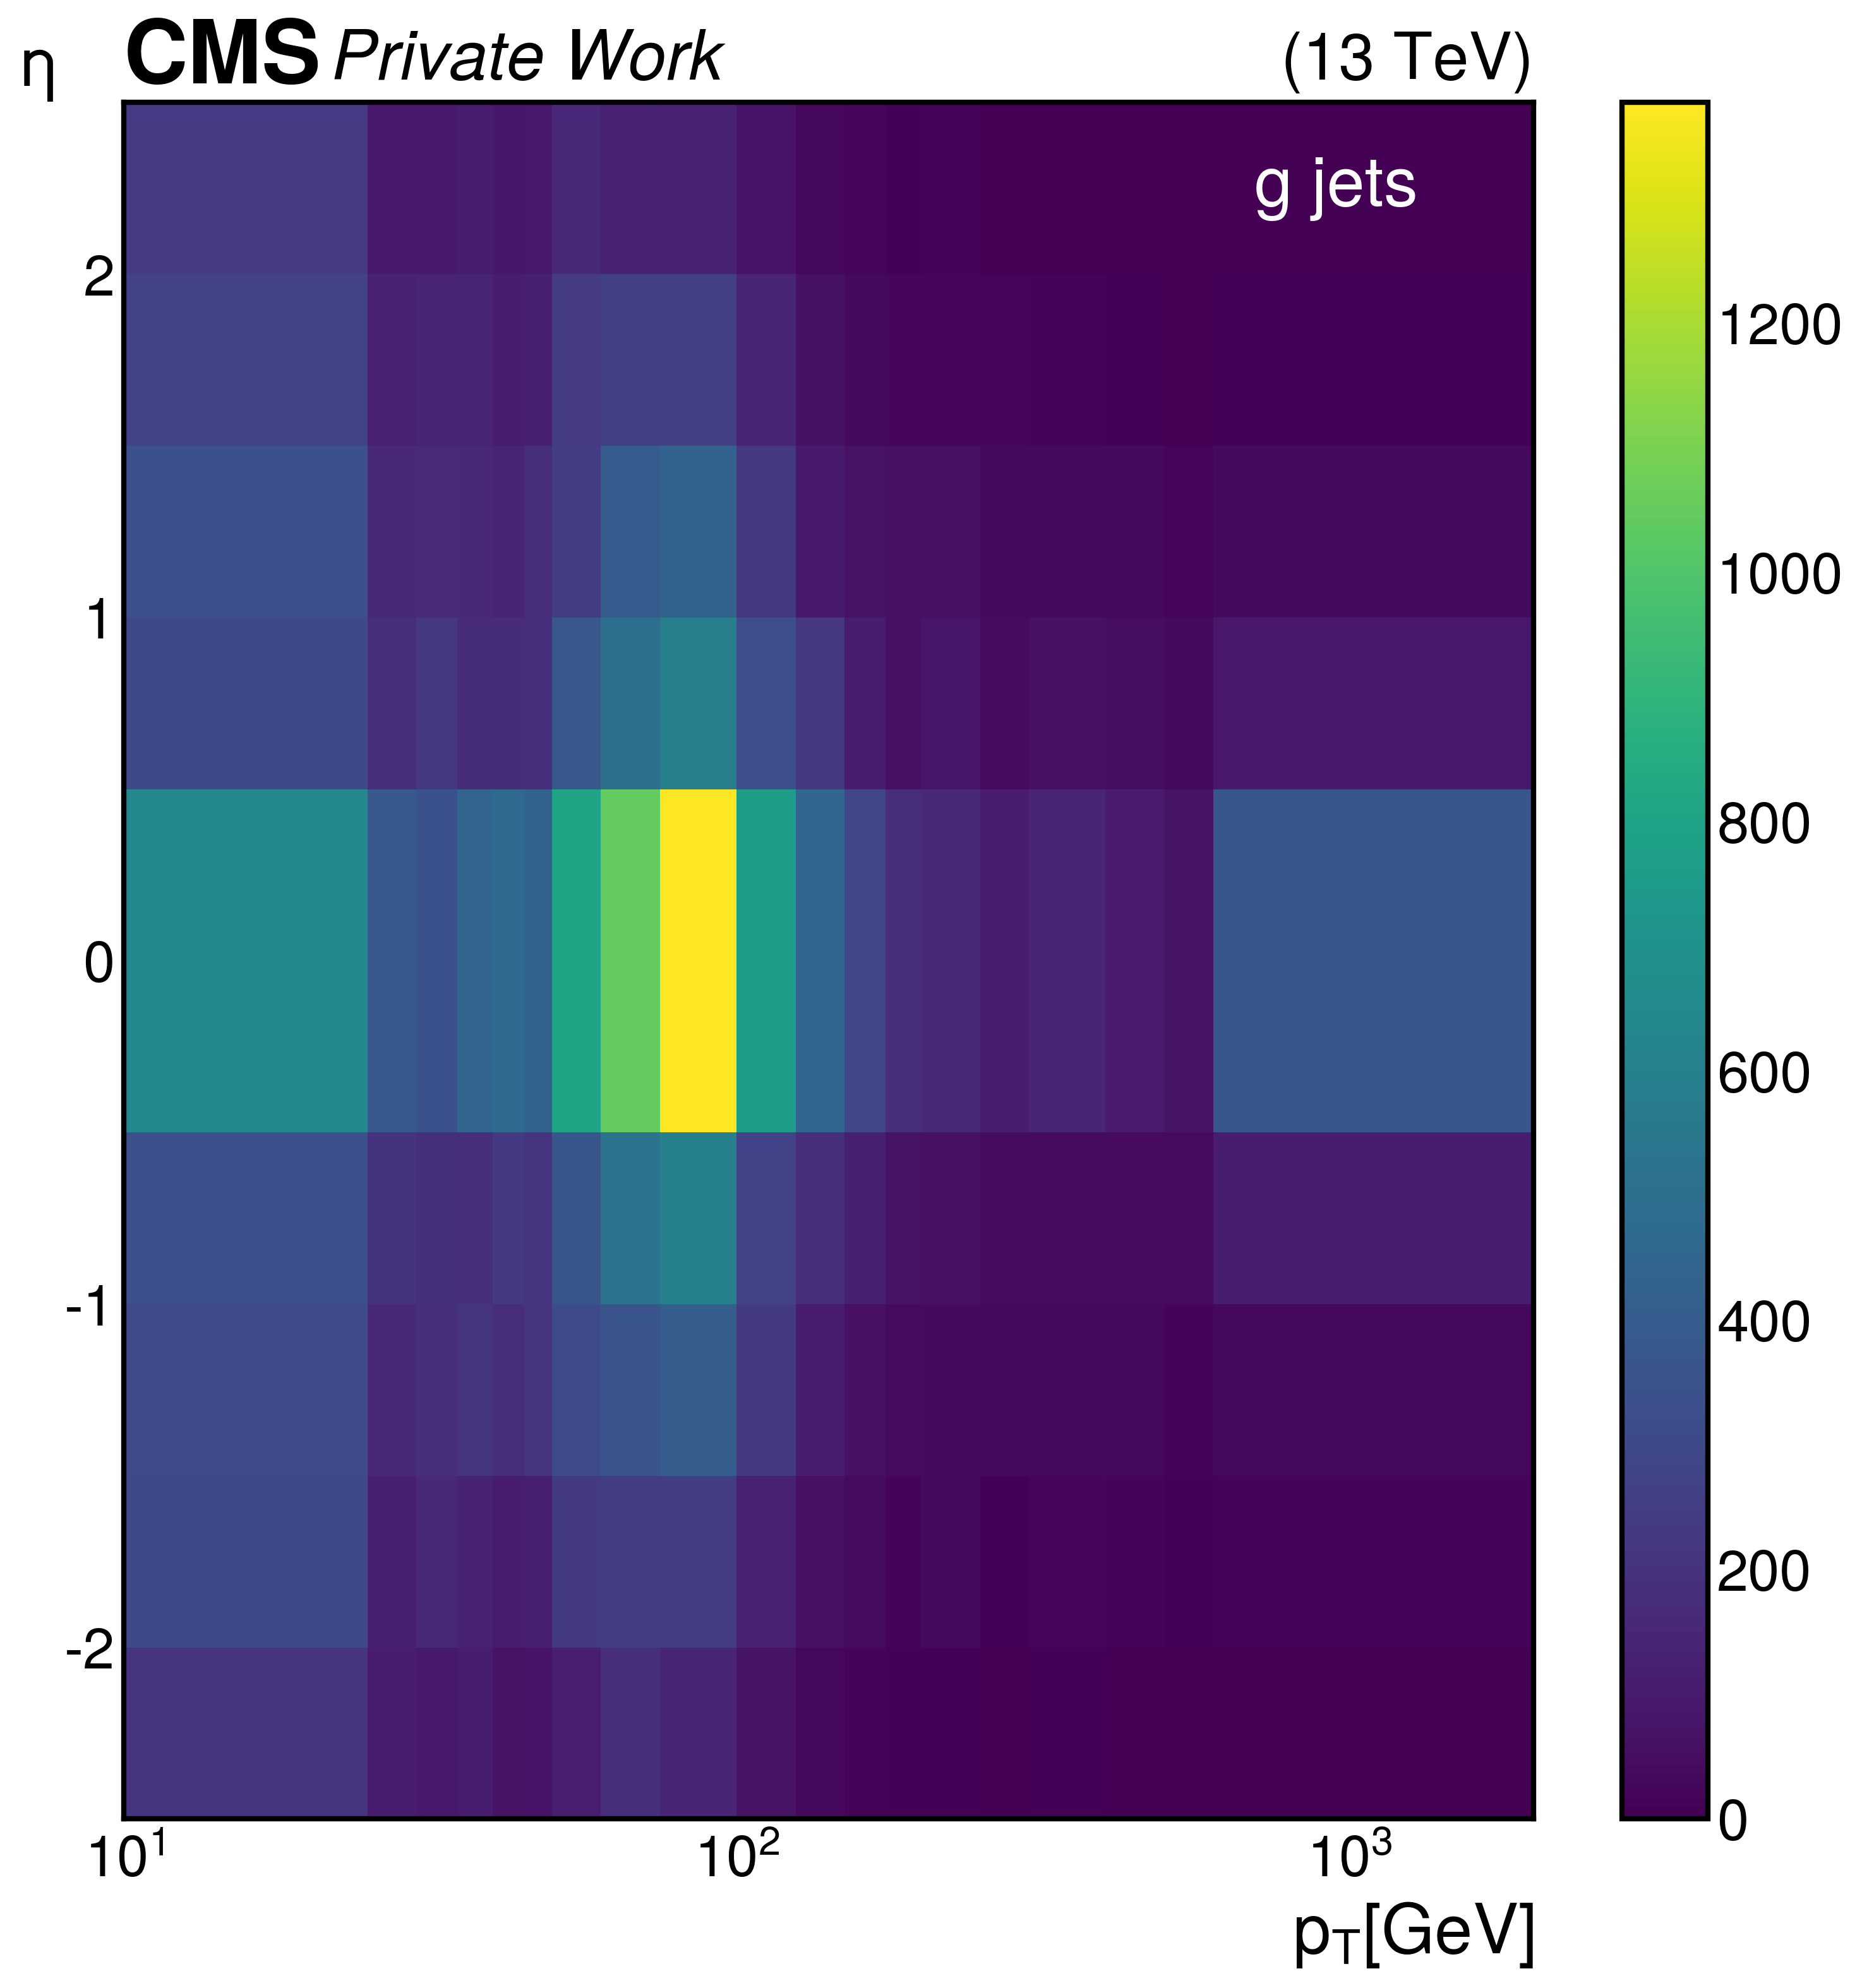

In [18]:
# print 2D histogram (pt,eta) for all 6 categories (weighting bins)
flavours = [isB,isBB,isLeptonicB,isC,isUDS,isG]
flavour_names = ['isB','isBB','isLeptonicB','isC','isUDS','isG']
flavour_labels = {
    'isB':'b',
    'isBB':'bb',
    'isLeptonicB':'$b_{lep}$',
    'isC':'c',
    'isUDS':'uds',
    'isG':'g',
}
quantity_binnings = {
    'jet_pt': [10,25,30,35,40,45,50,60,75,100,125,150,175,200,250,300,400,500,600,2000], 
    'jet_eta': [-2.5,-2.,-1.5,-1.,-0.5,0.5,1,1.5,2.,2.5],
}


for i,flavour in enumerate(flavours):
    x = 'jet_pt'
    y = 'jet_eta'
    x_array = get_array(x)
    y_array = get_array(y)
    x_binning = quantity_binnings[x]
    y_binning = quantity_binnings[y]
    x_label = quantity_labels[x]
    y_label = quantity_labels[y]
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    plt.style.use(hep.cms.style.ROOT)
    ax.set_xlim(left=x_binning[0], right=x_binning[-1])
    ax.set_ylim(bottom=y_binning[0], top=y_binning[-1])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label,rotation='horizontal')
    ax.set_xscale('log')
    ax.text(700,2.2,flavour_labels[flavour_names[i]]+' jets',color='white')
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')
    # plot histograms
    h = ax.hist2d(x_array[flavour==1], y_array[flavour==1], bins=[x_binning, y_binning])
    fig.colorbar(h[3], ax=ax)
    #legloc = 'upper right'
    #leg=ax.legend(title='Total jets: {}'.format(len(isB)), fontsize=16, title_fontsize=20, labelspacing=0.7, loc=legloc, frameon=True, framealpha=1, facecolor='white')
    #if 'right' in legloc:
        #aligned = 'right'
    #else:
        #aligned = 'left'
    #leg._legend_box.align = aligned
    #leg.get_frame().set_linewidth(0.0)
    hep.cms.label(llabel='Private Work', rlabel='(13 TeV)')
    fig.savefig('{}/inputs/weights-{}.pdf'.format(saveDir,flavour_names[i]))

In [38]:
flavour_labels['isB']

'b'